In [1]:
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from biosppy.signals import ppg as bppg

## Merge Data From Sources

1. Ler Utilizadores

In [2]:
with open('bidmc-ppg-and-respiration-dataset-1.0.0\RECORDS', 'r') as file:
    records = file.readlines()
    records = [record.strip() for record in records]

print(records)

['bidmc01', 'bidmc02', 'bidmc03', 'bidmc04', 'bidmc05', 'bidmc06', 'bidmc07', 'bidmc08', 'bidmc09', 'bidmc10', 'bidmc11', 'bidmc12', 'bidmc13', 'bidmc14', 'bidmc15', 'bidmc16', 'bidmc17', 'bidmc18', 'bidmc19', 'bidmc20', 'bidmc21', 'bidmc22', 'bidmc23', 'bidmc24', 'bidmc25', 'bidmc26', 'bidmc27', 'bidmc28', 'bidmc29', 'bidmc30', 'bidmc31', 'bidmc32', 'bidmc33', 'bidmc34', 'bidmc35', 'bidmc36', 'bidmc37', 'bidmc38', 'bidmc39', 'bidmc40', 'bidmc41', 'bidmc42', 'bidmc43', 'bidmc44', 'bidmc45', 'bidmc46', 'bidmc47', 'bidmc48', 'bidmc49', 'bidmc50', 'bidmc51', 'bidmc52', 'bidmc53']


2. Leitura e junção dos dados 

In [3]:
data = []

for record in records:
    record_name = f"bidmc-ppg-and-respiration-dataset-1.0.0/{record}"
    print("Record name:", record_name)
    try:
        record, fields = wfdb.rdsamp(record_name)

        if ('PLETH,' in fields['sig_name']):
            ppg = record[:,fields['sig_name'].index('PLETH,')]
            fs = fields['fs']
            data.append({'subject': record_name[-2:], 
                             'signal': ppg,
                             'fs': fs})
            print("-> Adicionado sinal do individuo", record_name)
    except Exception as e:
        print("Erro ao adicionar sinal do individuo", record_name, e)
    

Record name: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01
-> Adicionado sinal do individuo bidmc-ppg-and-respiration-dataset-1.0.0/bidmc01
Record name: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc02
-> Adicionado sinal do individuo bidmc-ppg-and-respiration-dataset-1.0.0/bidmc02
Record name: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc03
-> Adicionado sinal do individuo bidmc-ppg-and-respiration-dataset-1.0.0/bidmc03
Record name: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc04
-> Adicionado sinal do individuo bidmc-ppg-and-respiration-dataset-1.0.0/bidmc04
Record name: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc05
-> Adicionado sinal do individuo bidmc-ppg-and-respiration-dataset-1.0.0/bidmc05
Record name: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc06
-> Adicionado sinal do individuo bidmc-ppg-and-respiration-dataset-1.0.0/bidmc06
Record name: bidmc-ppg-and-respiration-dataset-1.0.0/bidmc07
-> Adicionado sinal do individuo bidmc-ppg-and-respiration-dataset-1.0.0/bidmc07
Record

Número de utilizadores: 51
Utilizador 1: 
{'subject': '01', 'signal': array([0.43597077, 0.43206423, 0.42815044, ..., 0.40175954, 0.40175954,
       0.40273618]), 'fs': 125}
Sinal completo do utilizador 1:


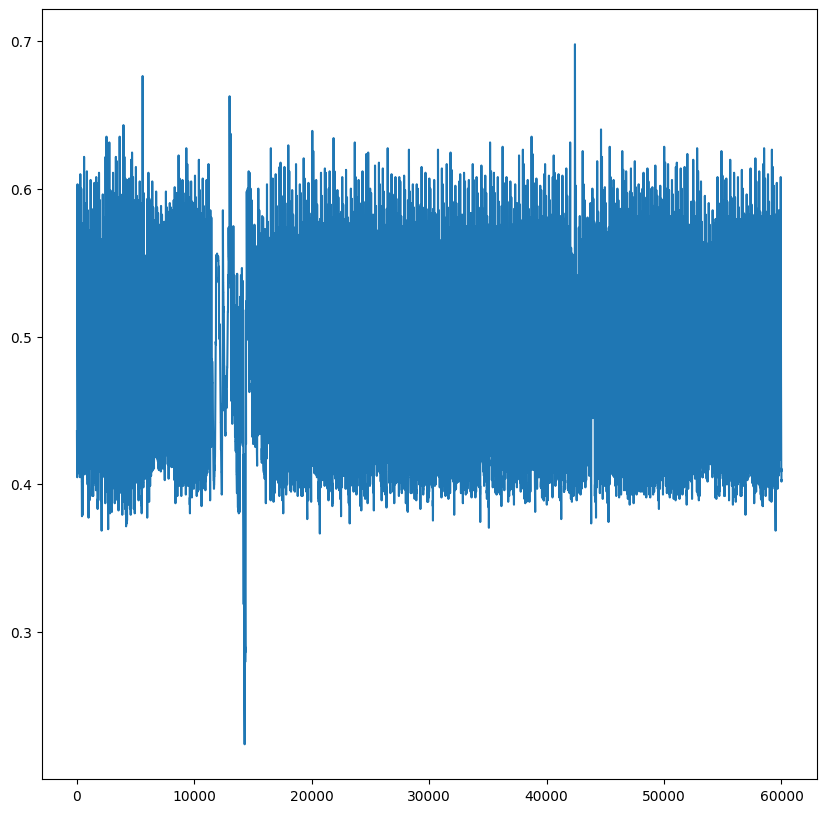

Primeiros 3 segundos do sinal utilizador 1:


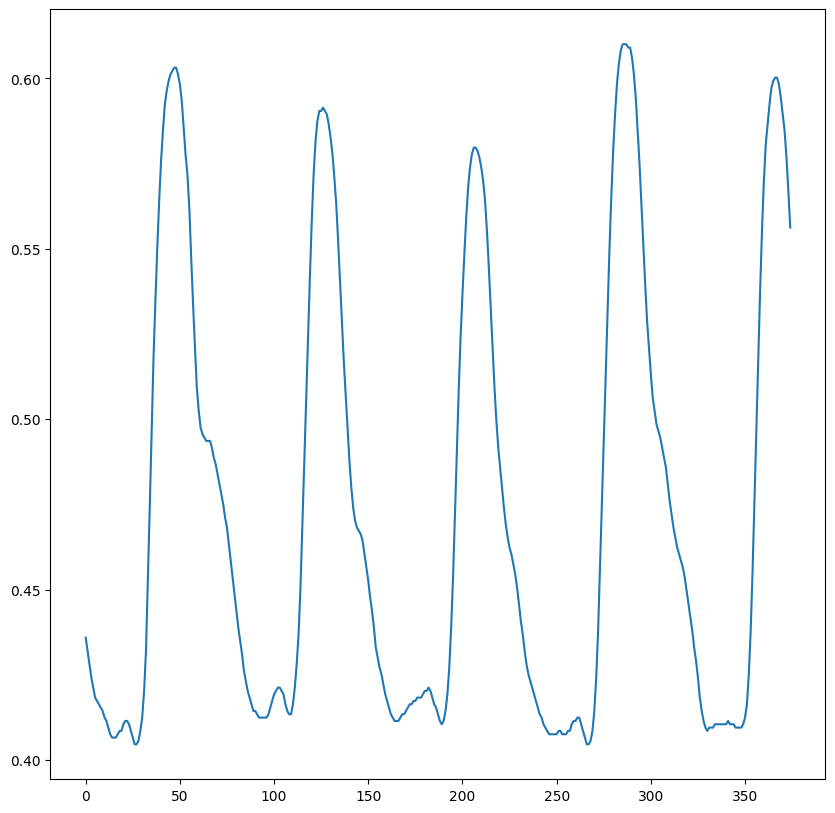

In [4]:
print("Número de utilizadores:", len(data))
print("Utilizador 1: ")
print(data[0])

print("Sinal completo do utilizador 1:")
plt.figure(figsize=(10,10))
plt.plot(data[0]['signal'])
plt.show()

amostras = 3
print(f"Primeiros {amostras} segundos do sinal utilizador 1:")
plt.figure(figsize=(10,10))
plt.plot(data[0]['signal'][0: amostras*data[0]['fs']])
plt.show()

In [5]:
print(data[0]['fs'])
print((len(data[0]['signal'])/data[0]['fs'])*60)

amostras = len(data[0]['signal'])
fs = data[0]['fs']

amostras_per_second = amostras/fs
amostras_per_minute = amostras_per_second*60


print(amostras)
print(amostras_per_second)
print(amostras_per_minute)
print(amostras/amostras_per_minute)

125
28800.48
60001
480.008
28800.48
2.0833333333333335


## Filtragem 

In [6]:
for user in data: 
    signal = user['signal']
    fs = user['fs']

    out = bppg.ppg(signal=signal, sampling_rate=fs, show=False)

    user.update({'f_signal': out['filtered'], 
                 'peaks': out['peaks'], 
                 'templates': out['templates'], 
                 'templates_ts': out['templates_ts'], 
                 'heart_rate': out['heart_rate'], 
                 'heart_rate_ts': out['heart_rate_ts']
                 })

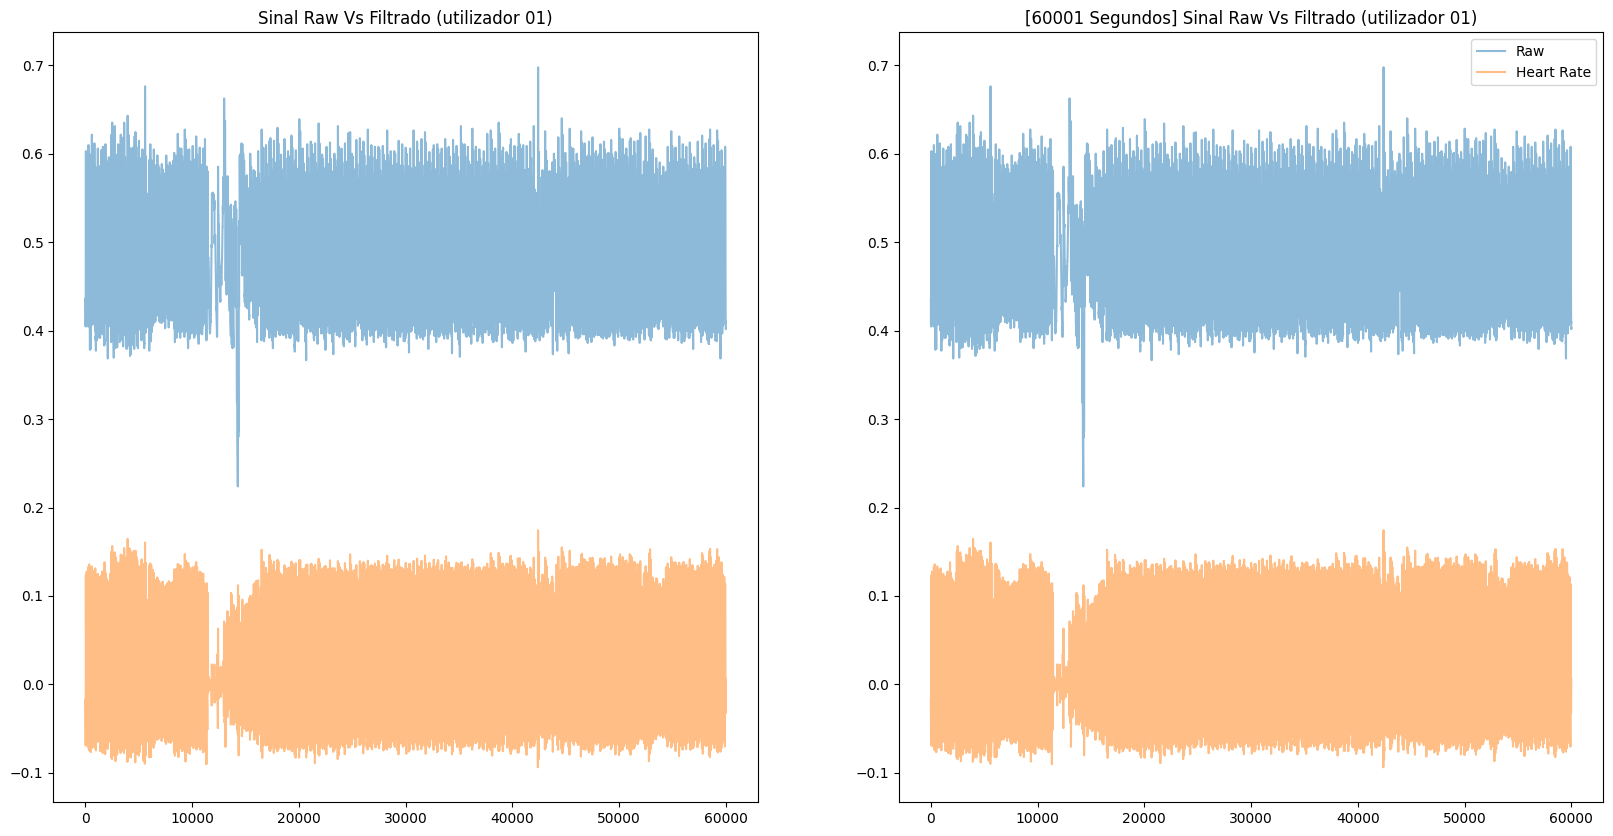

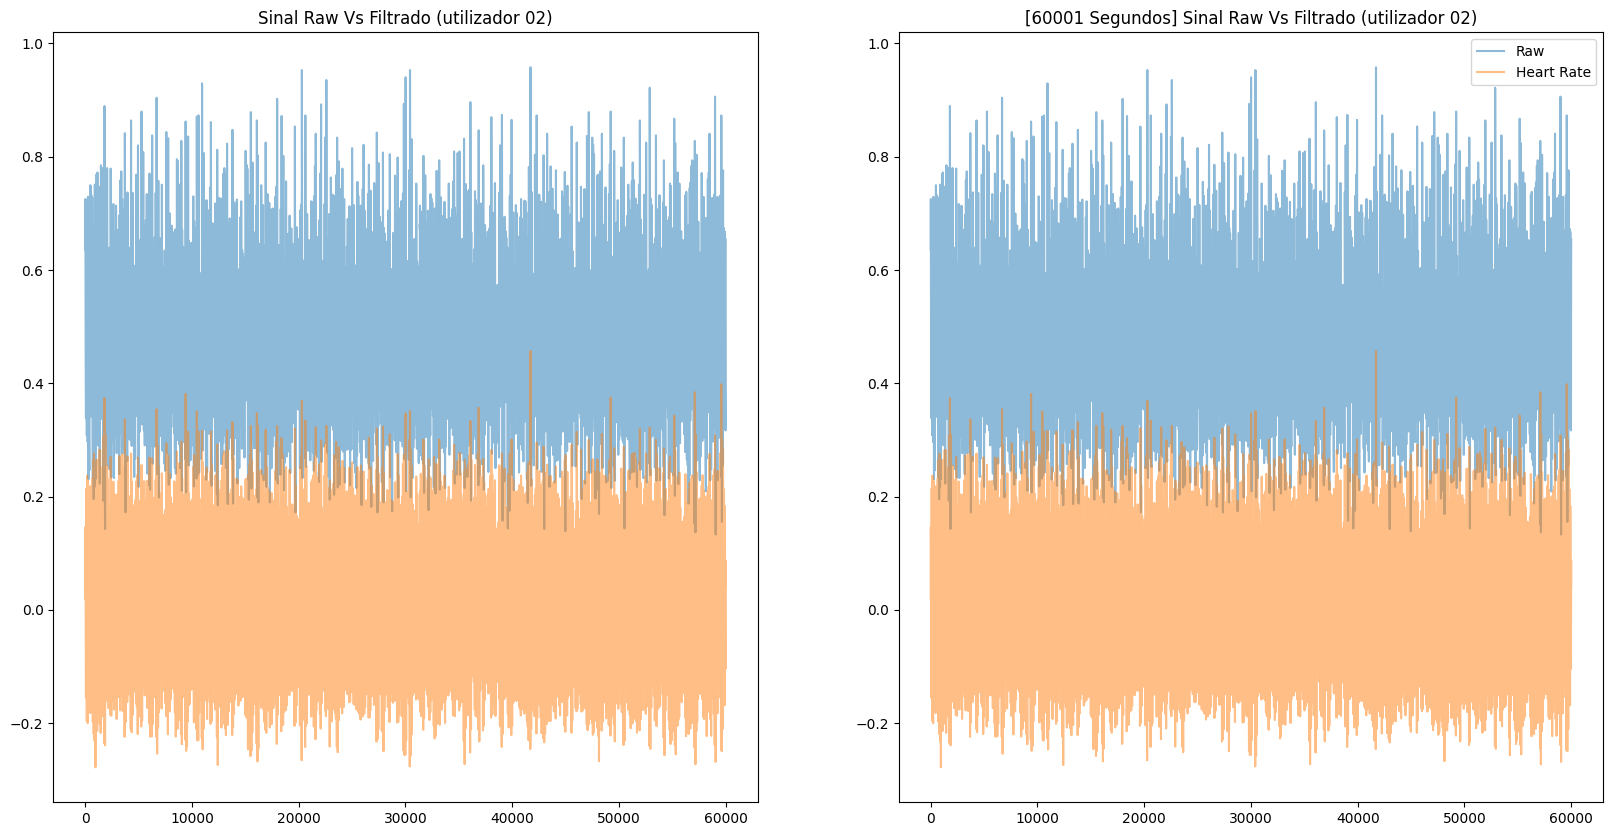

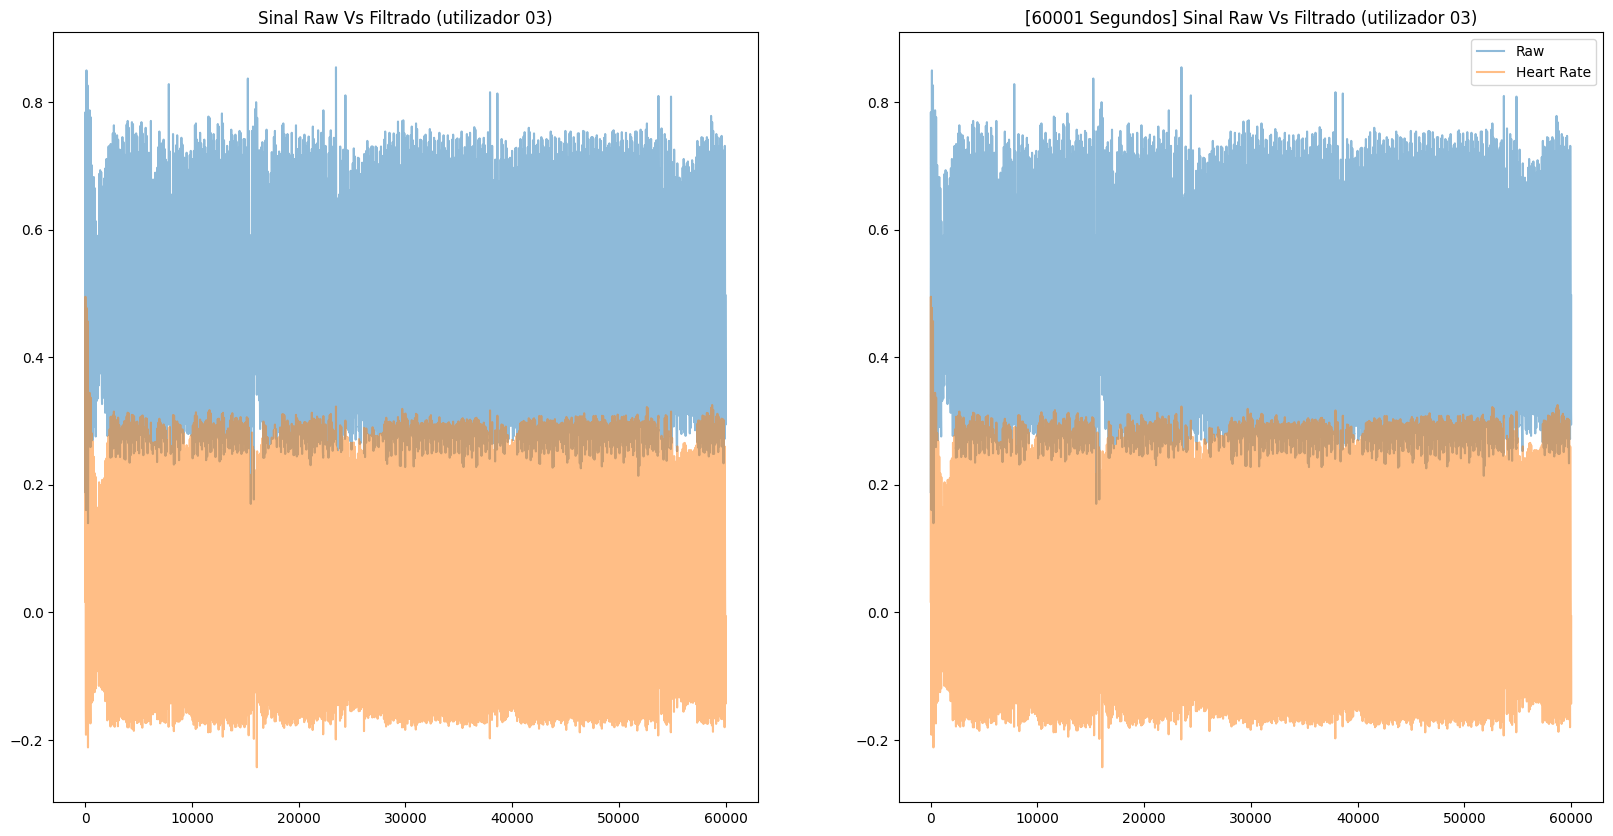

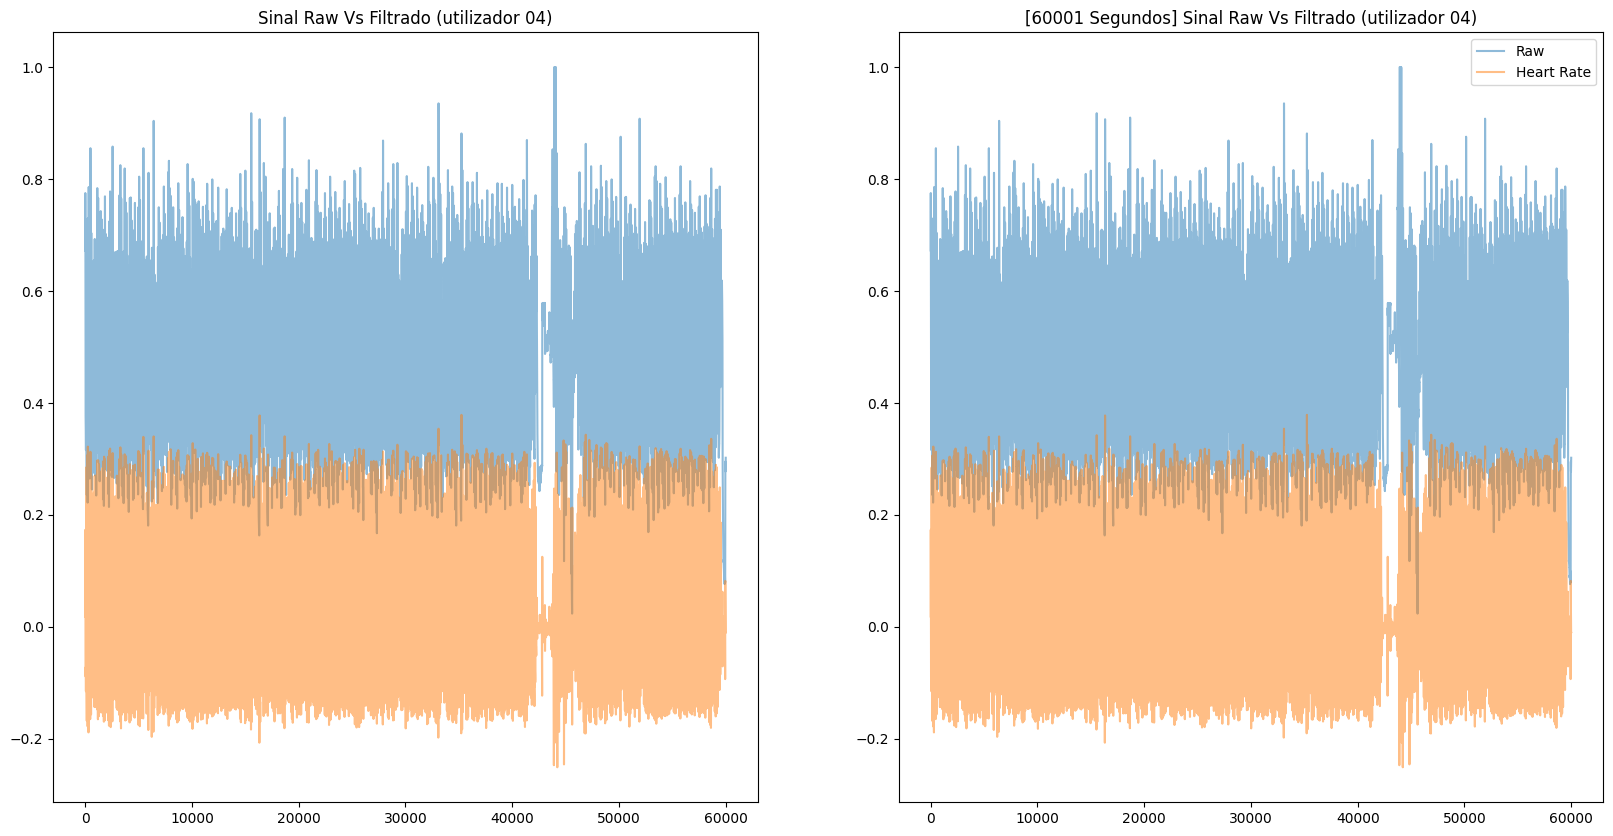

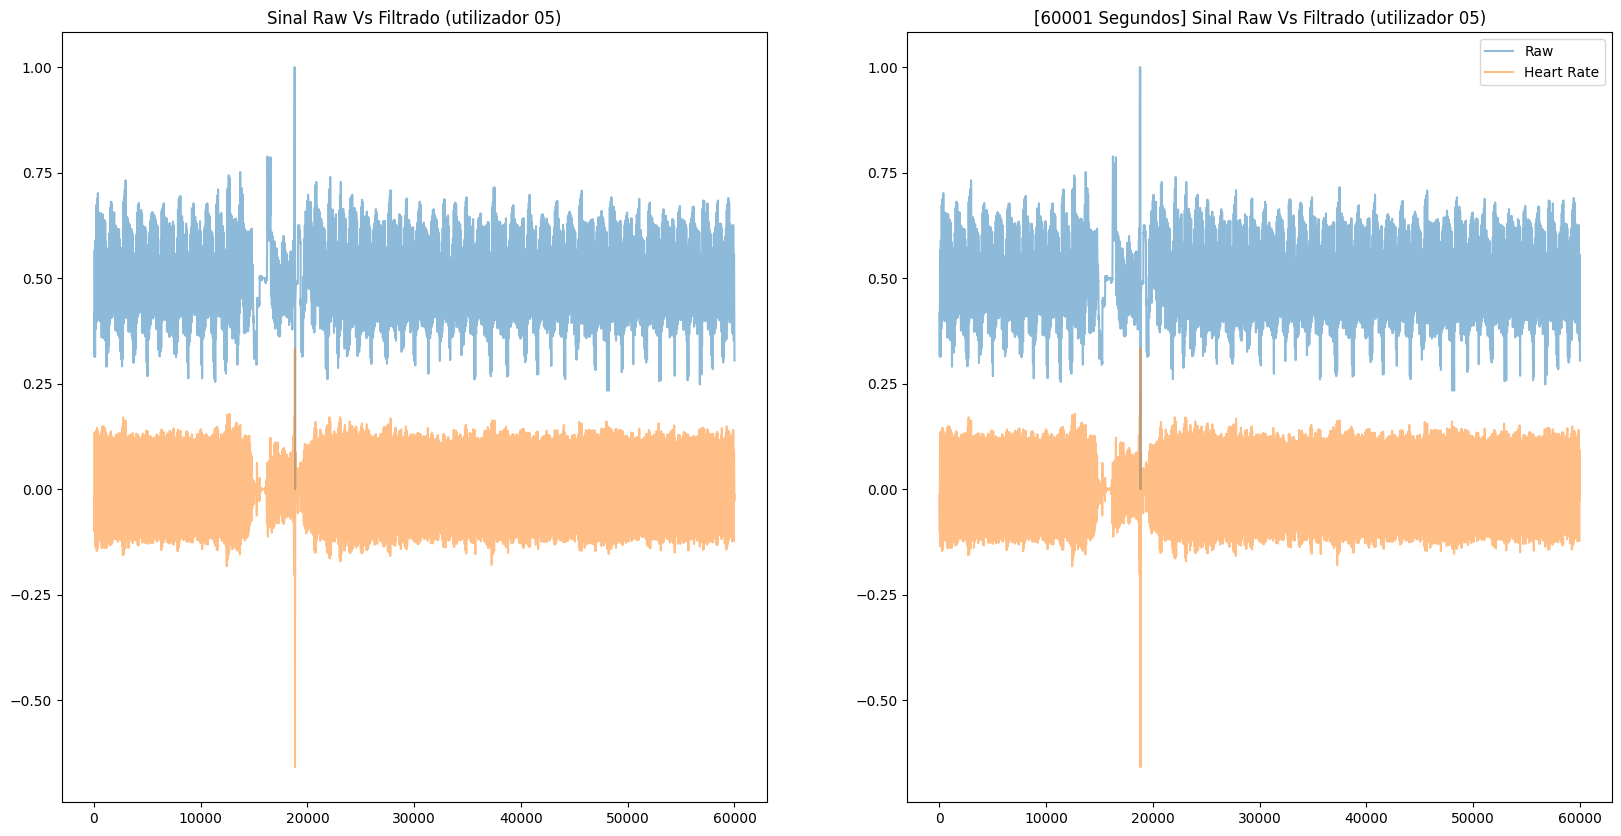

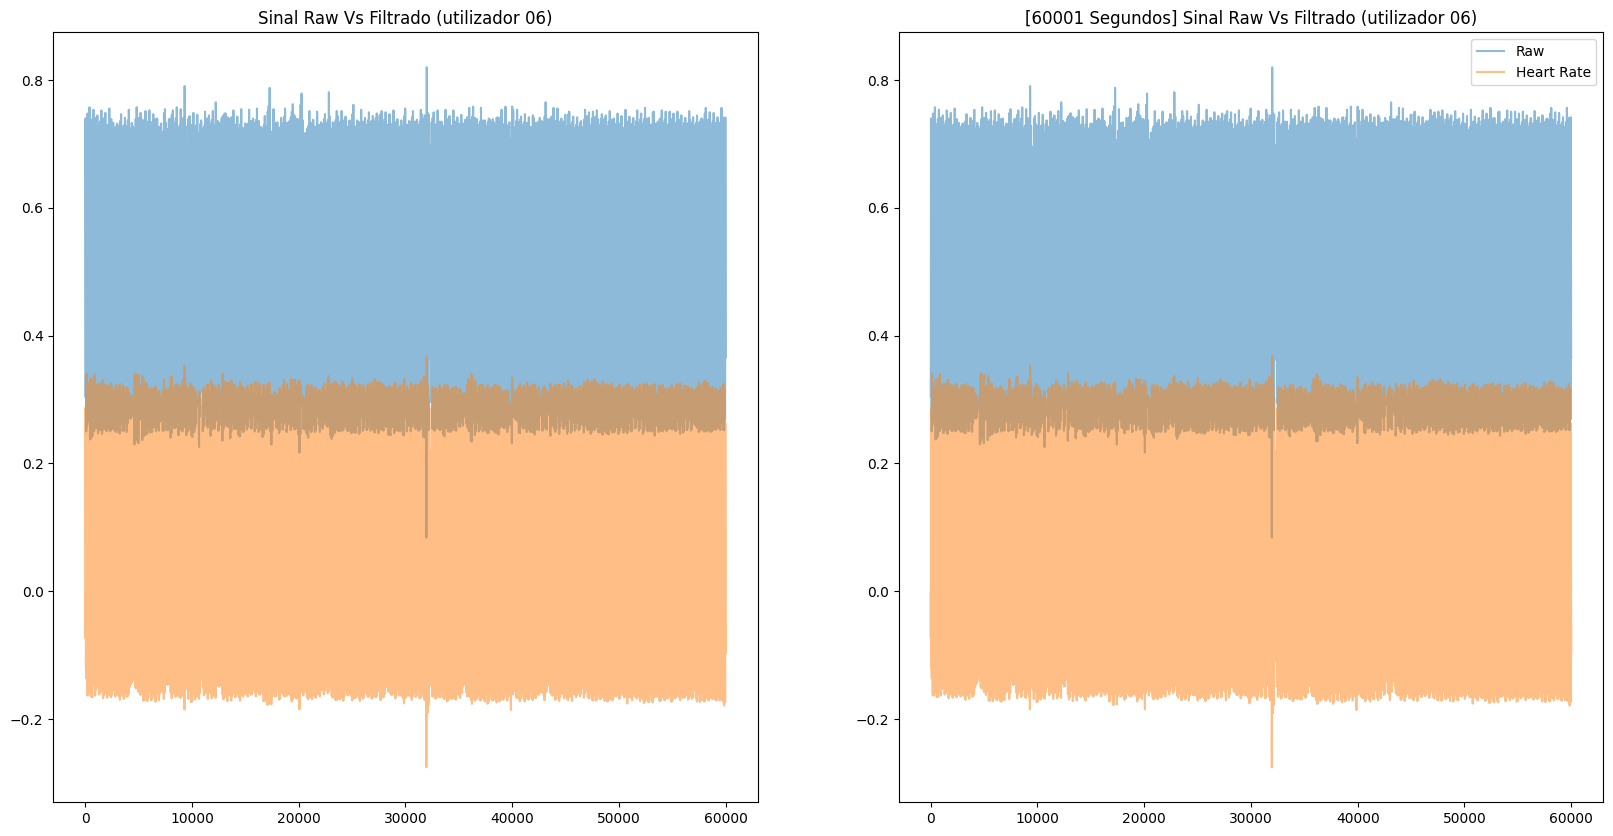

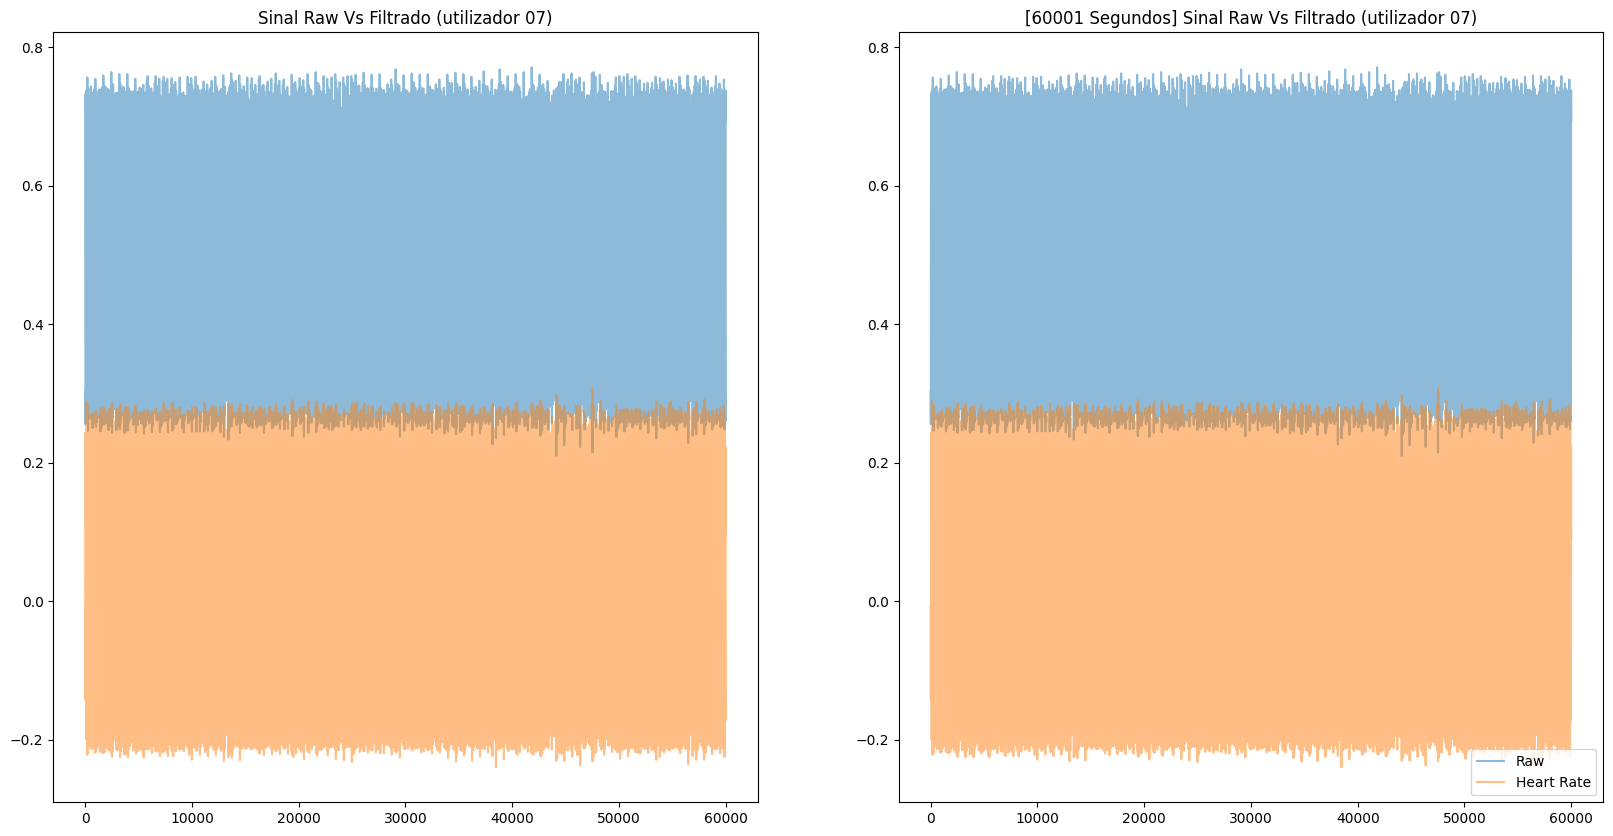

c:\Users\ana.sofia.oliveira\Documents\ISEL\SB2425\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


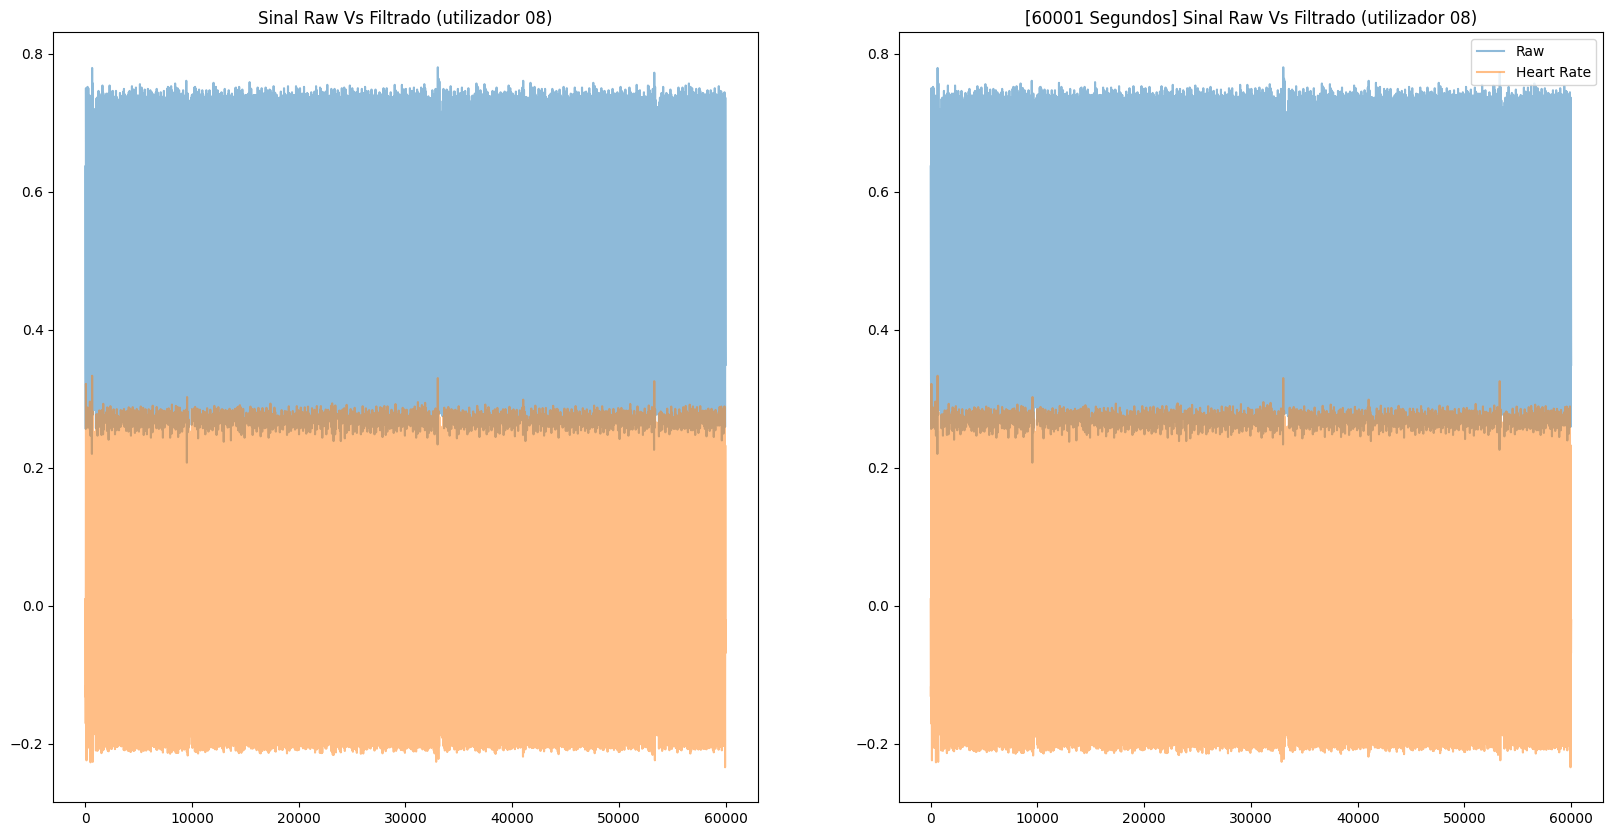

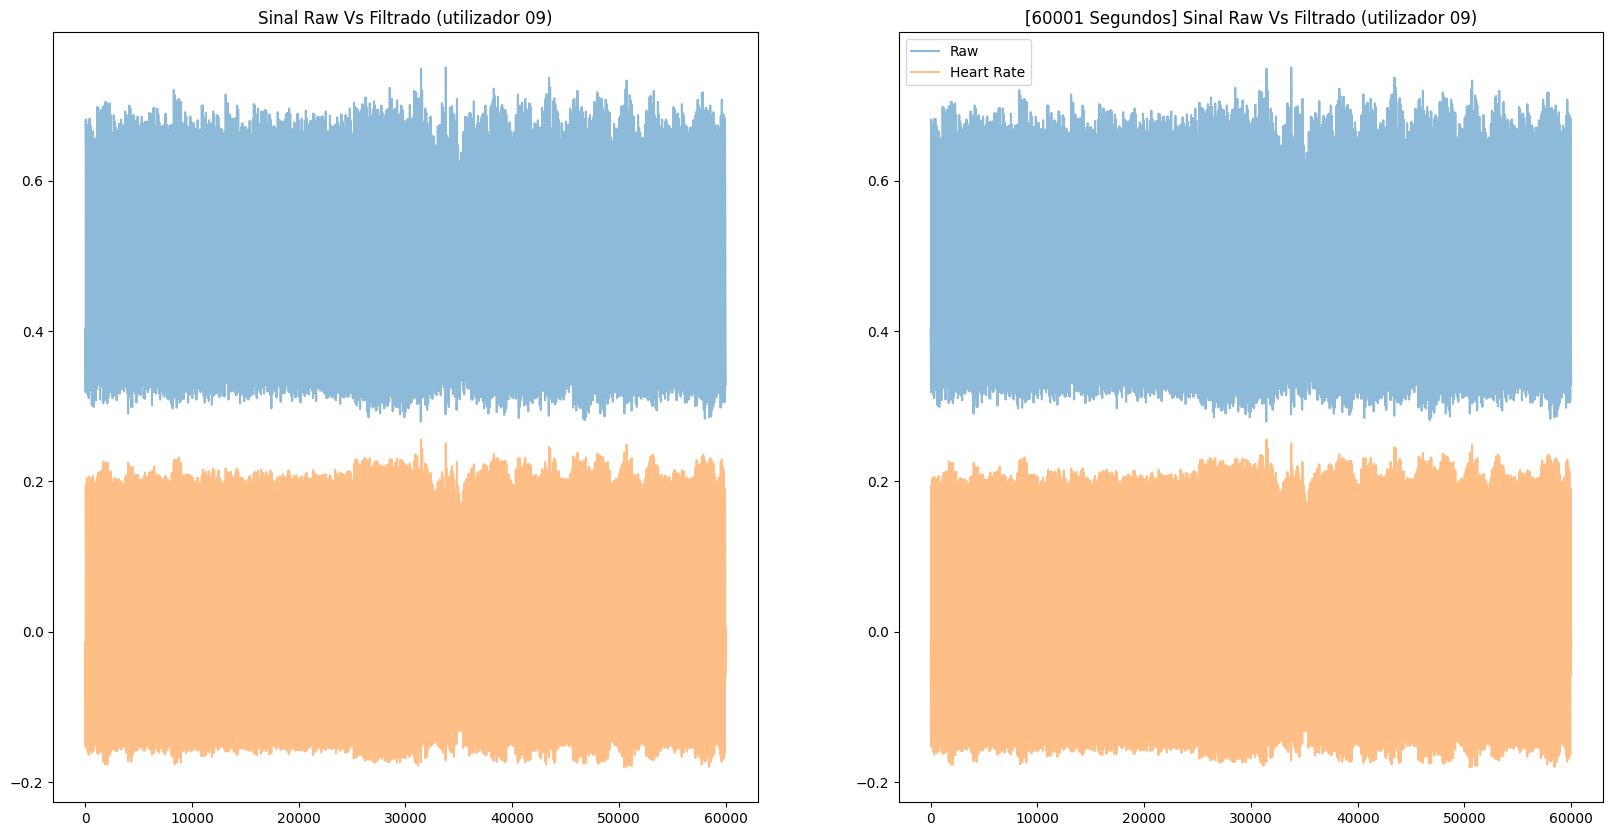

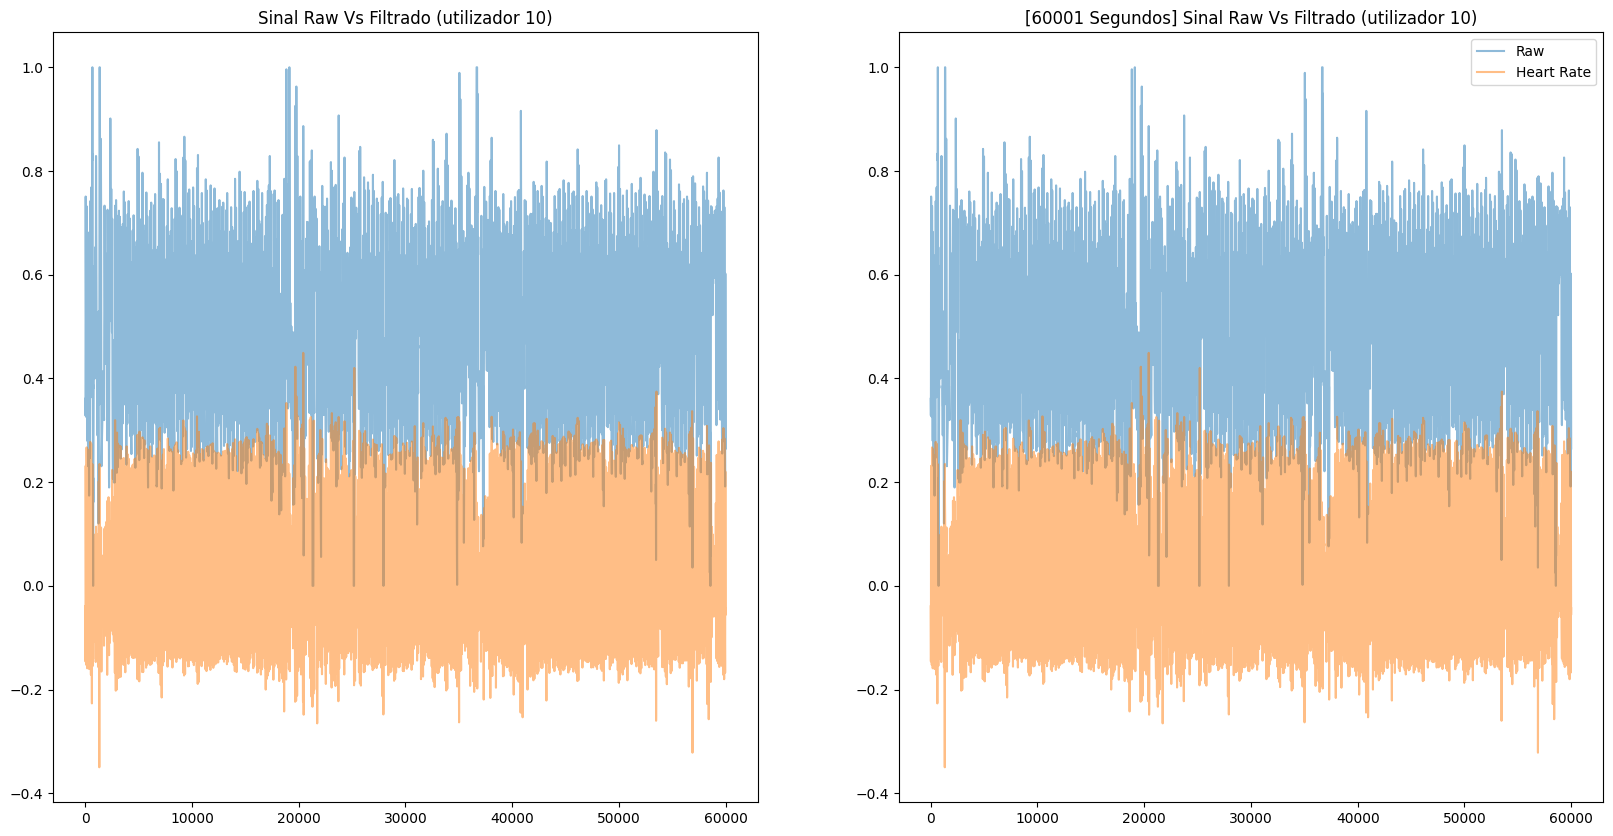

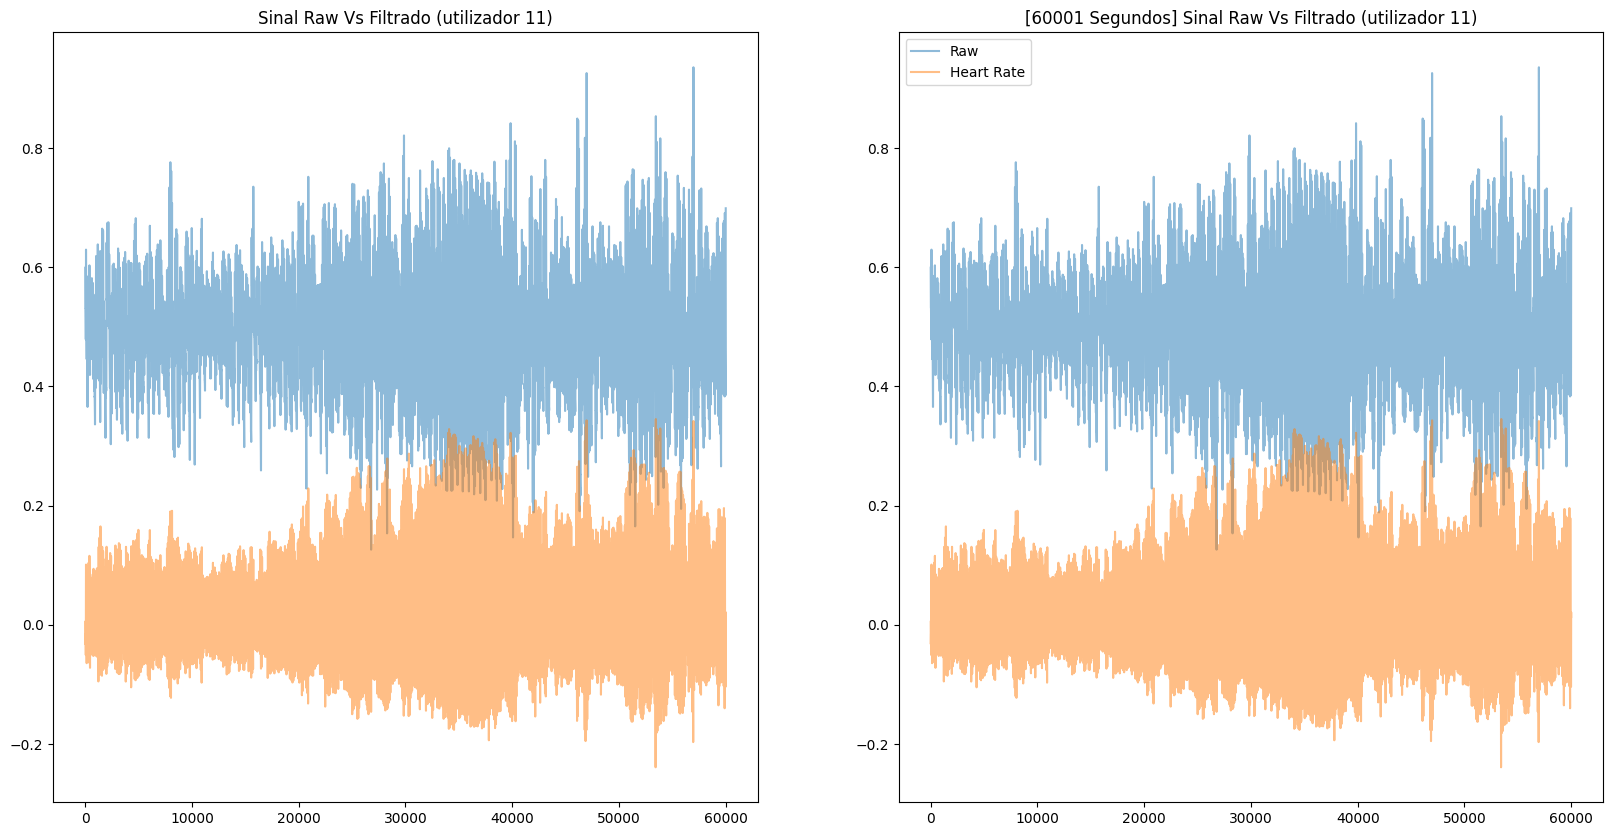

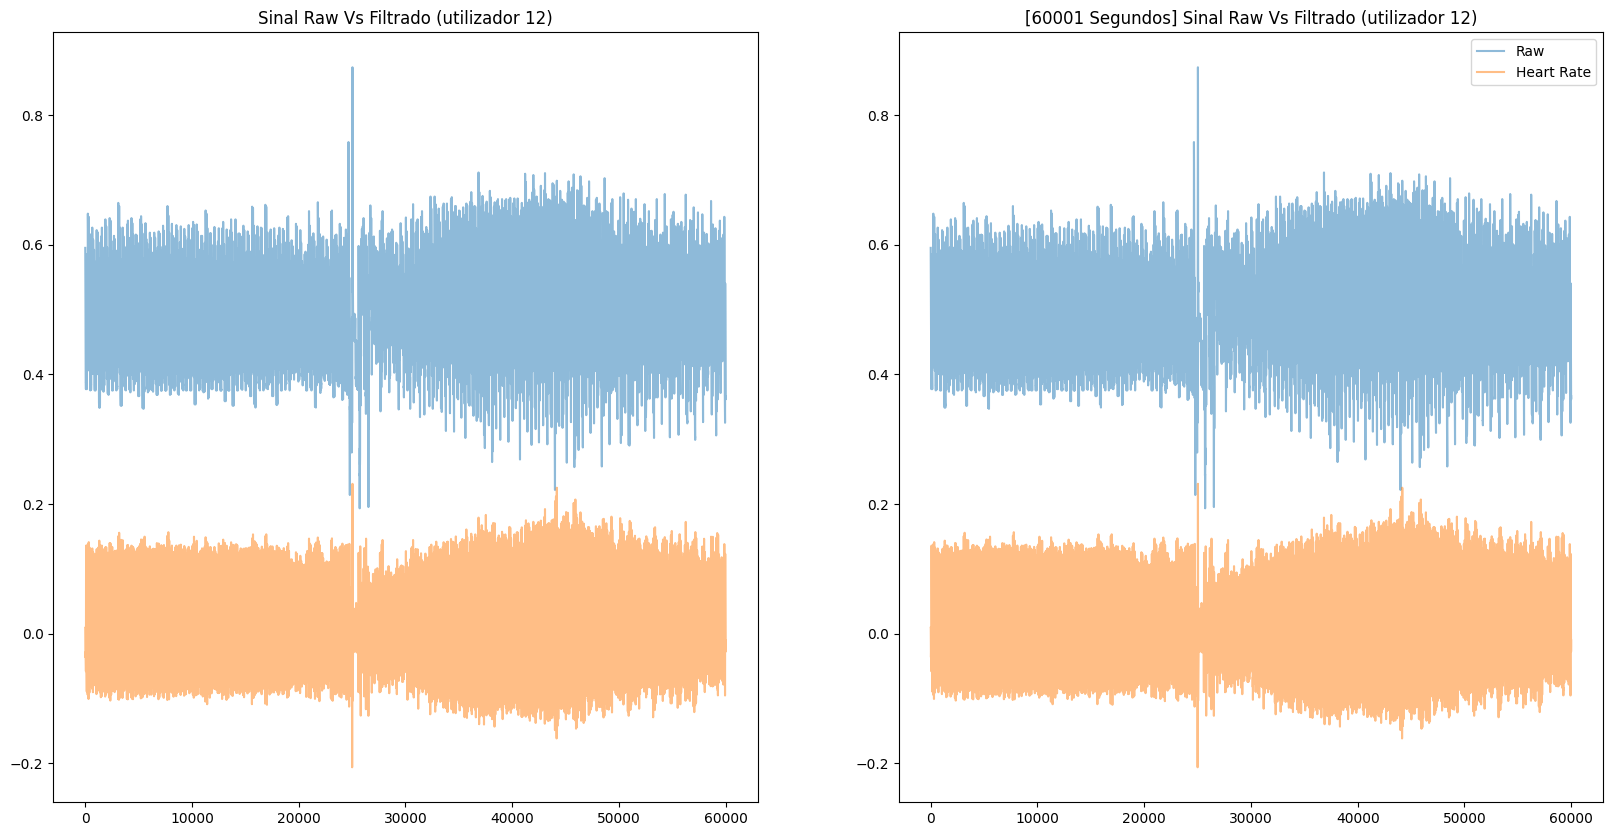

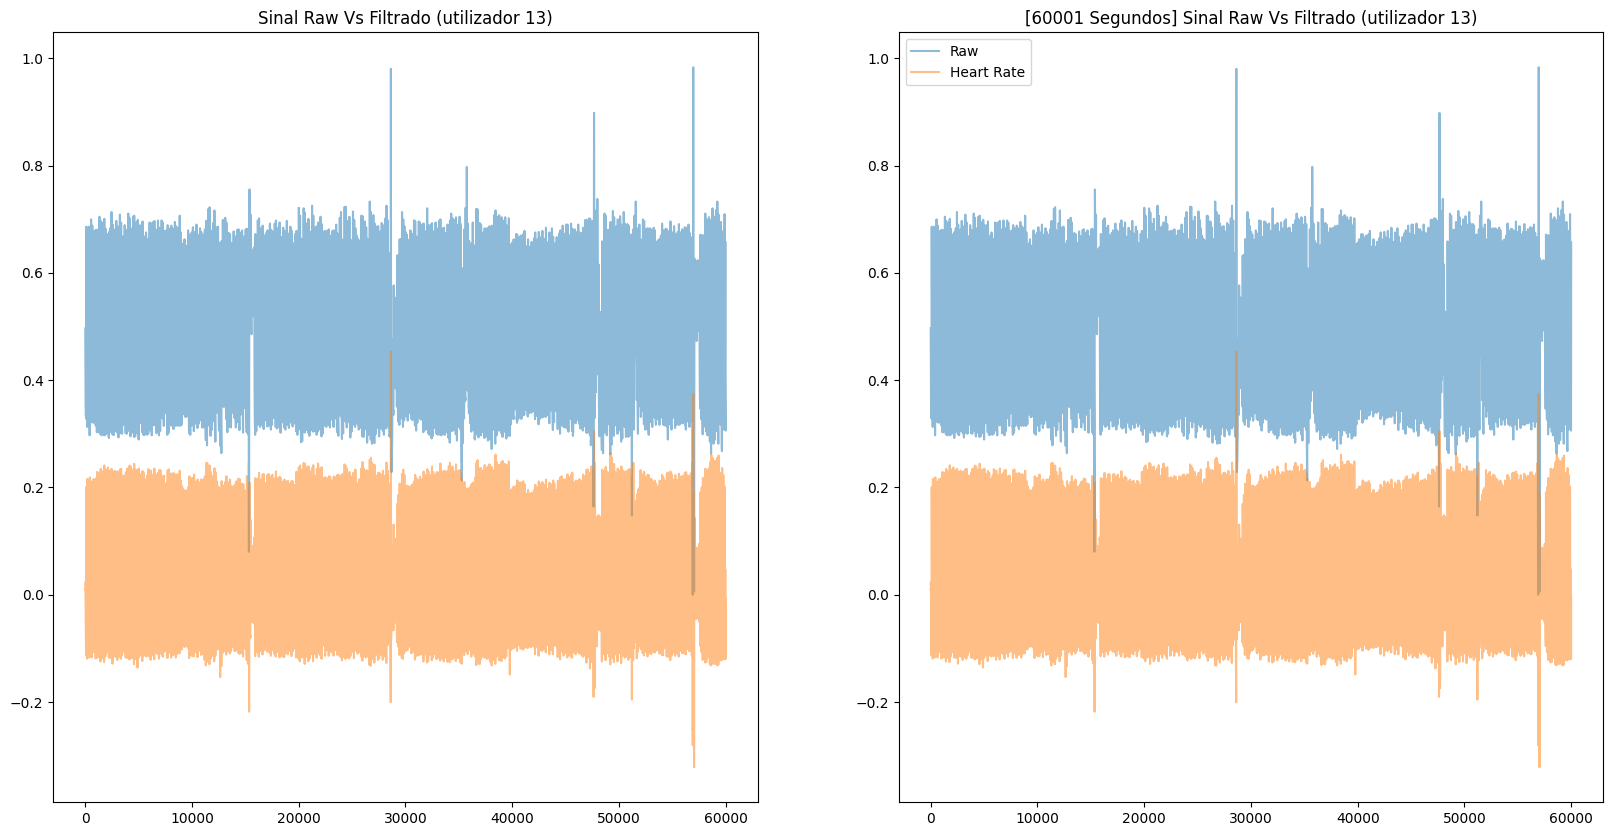

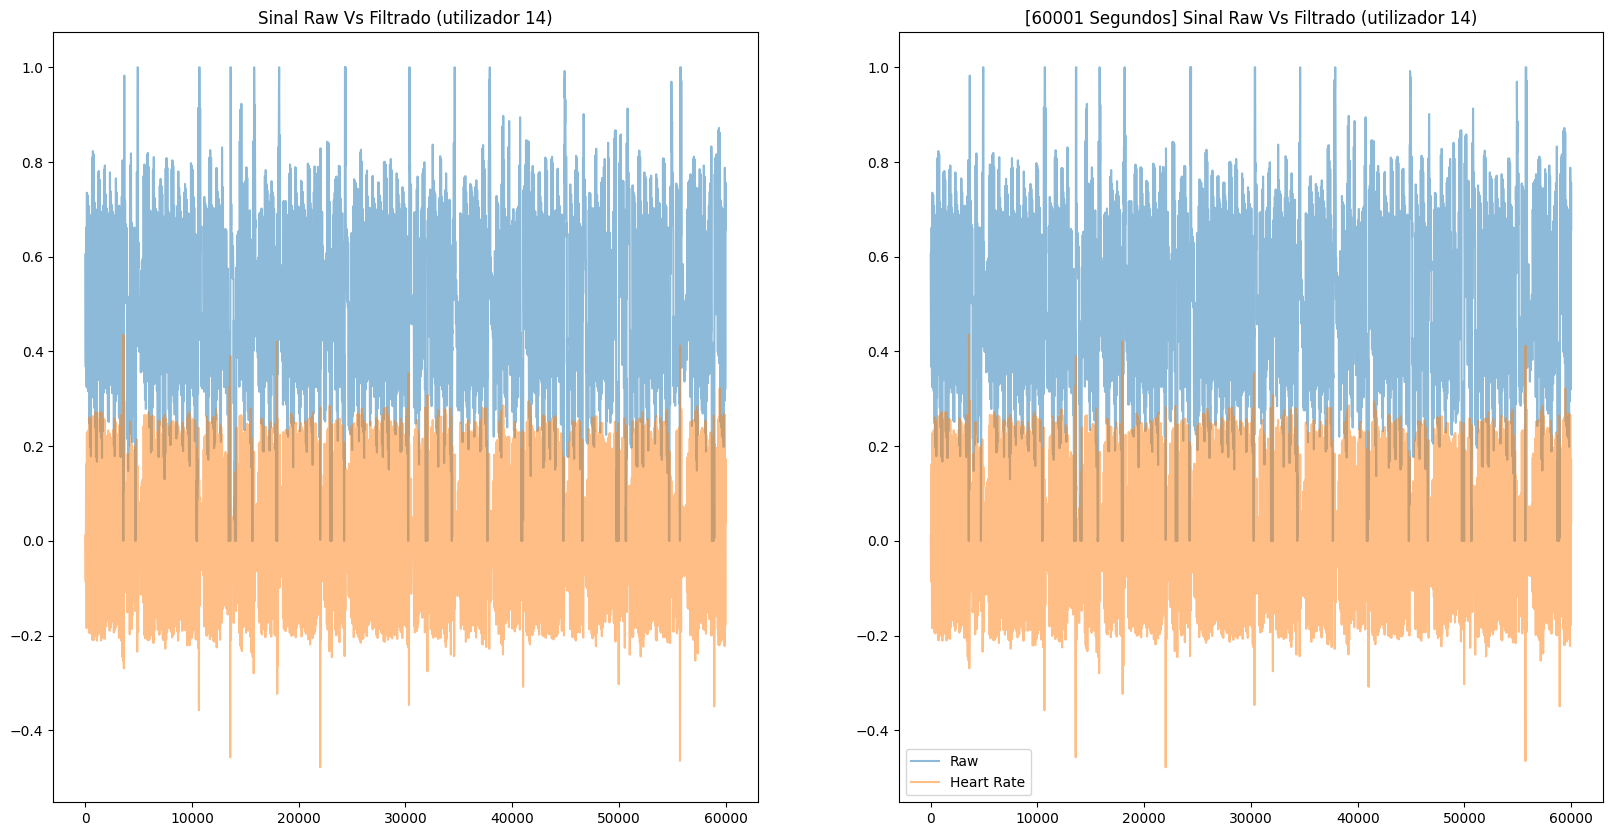

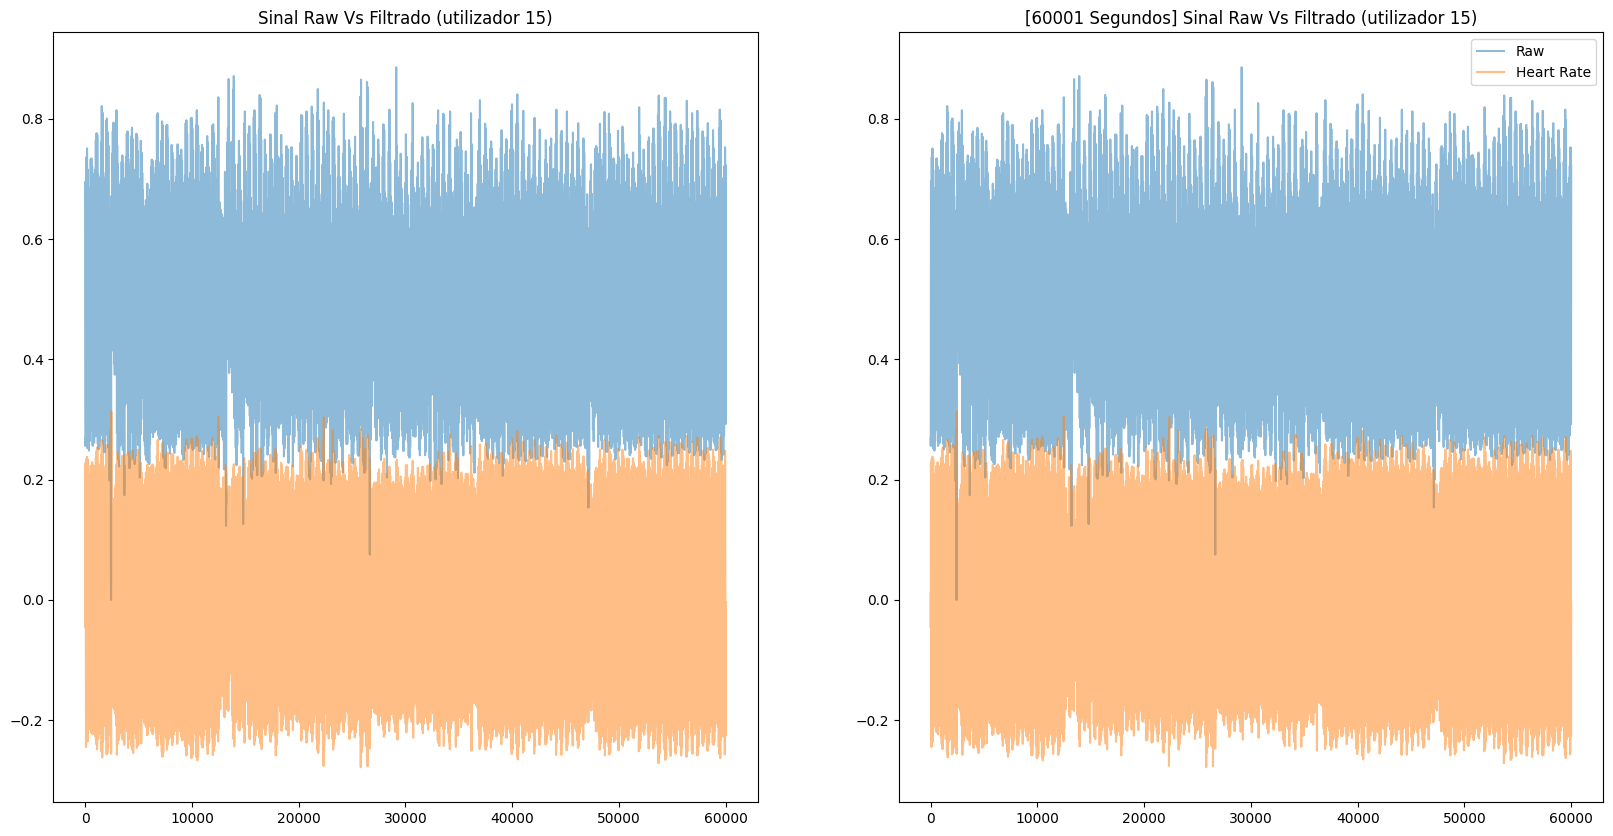

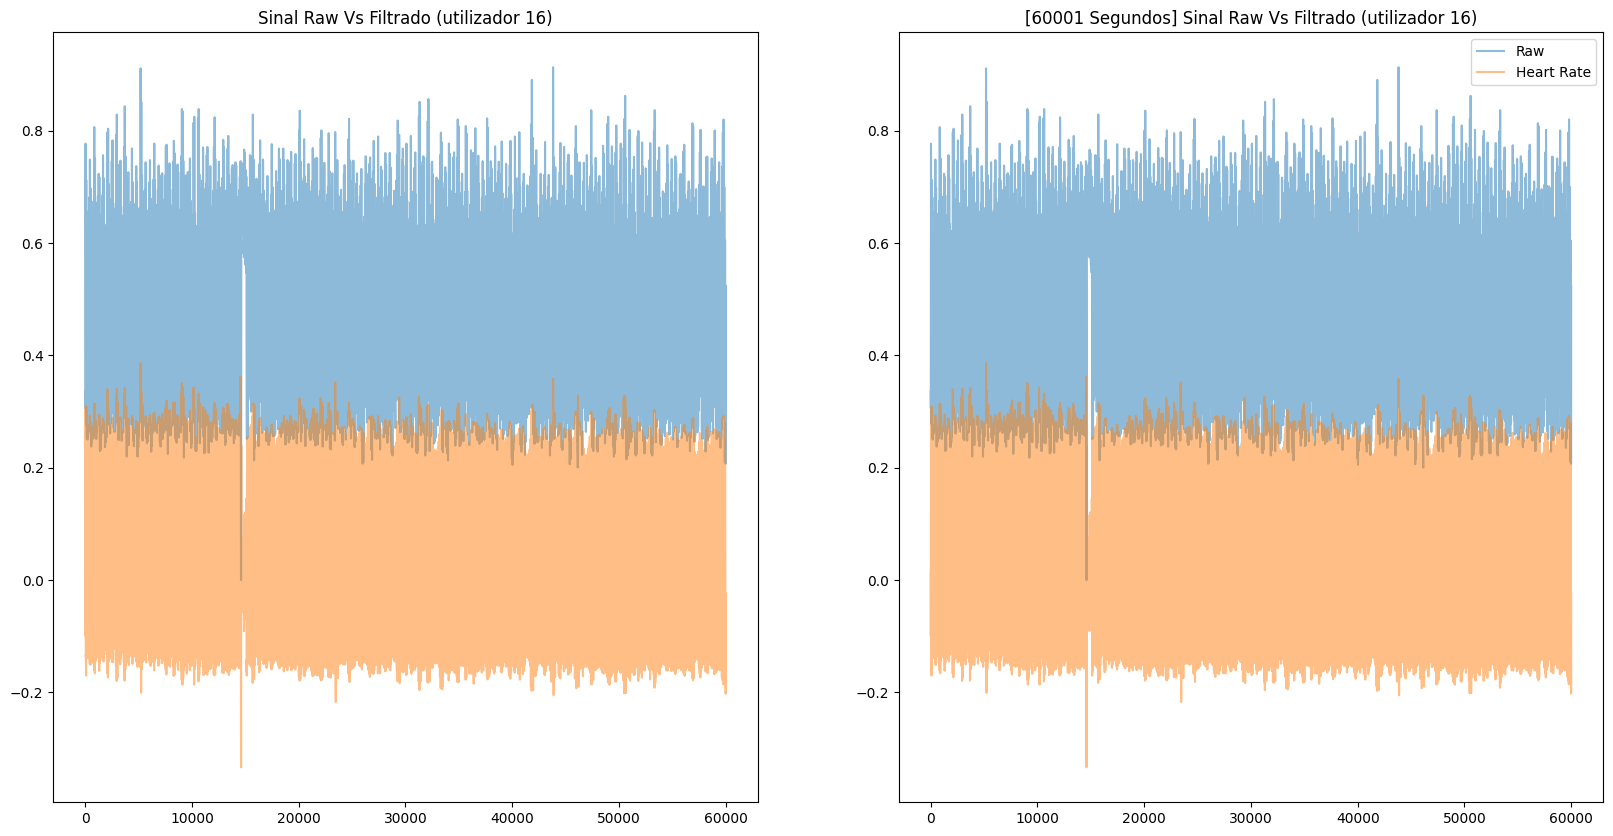

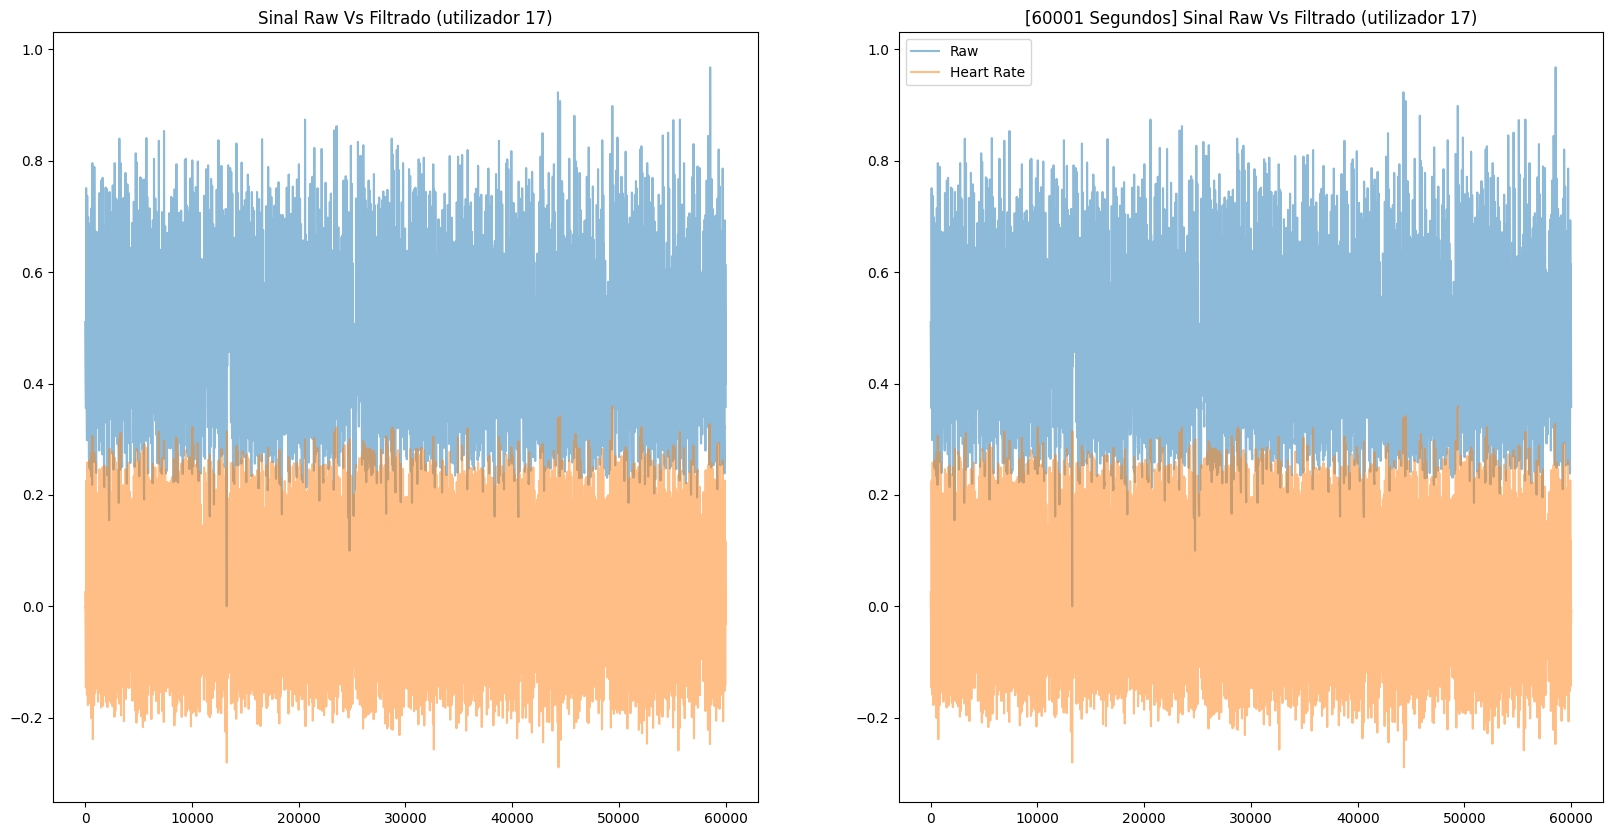

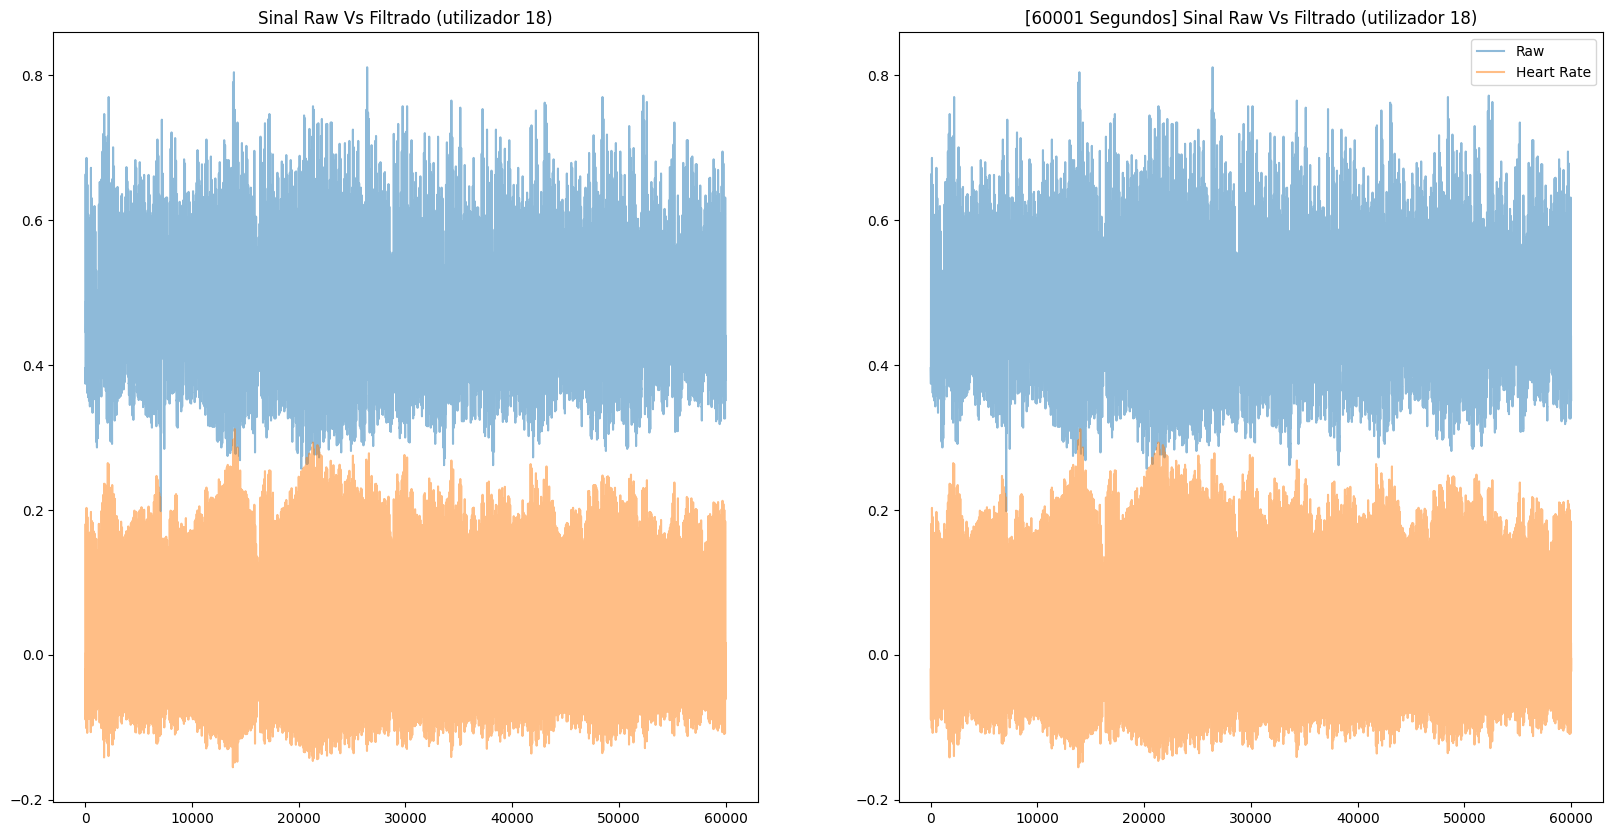

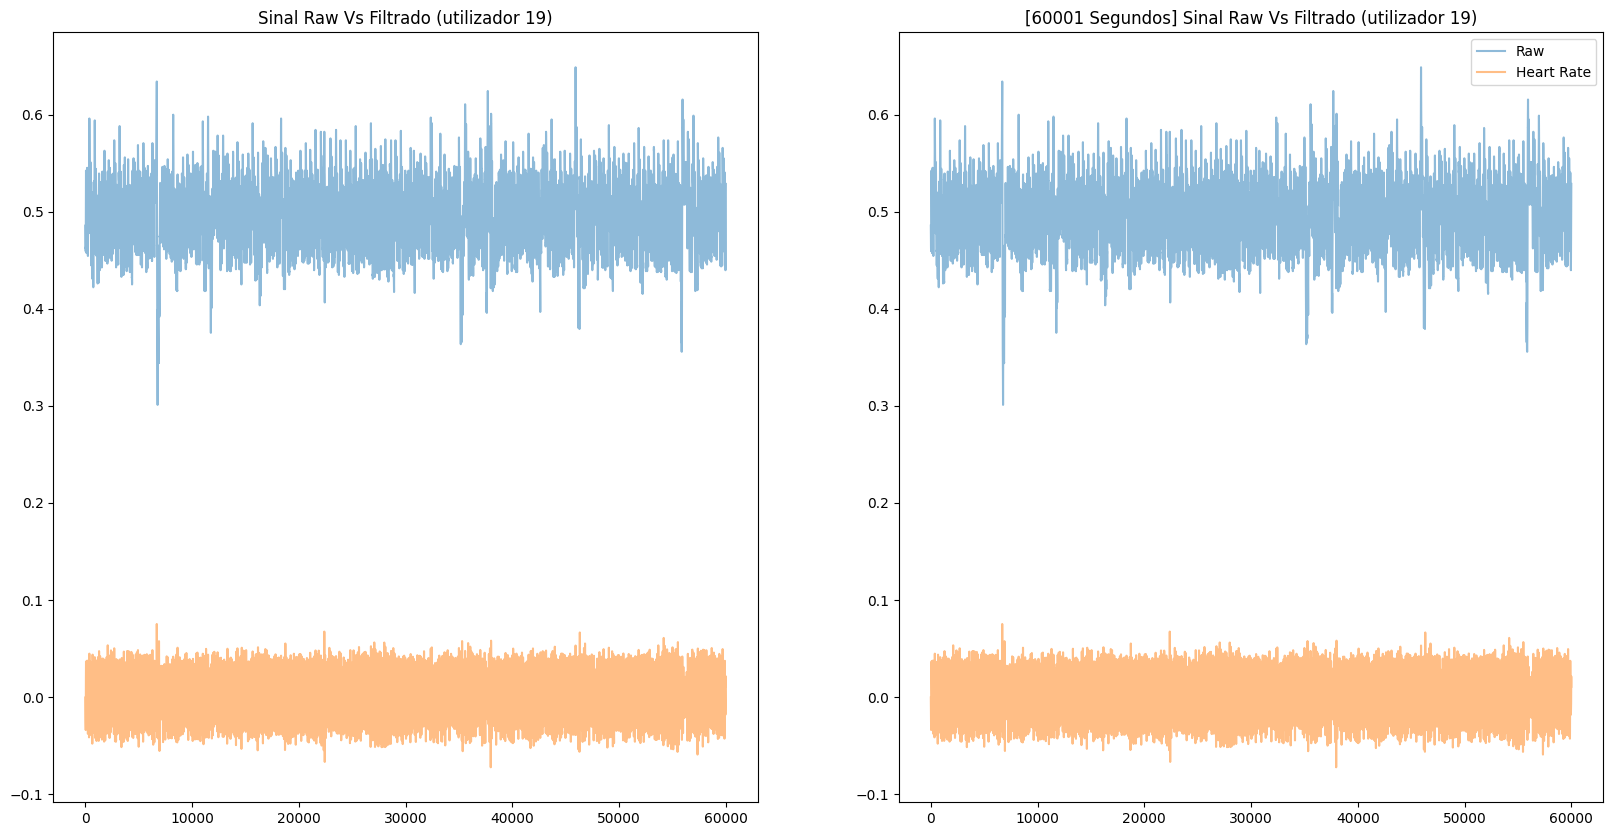

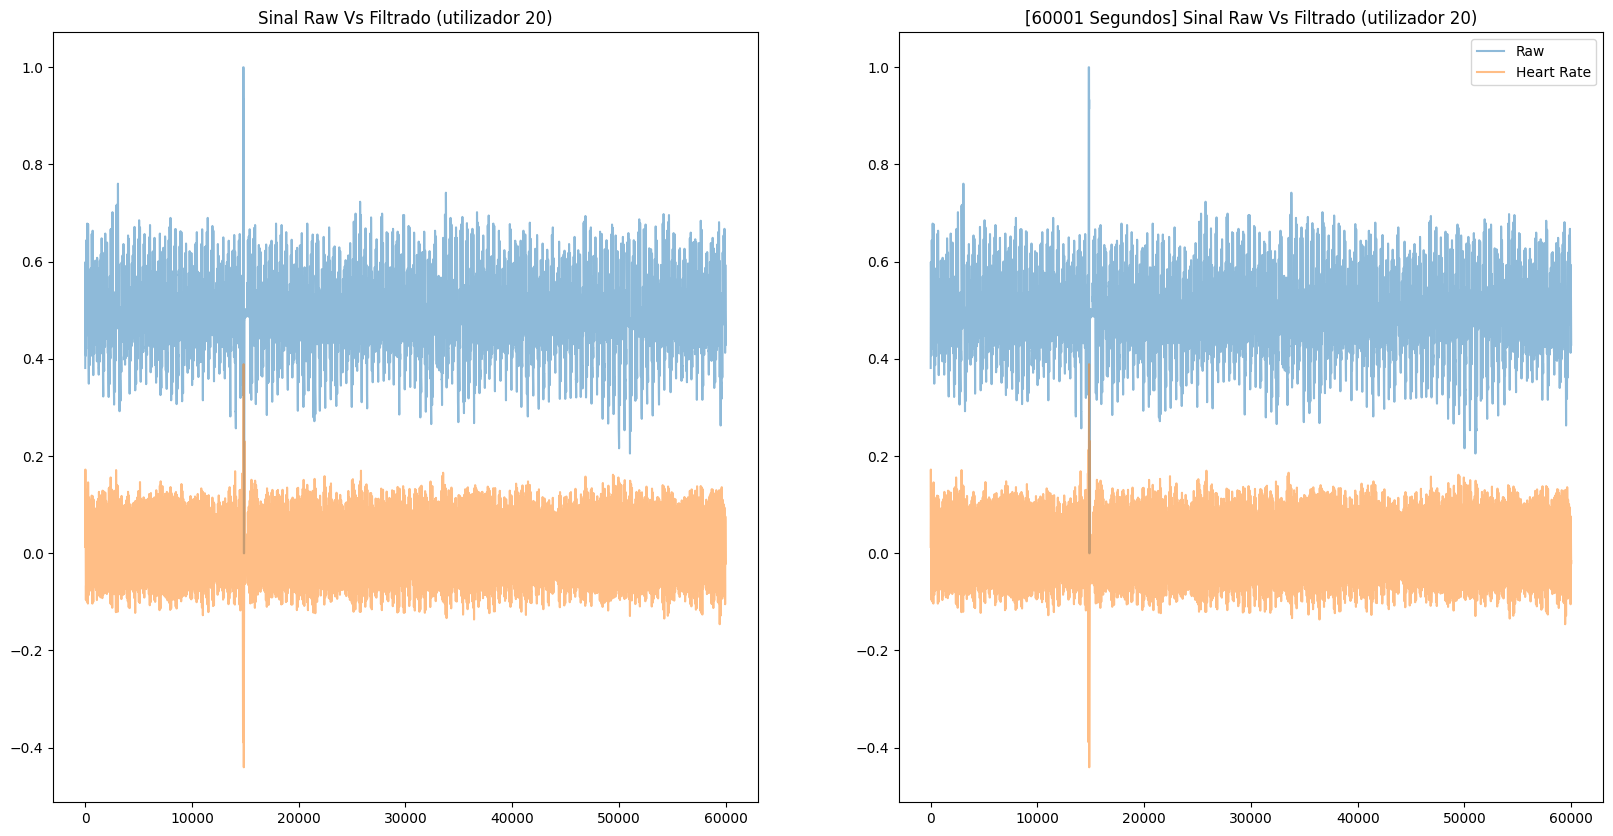

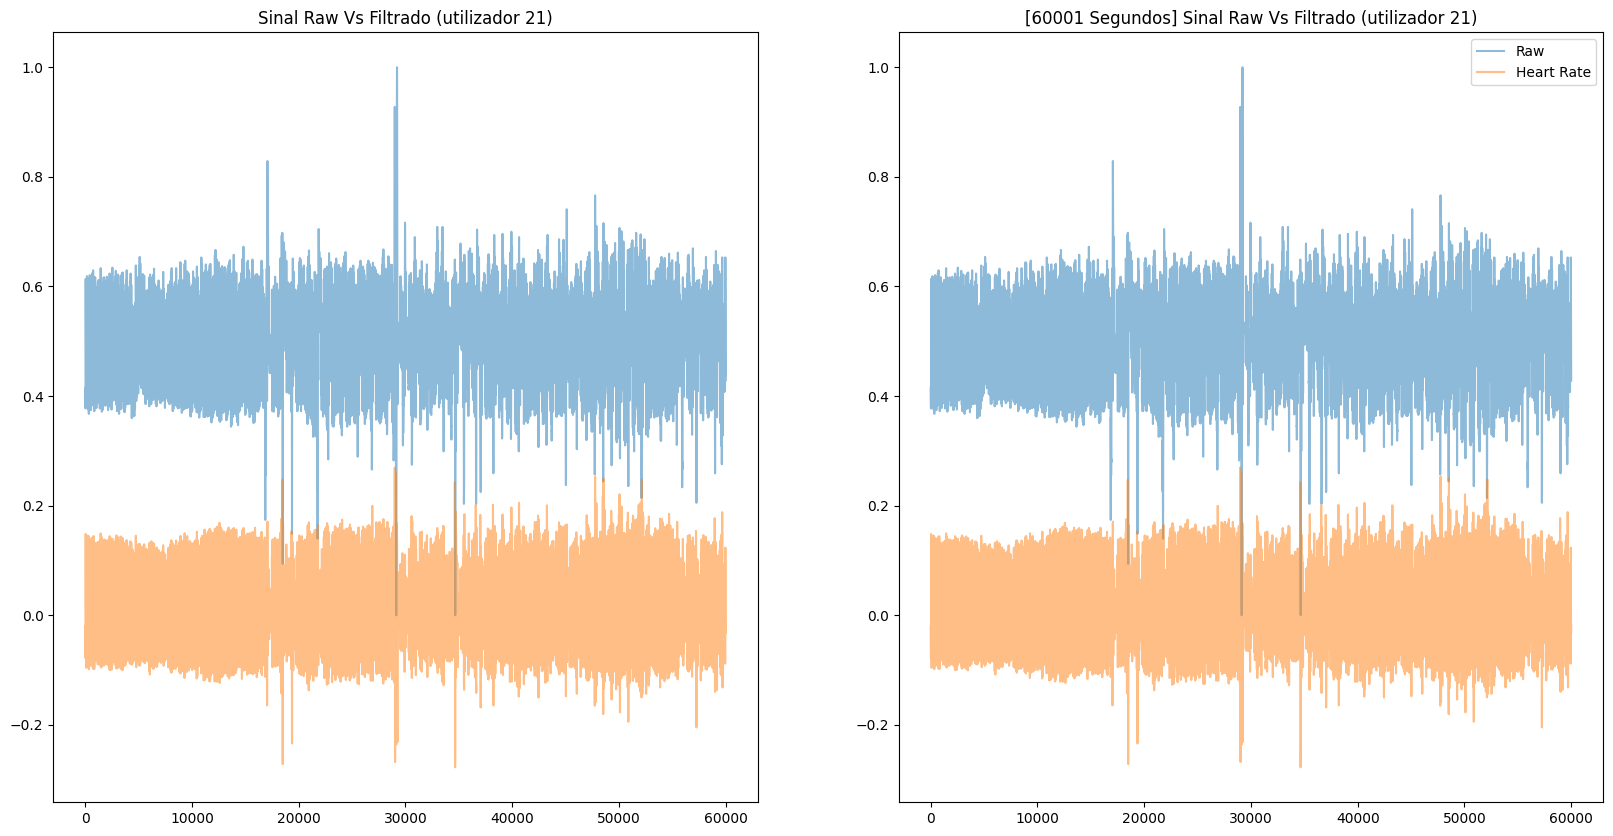

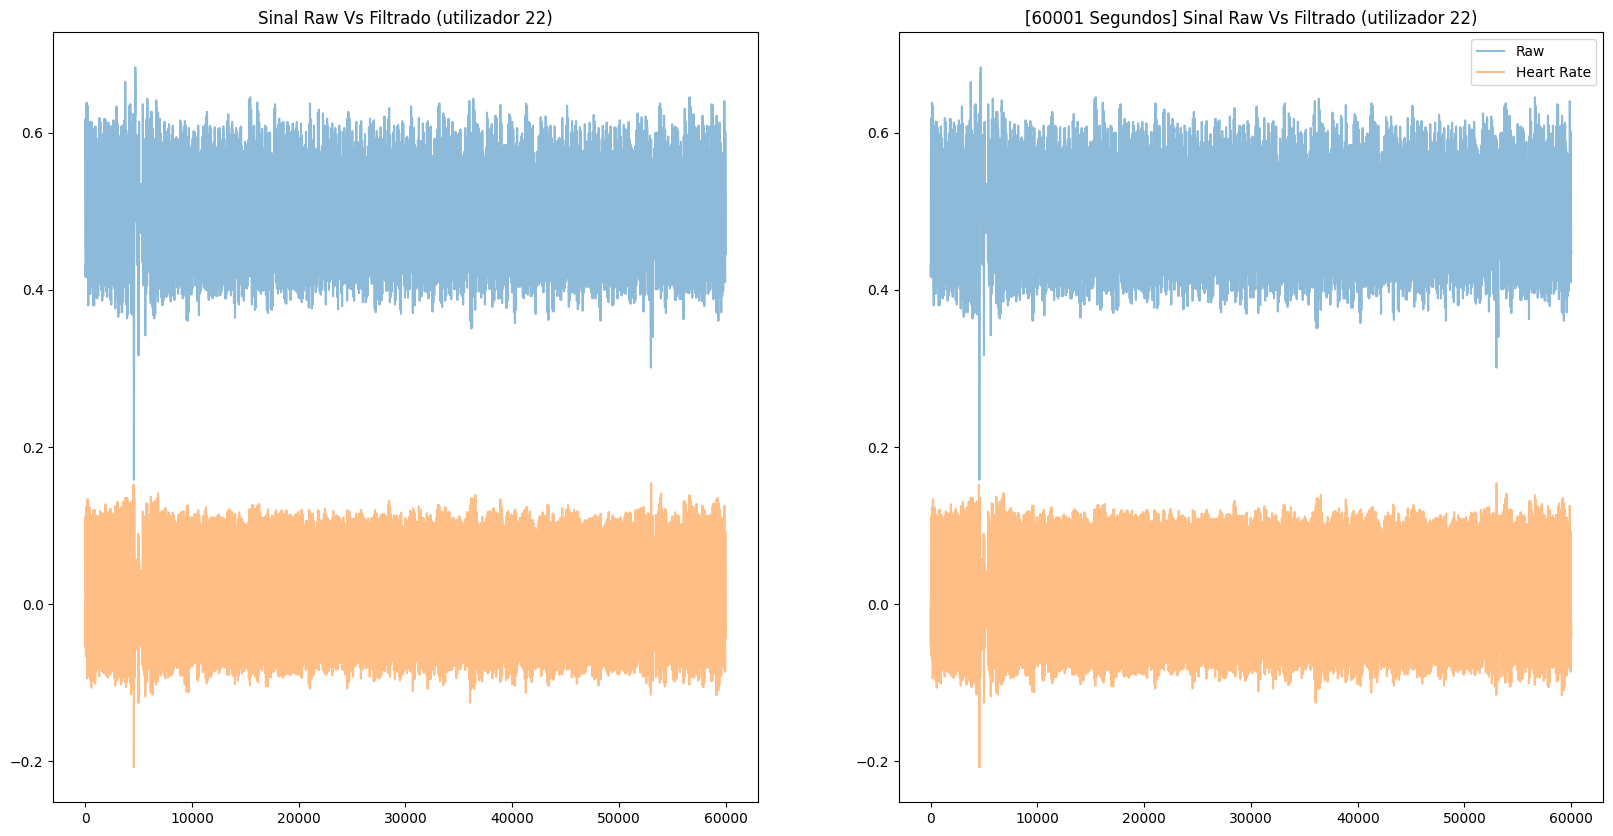

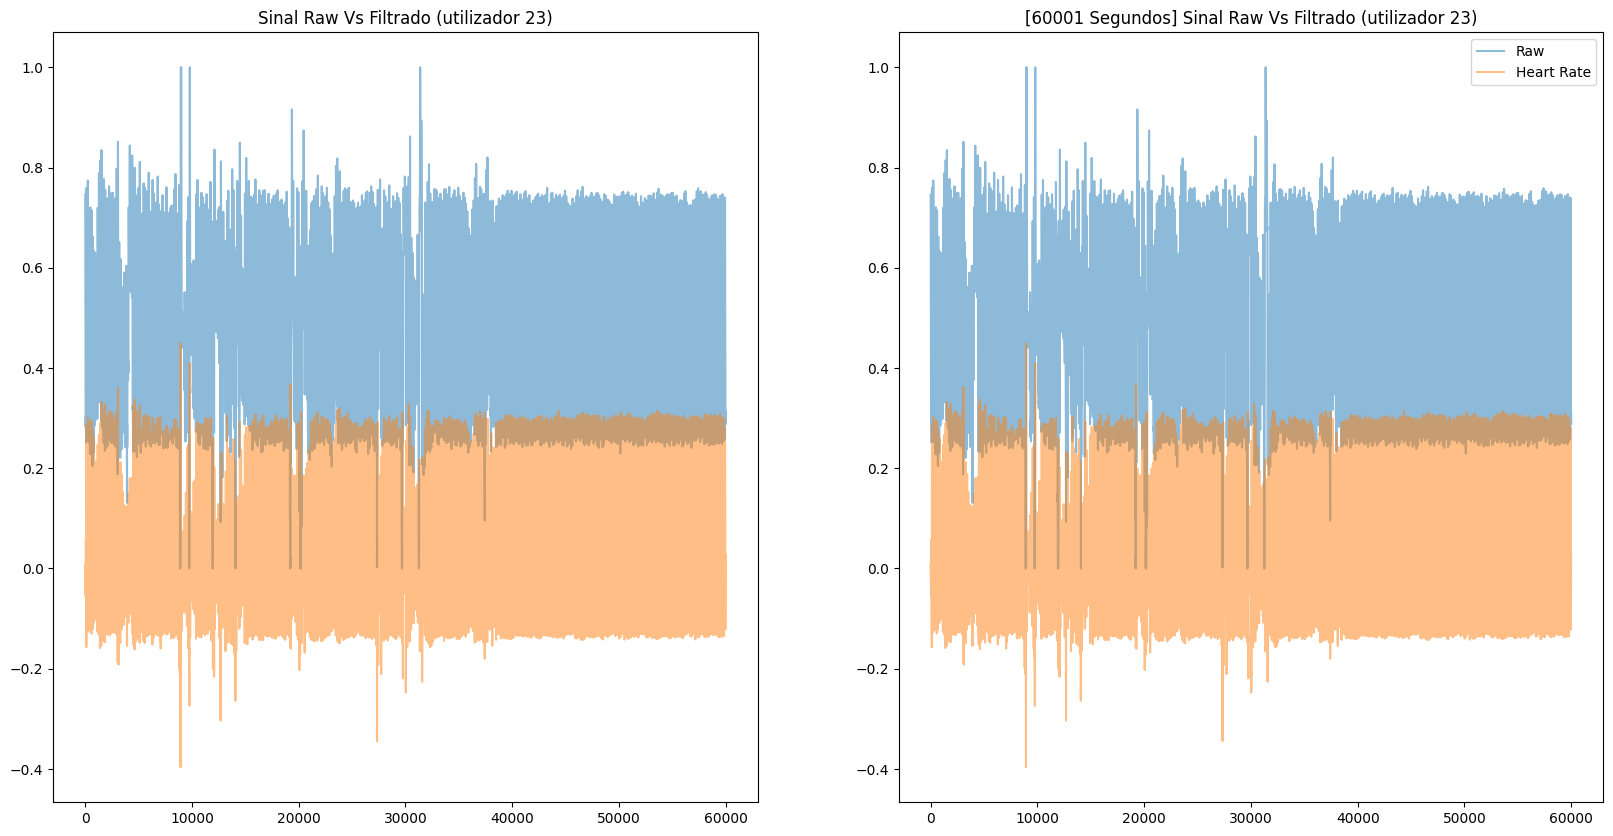

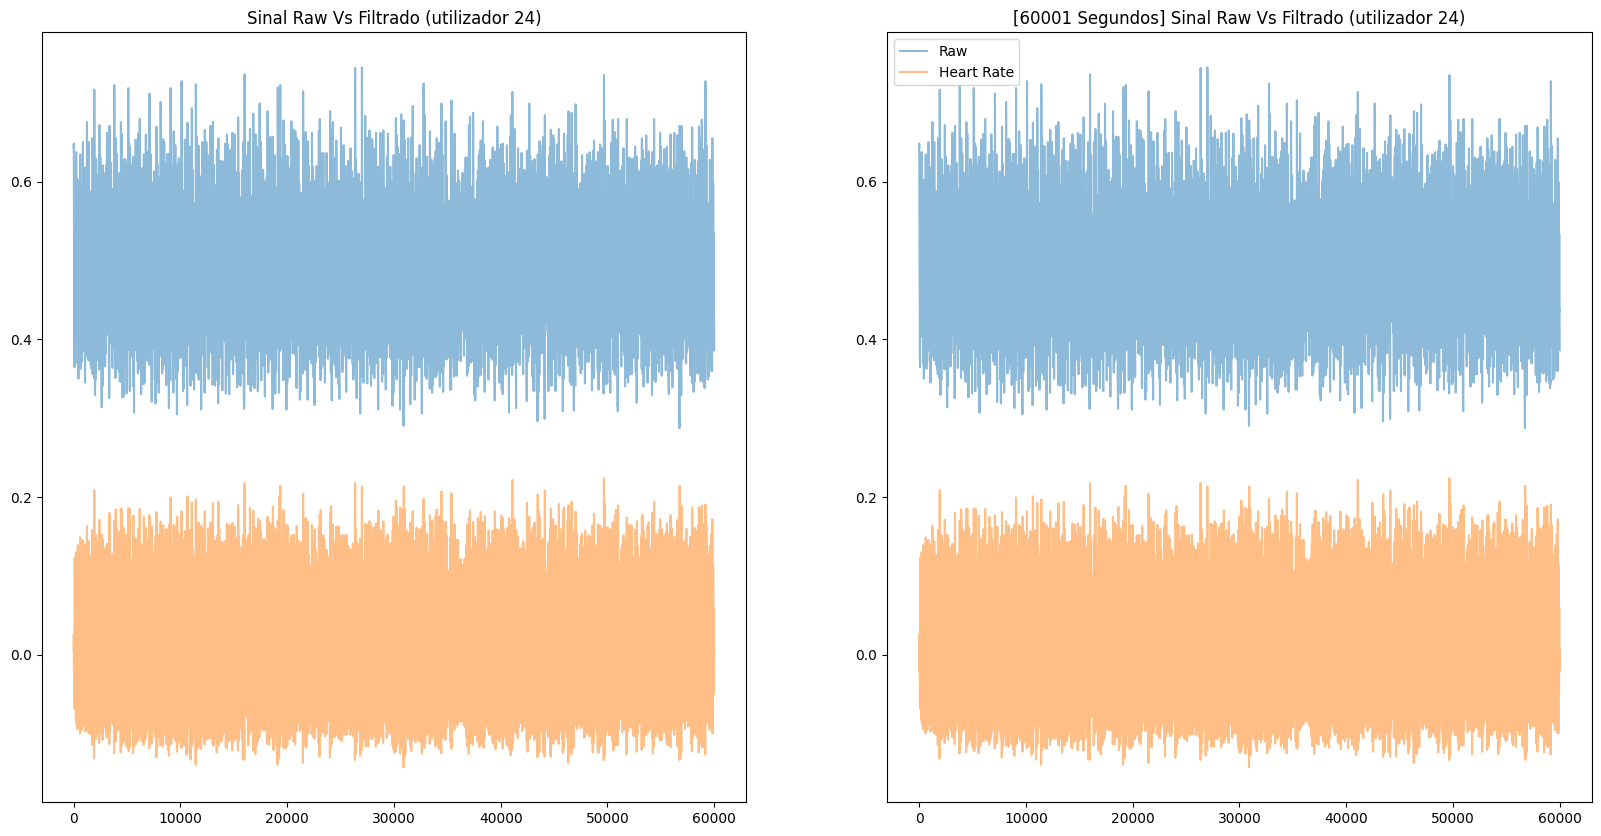

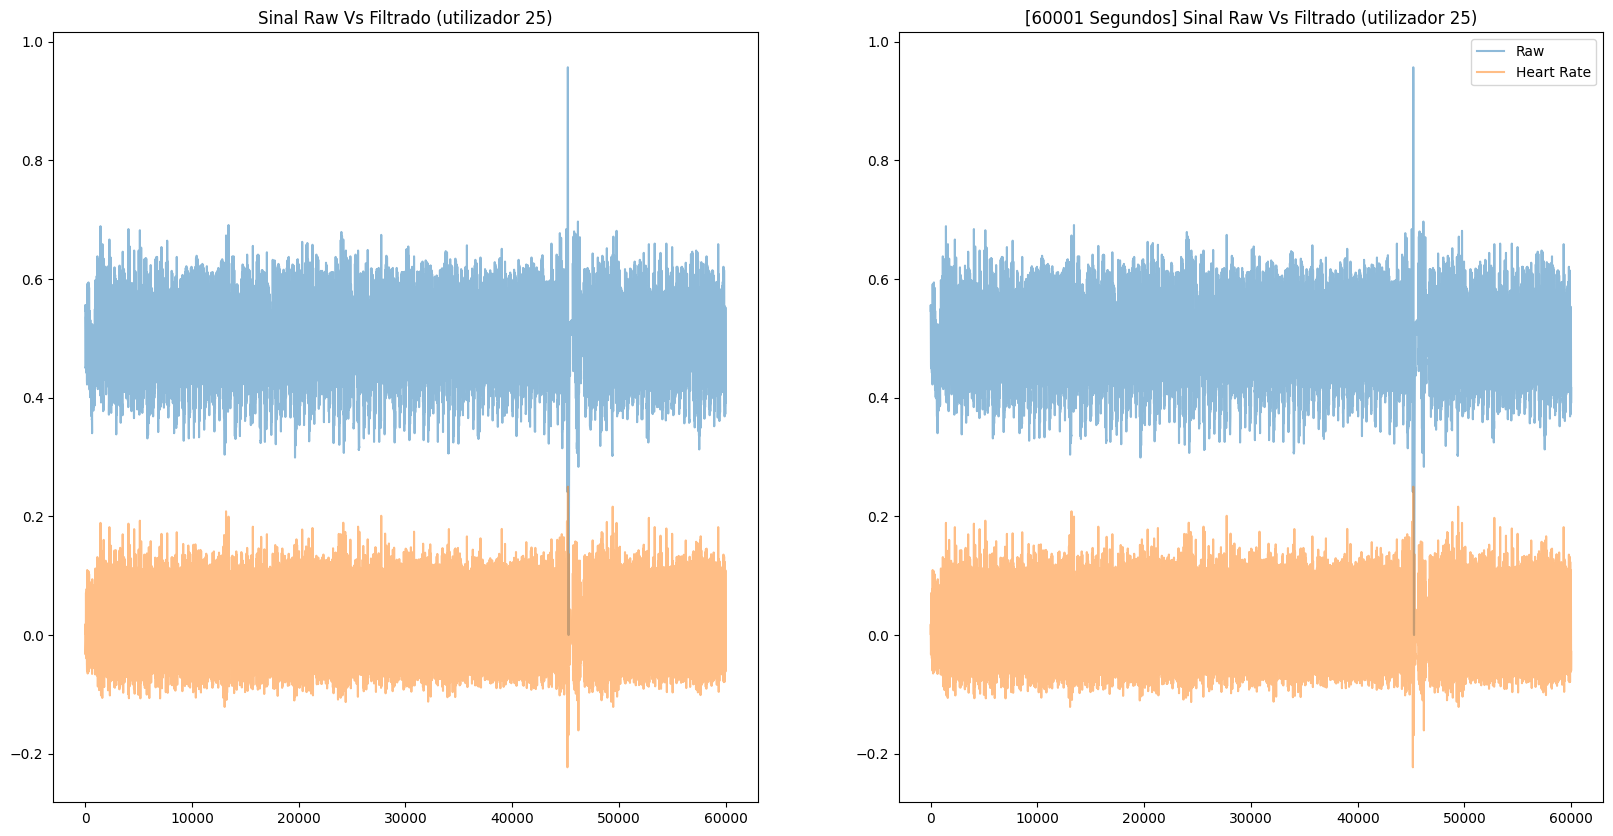

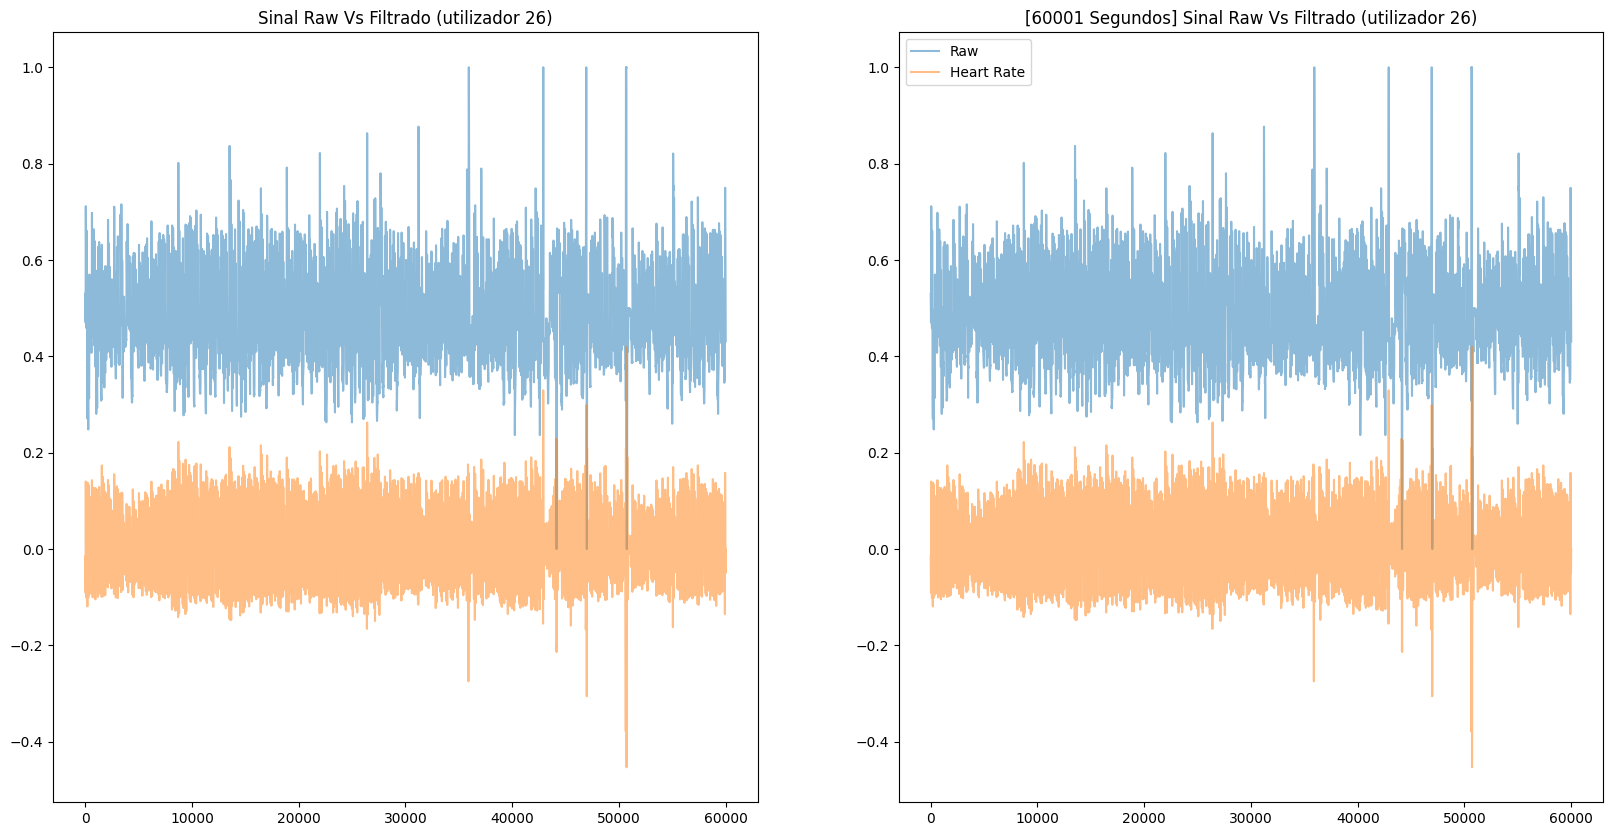

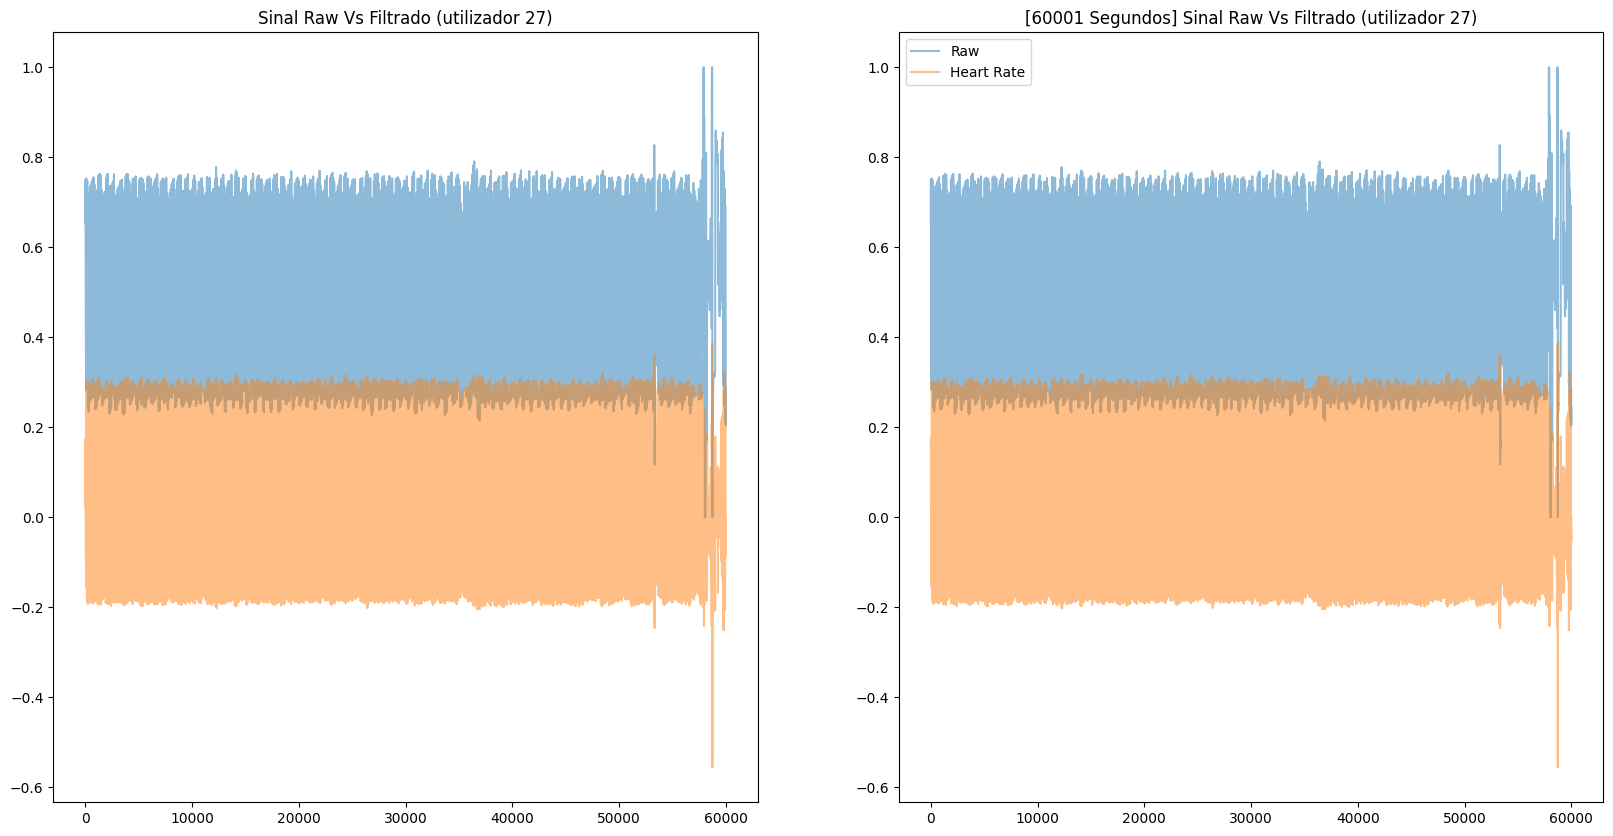

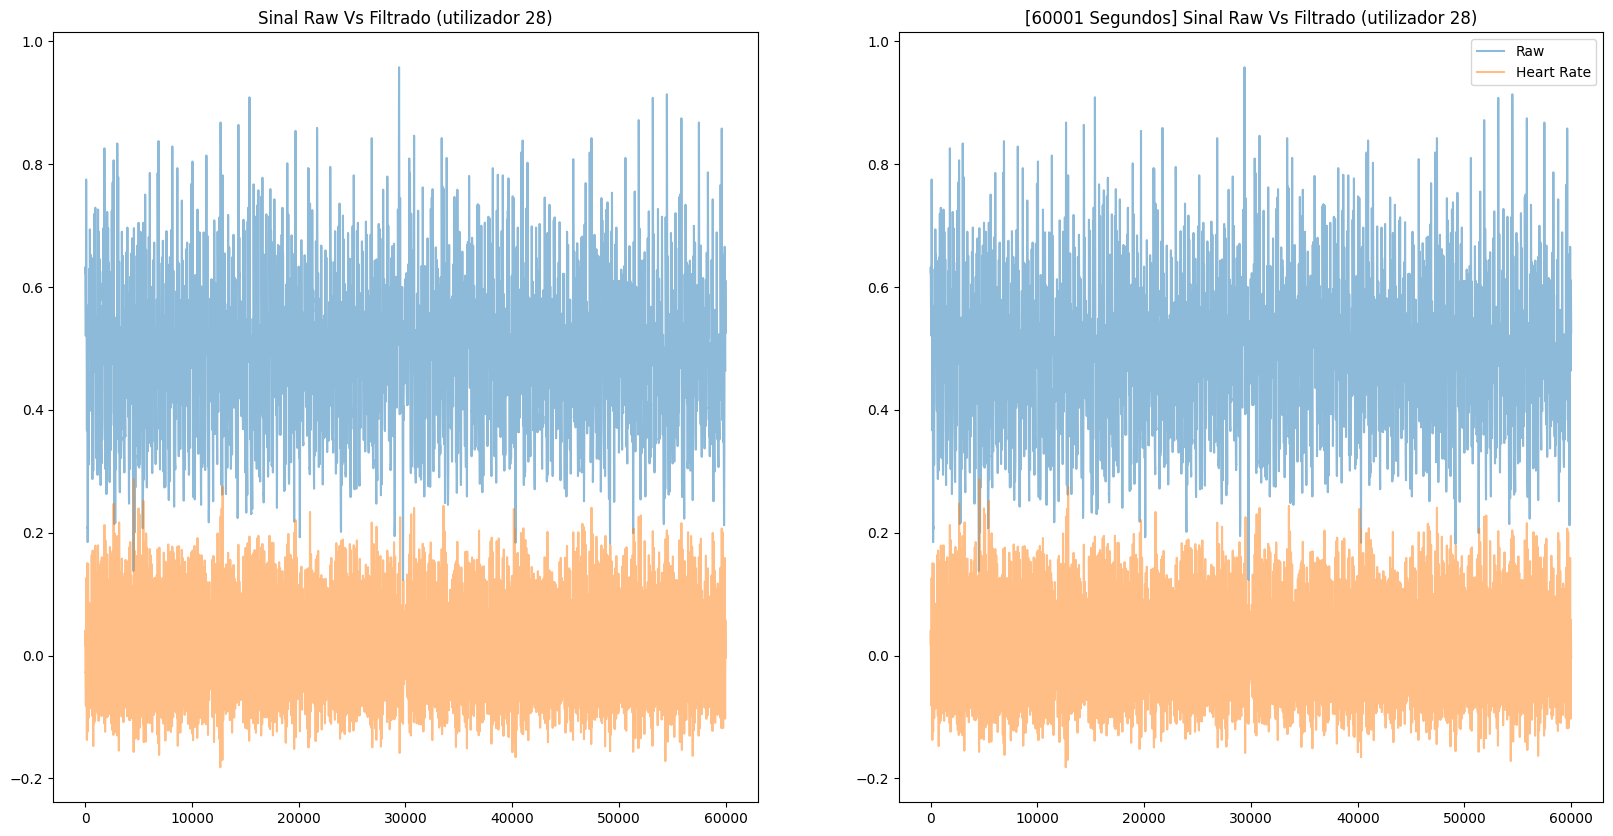

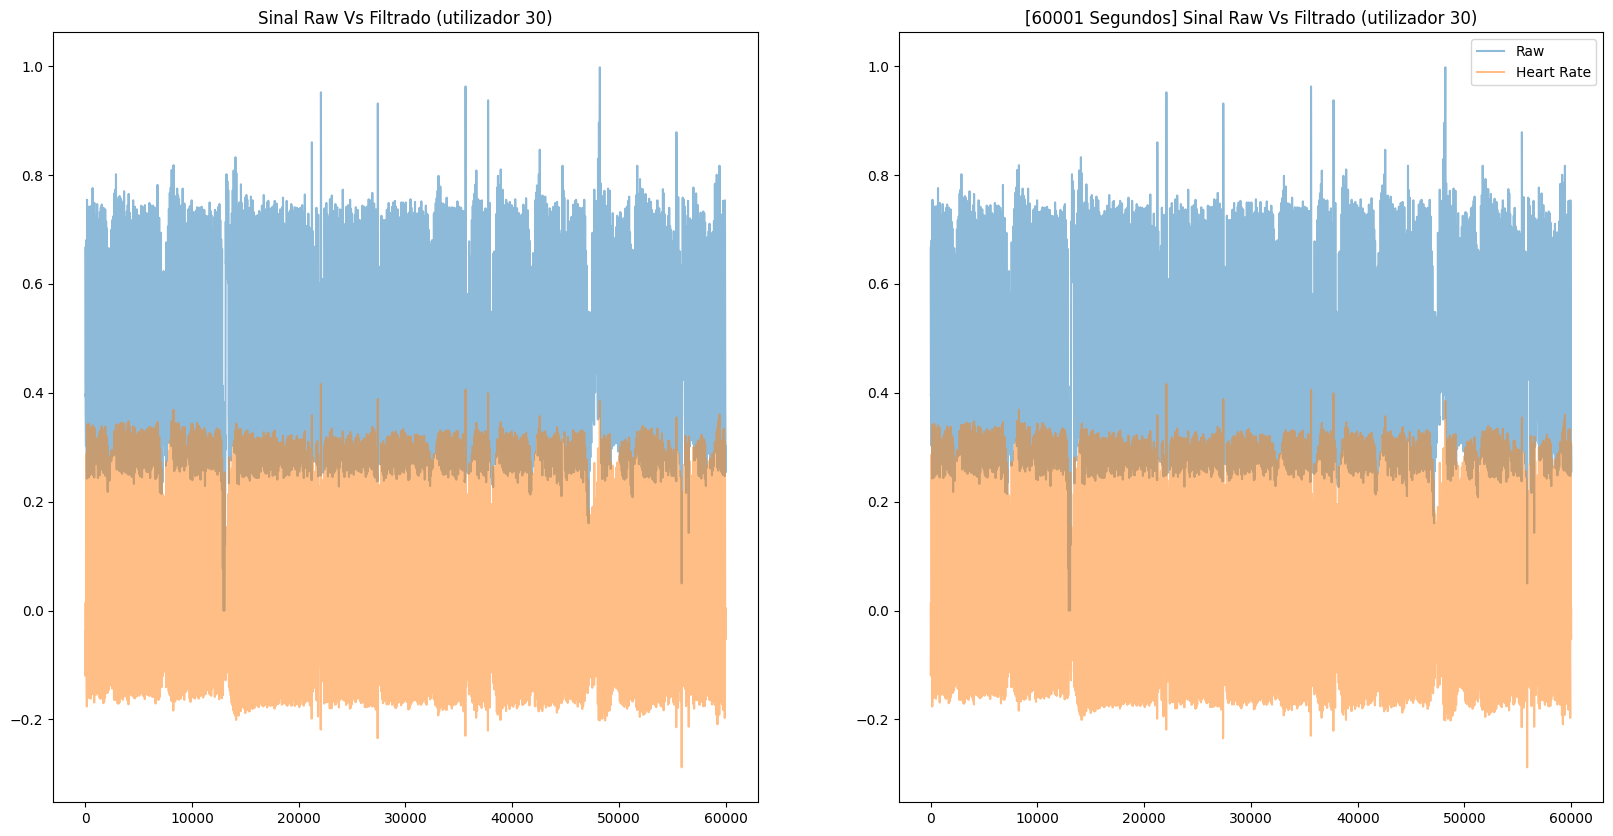

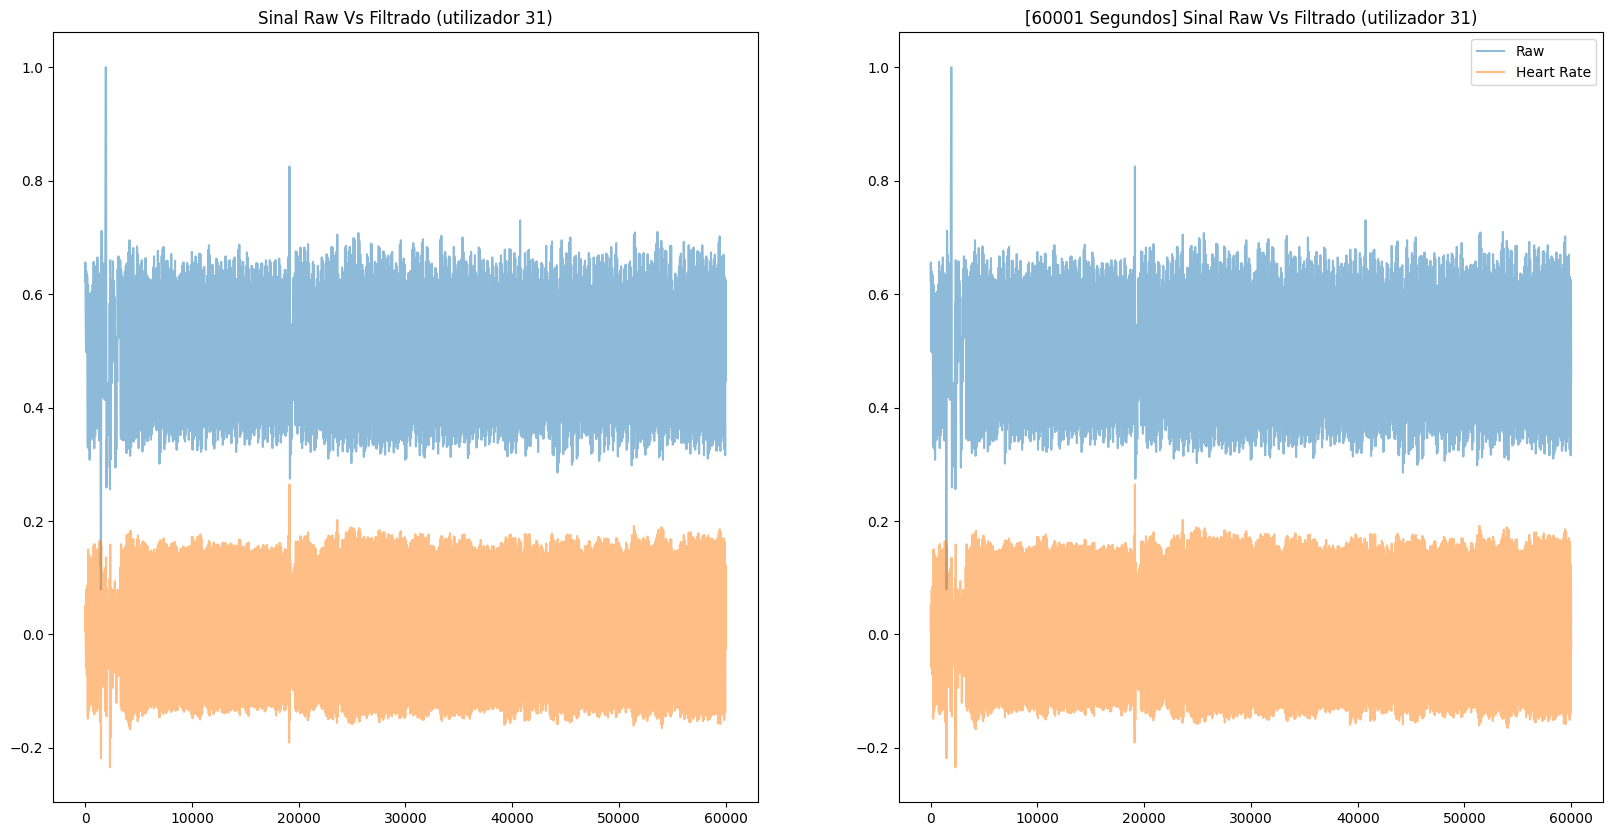

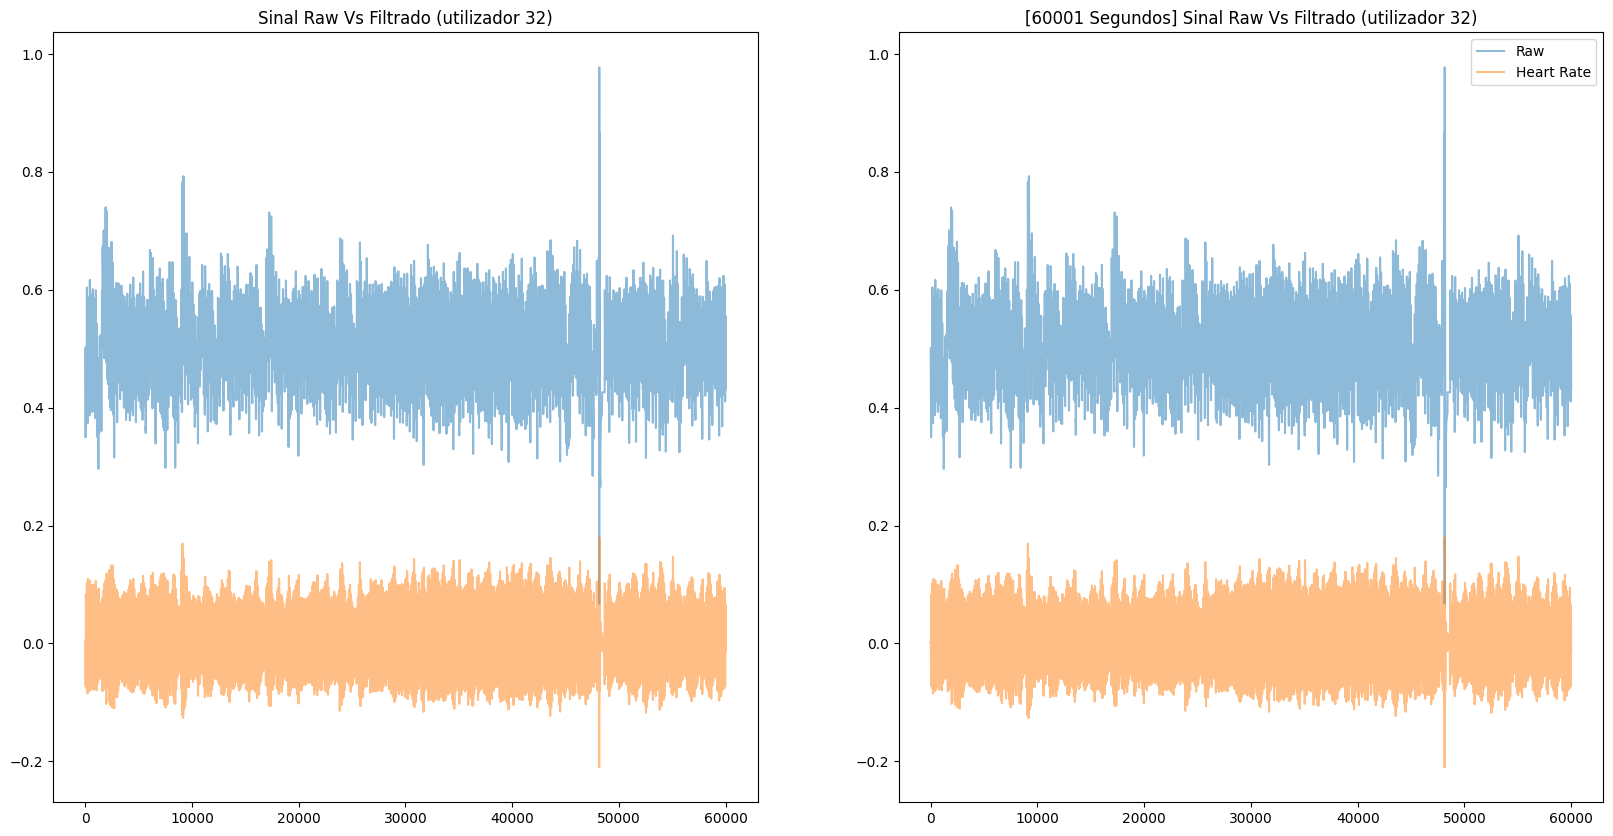

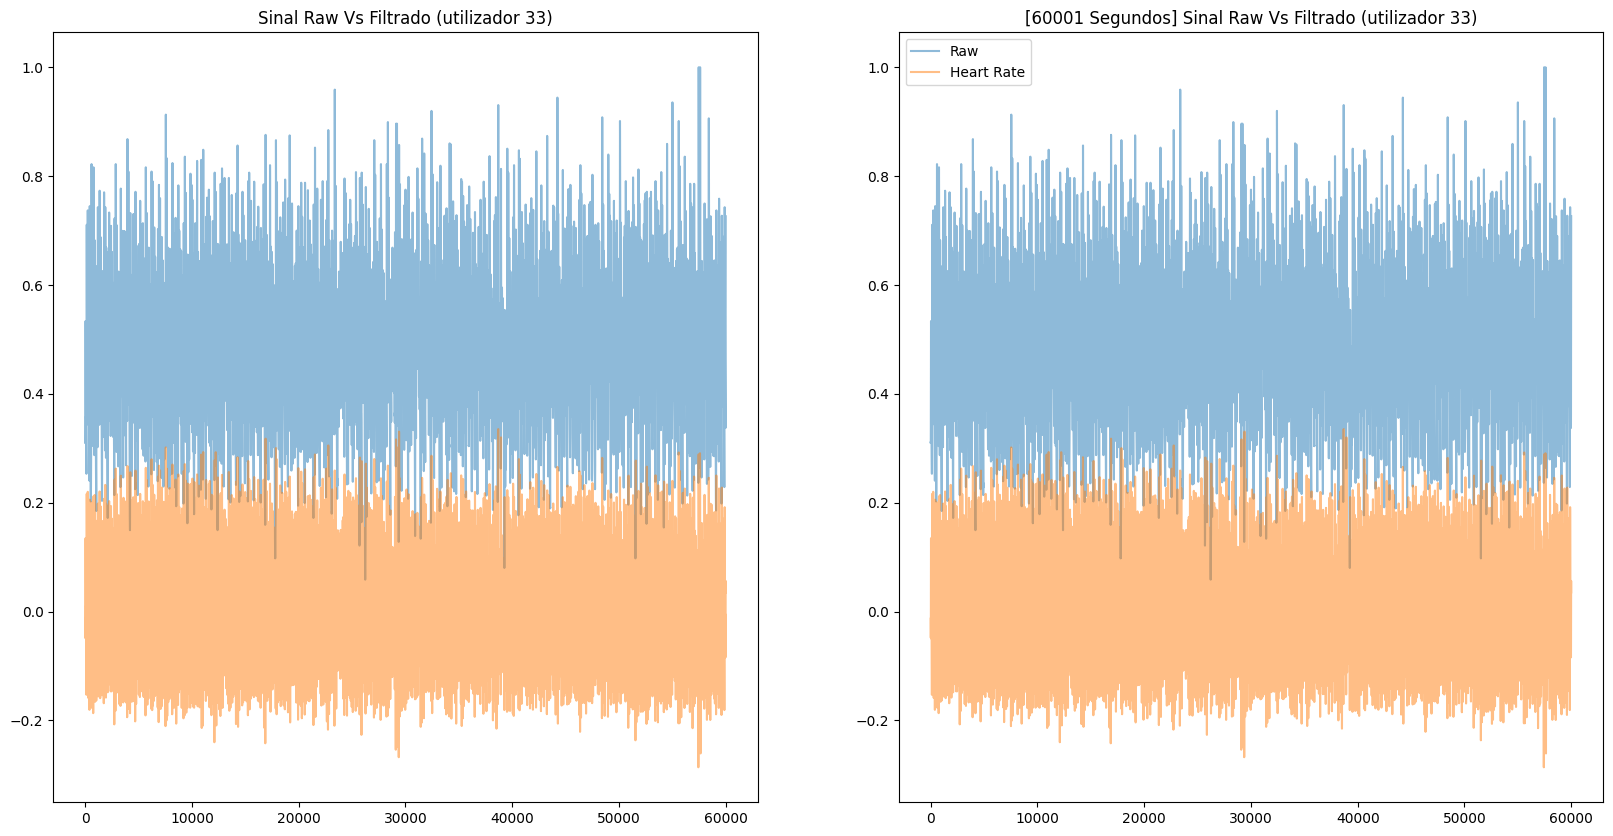

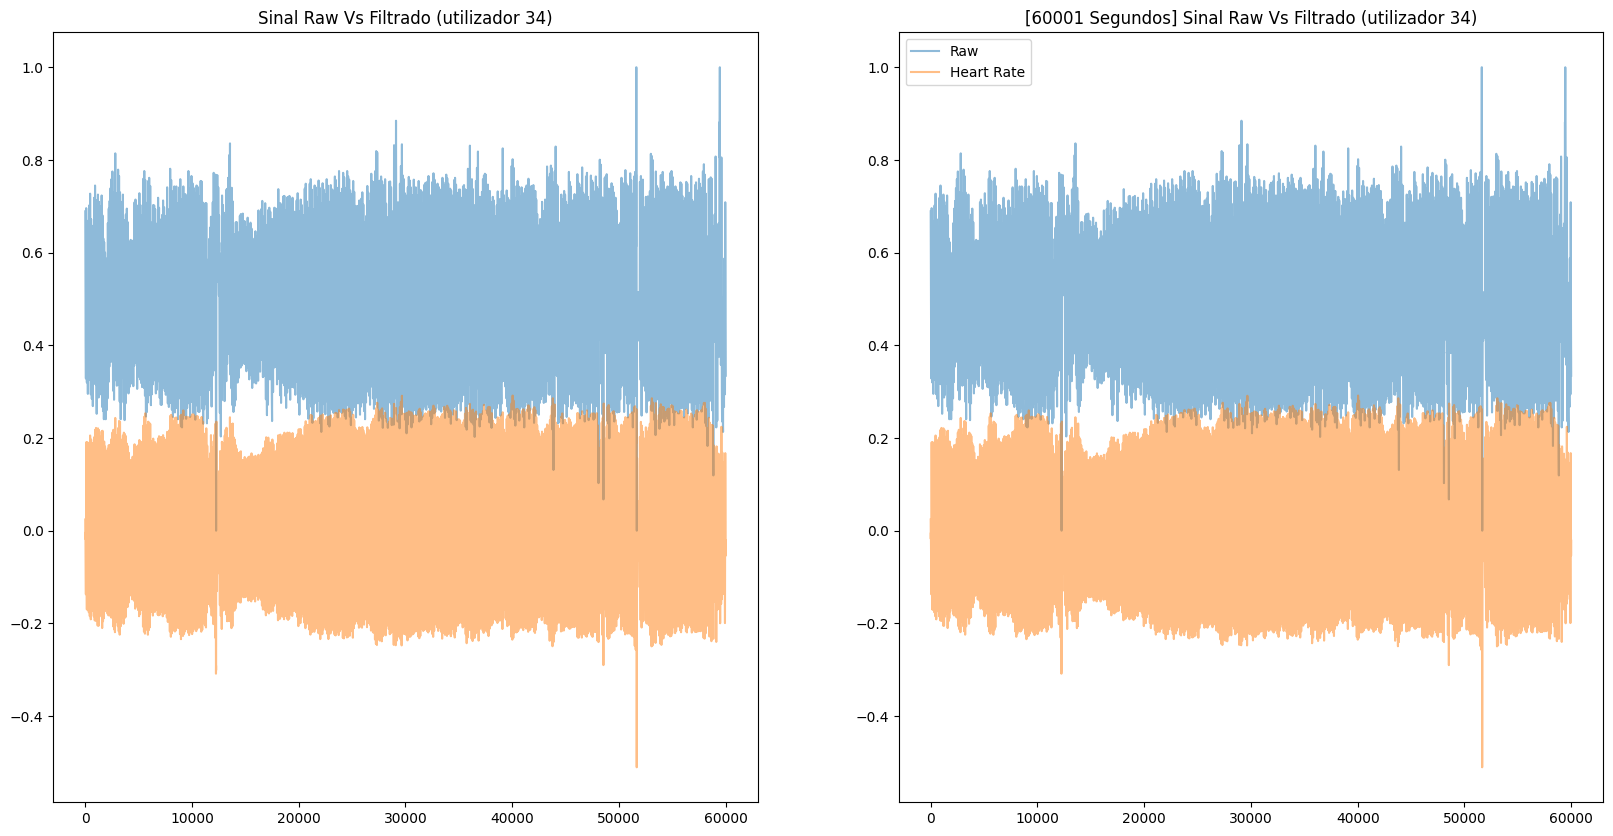

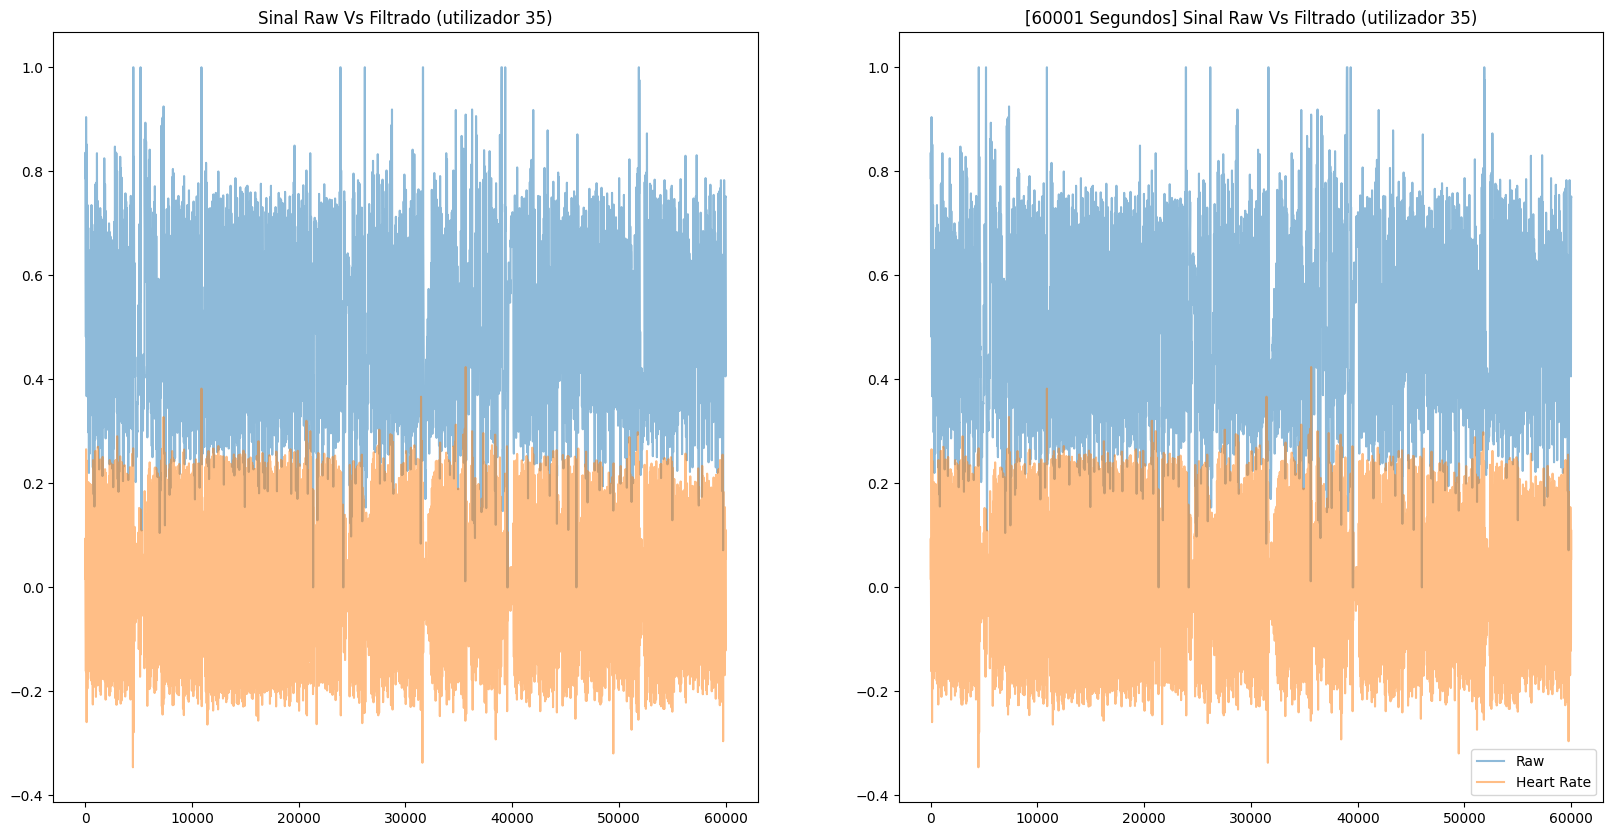

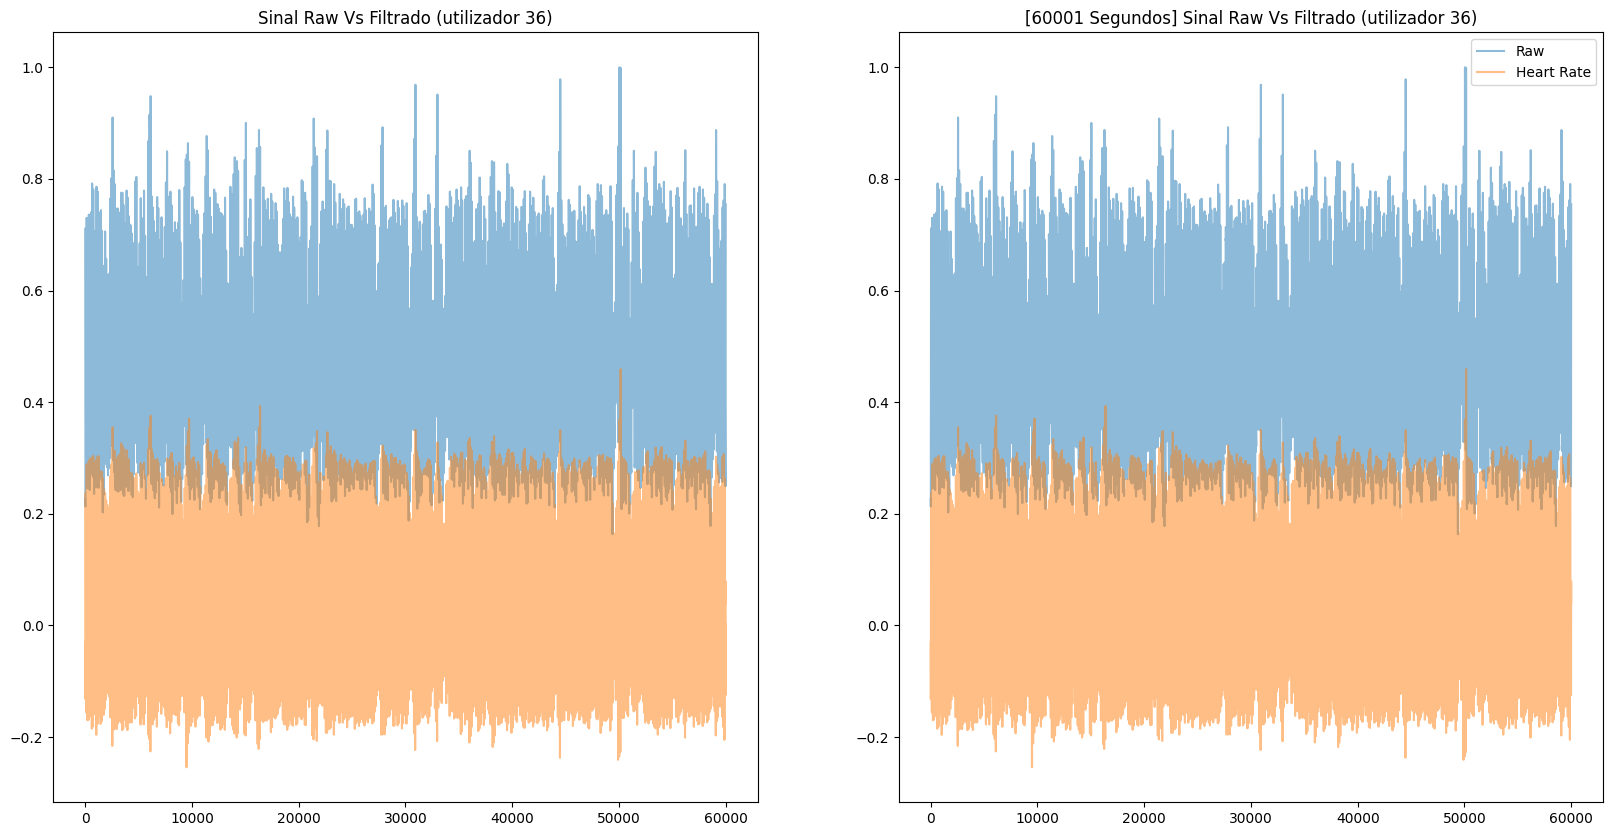

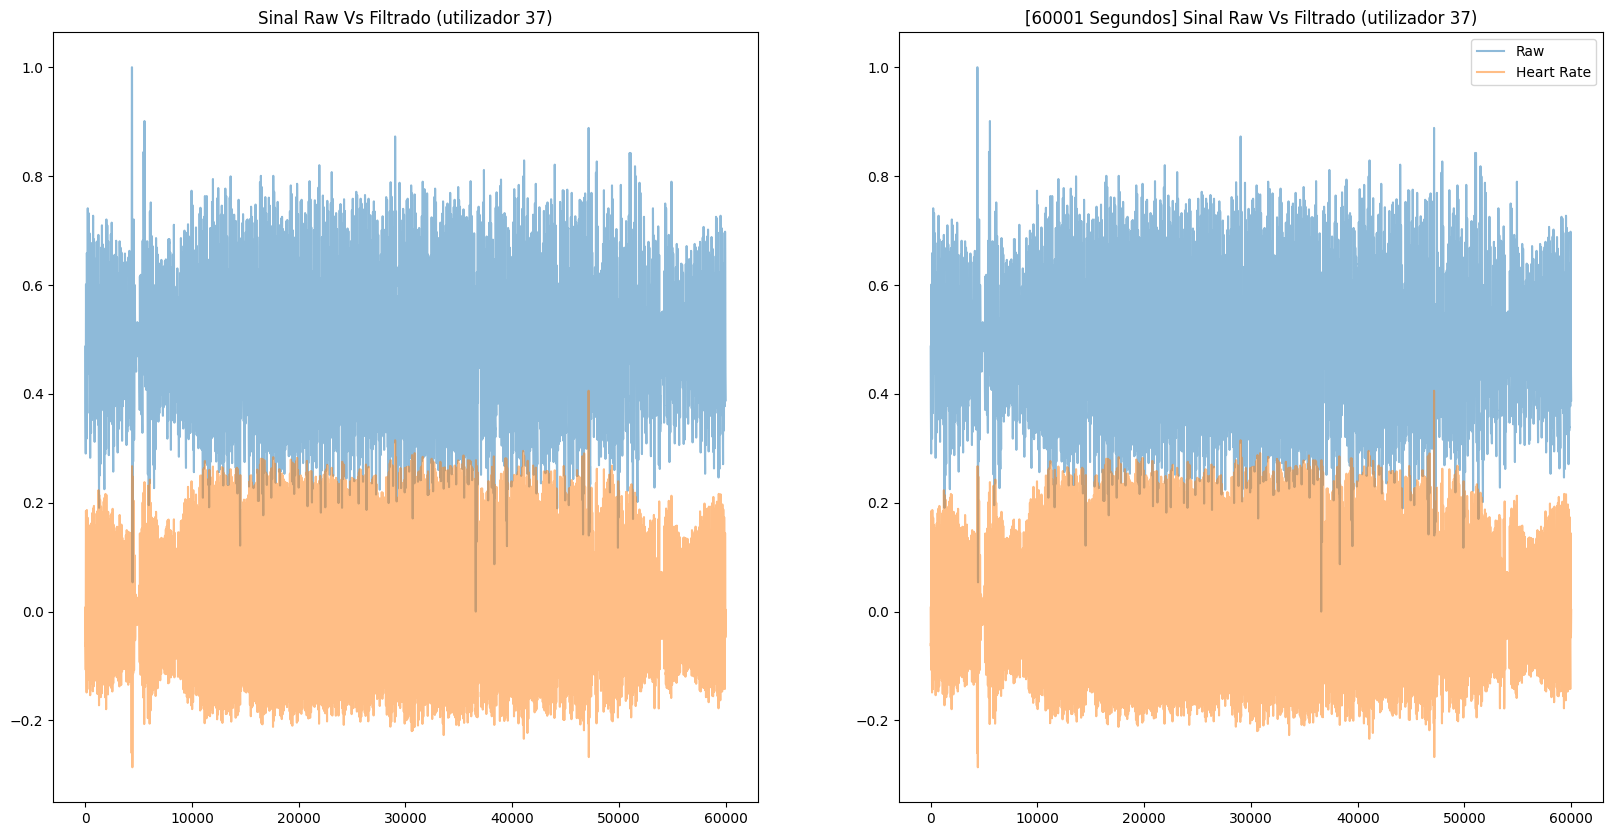

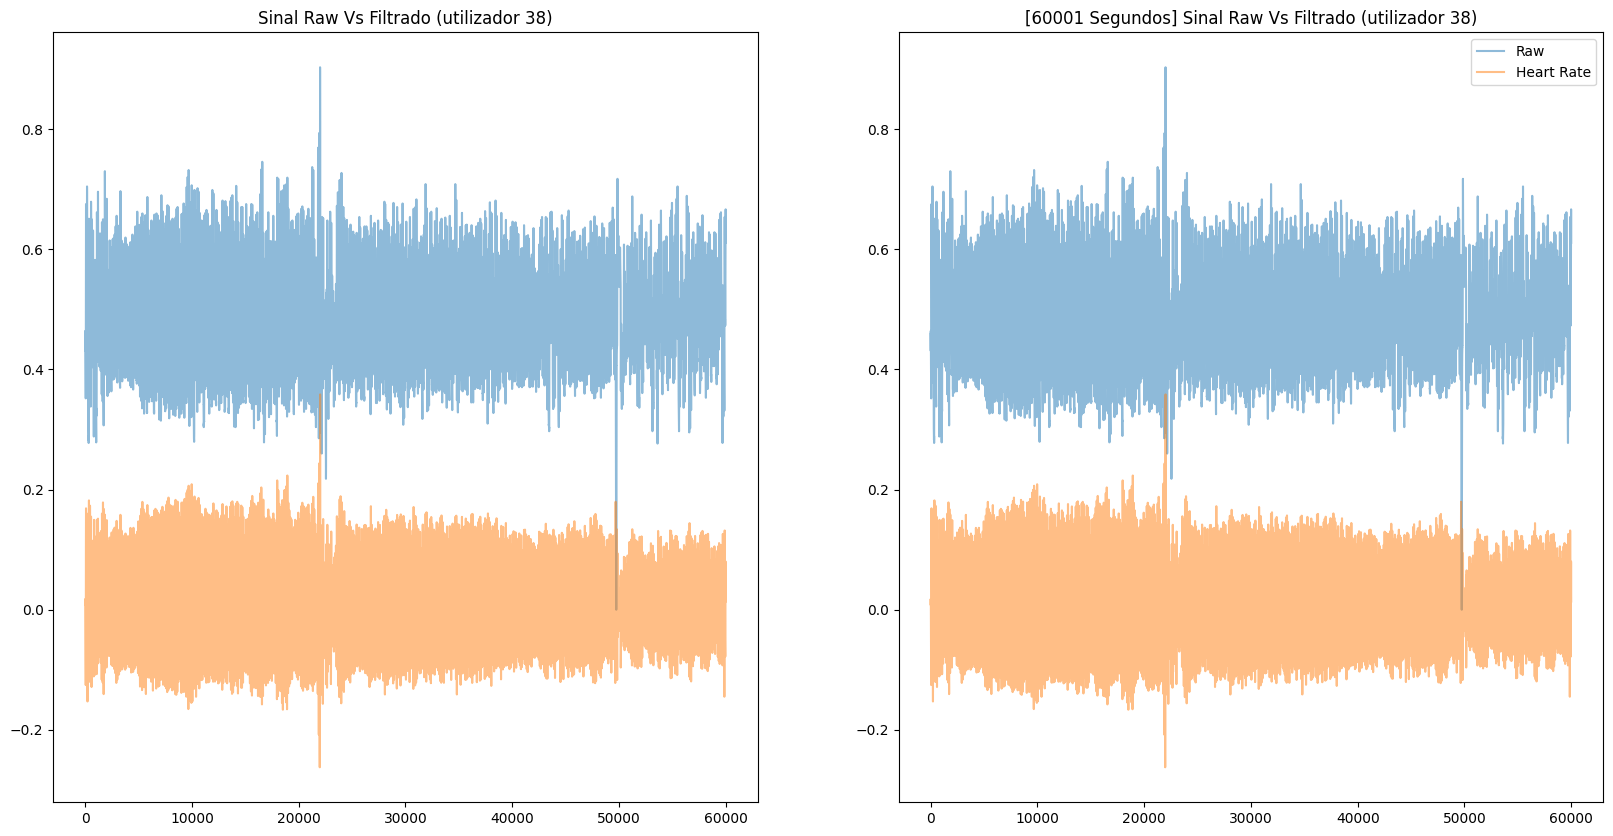

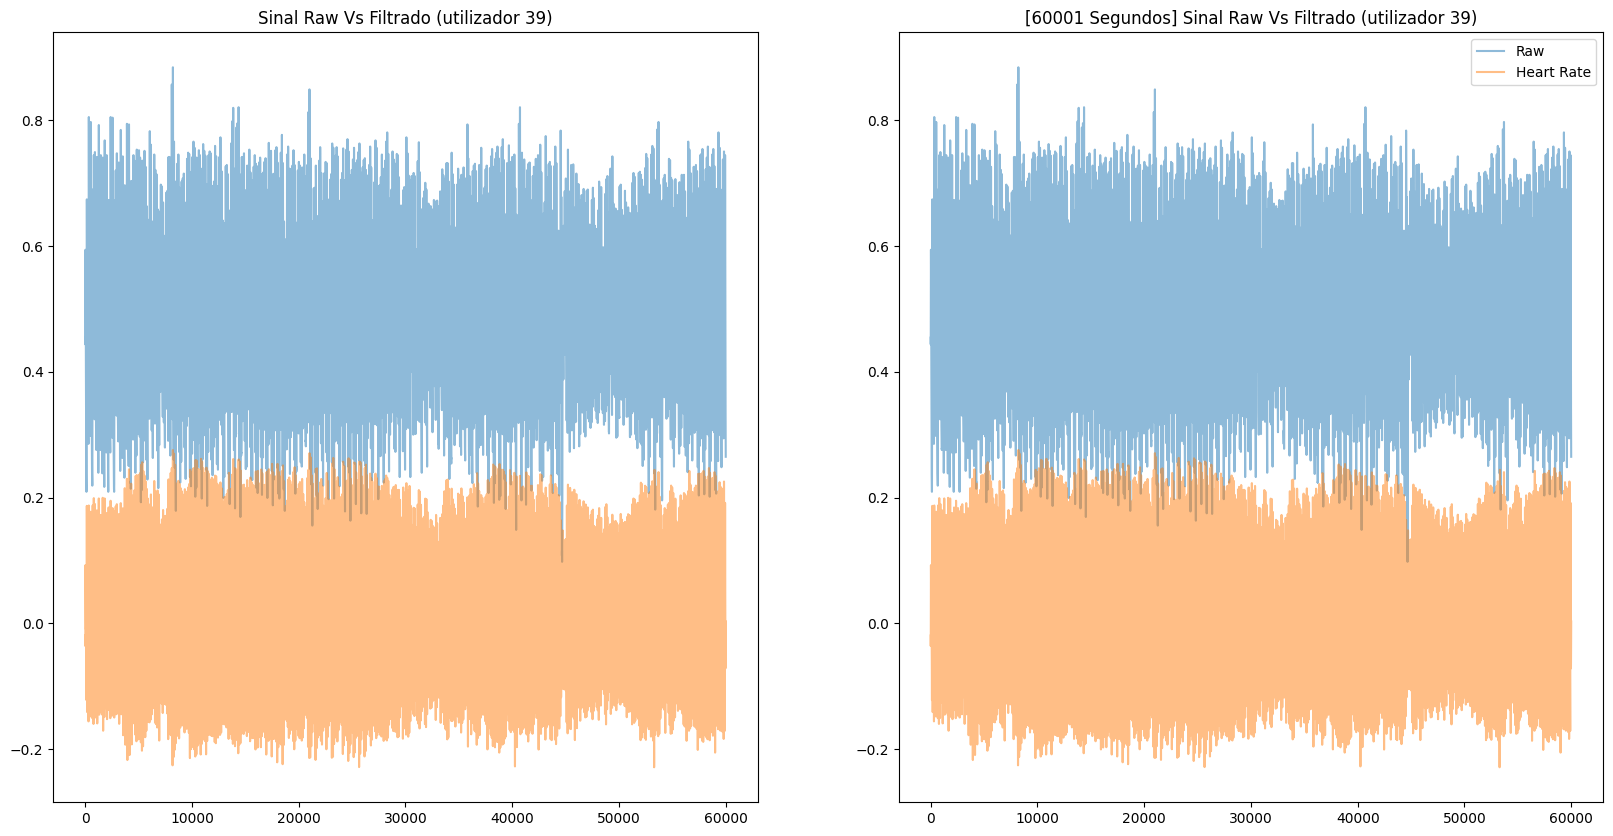

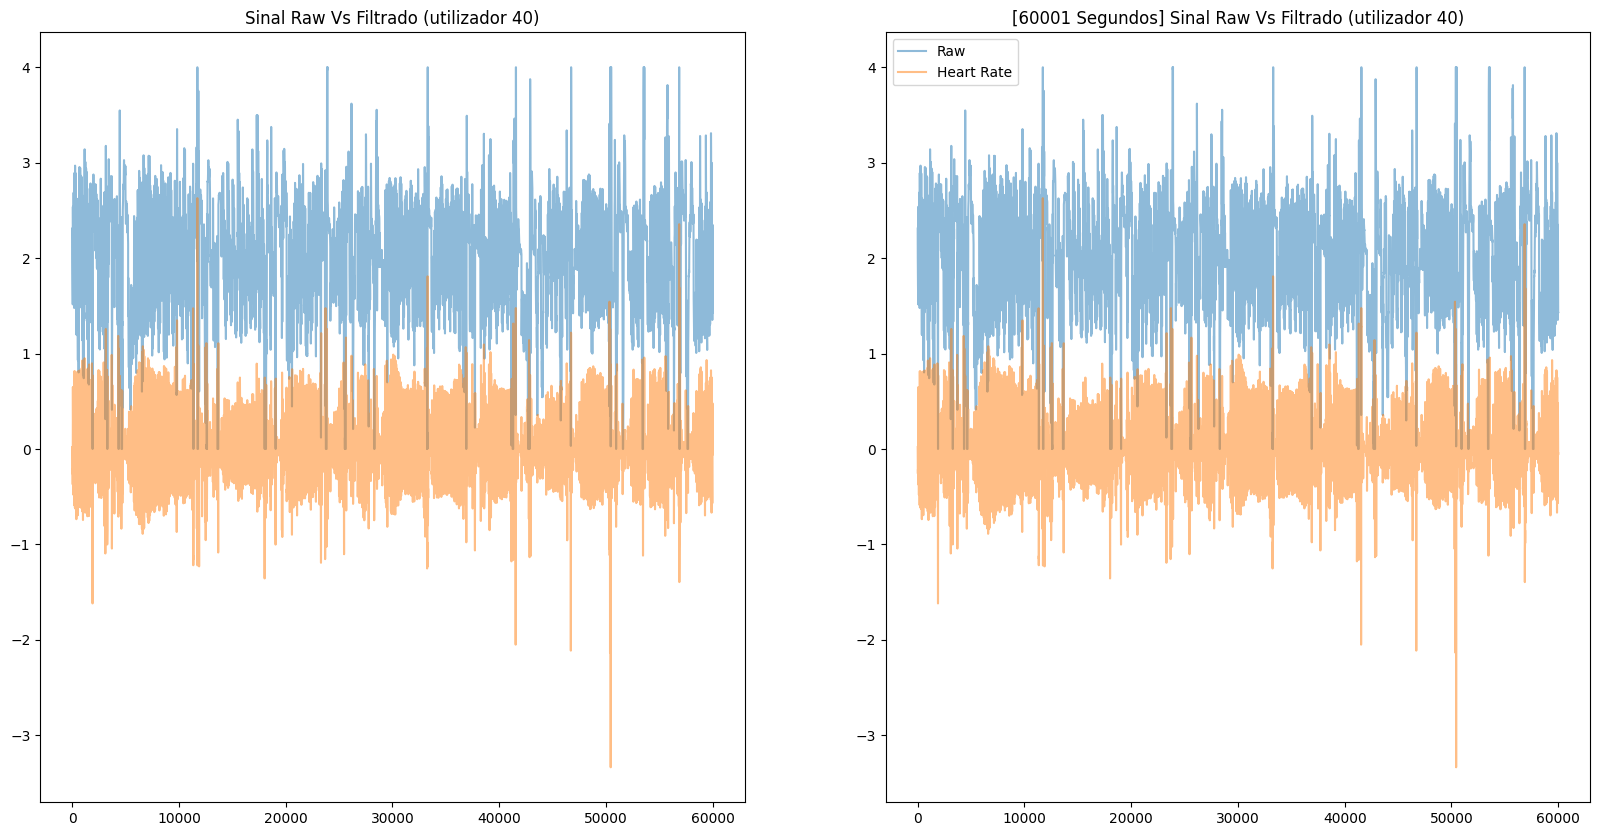

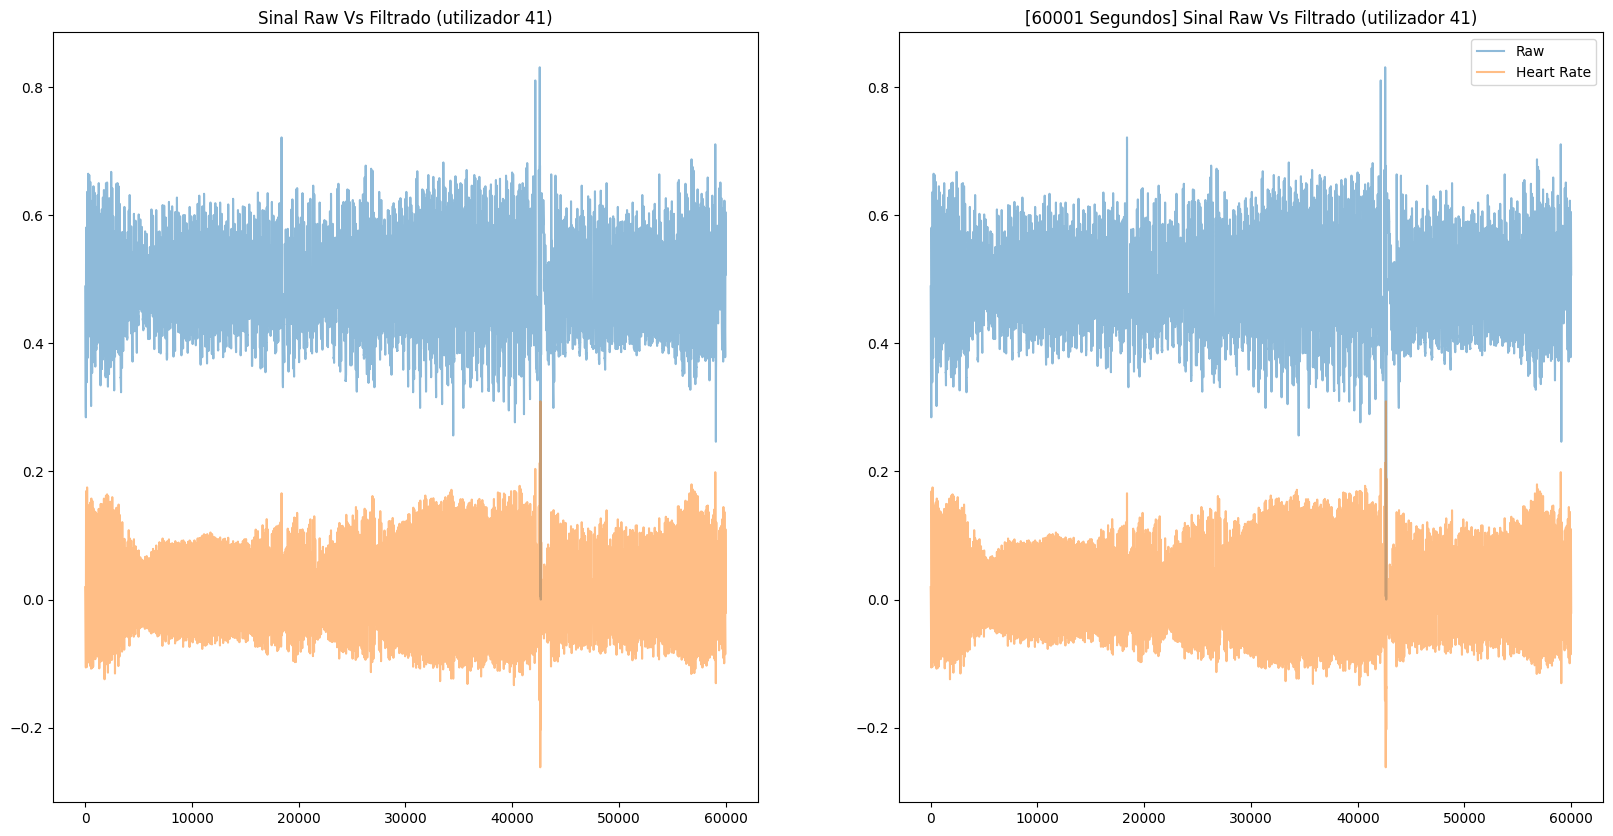

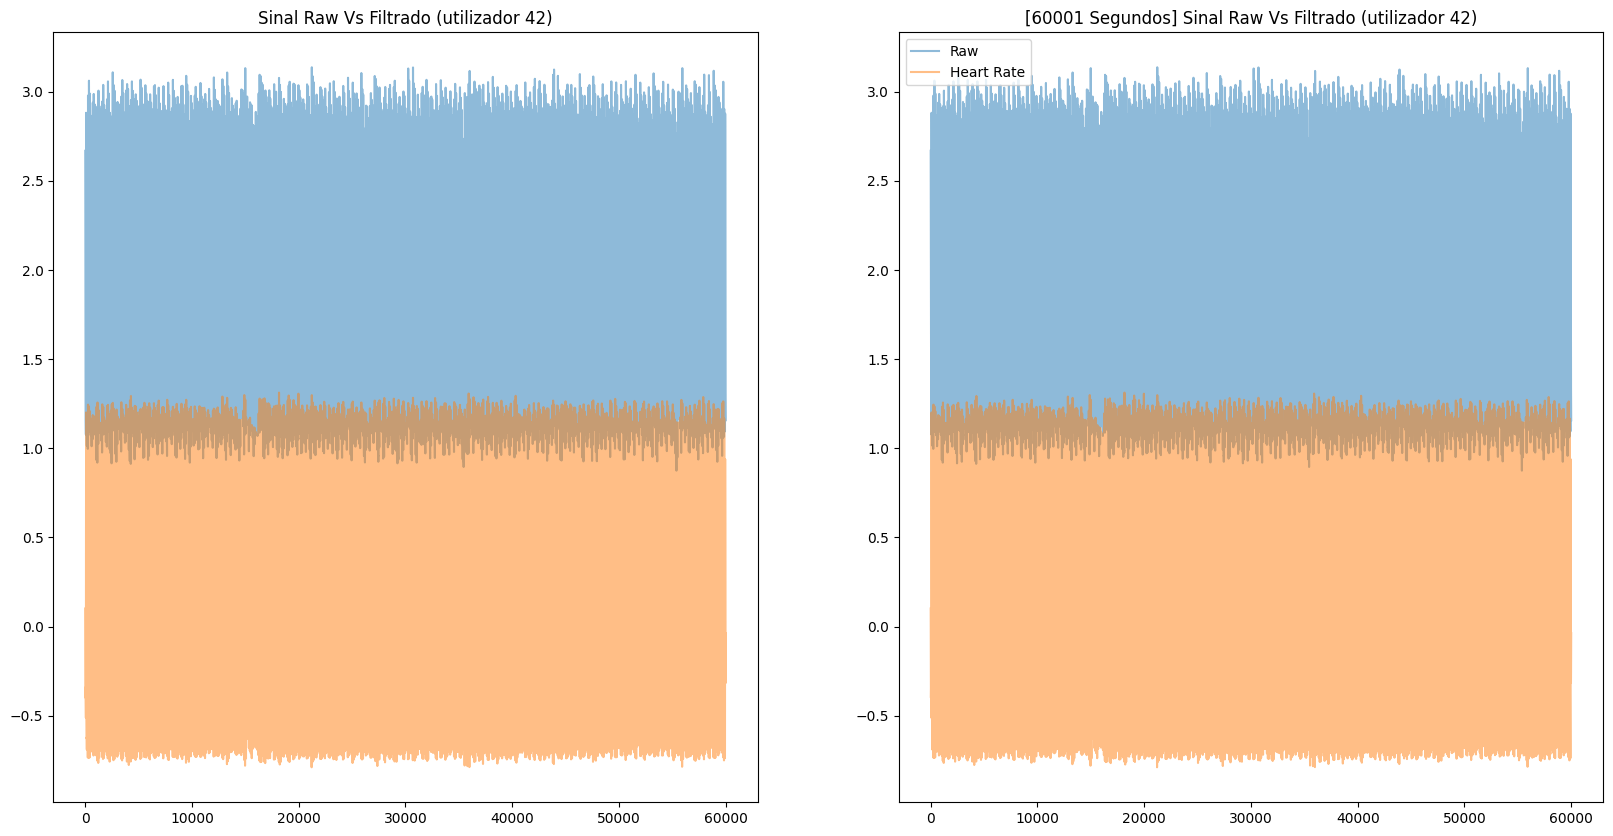

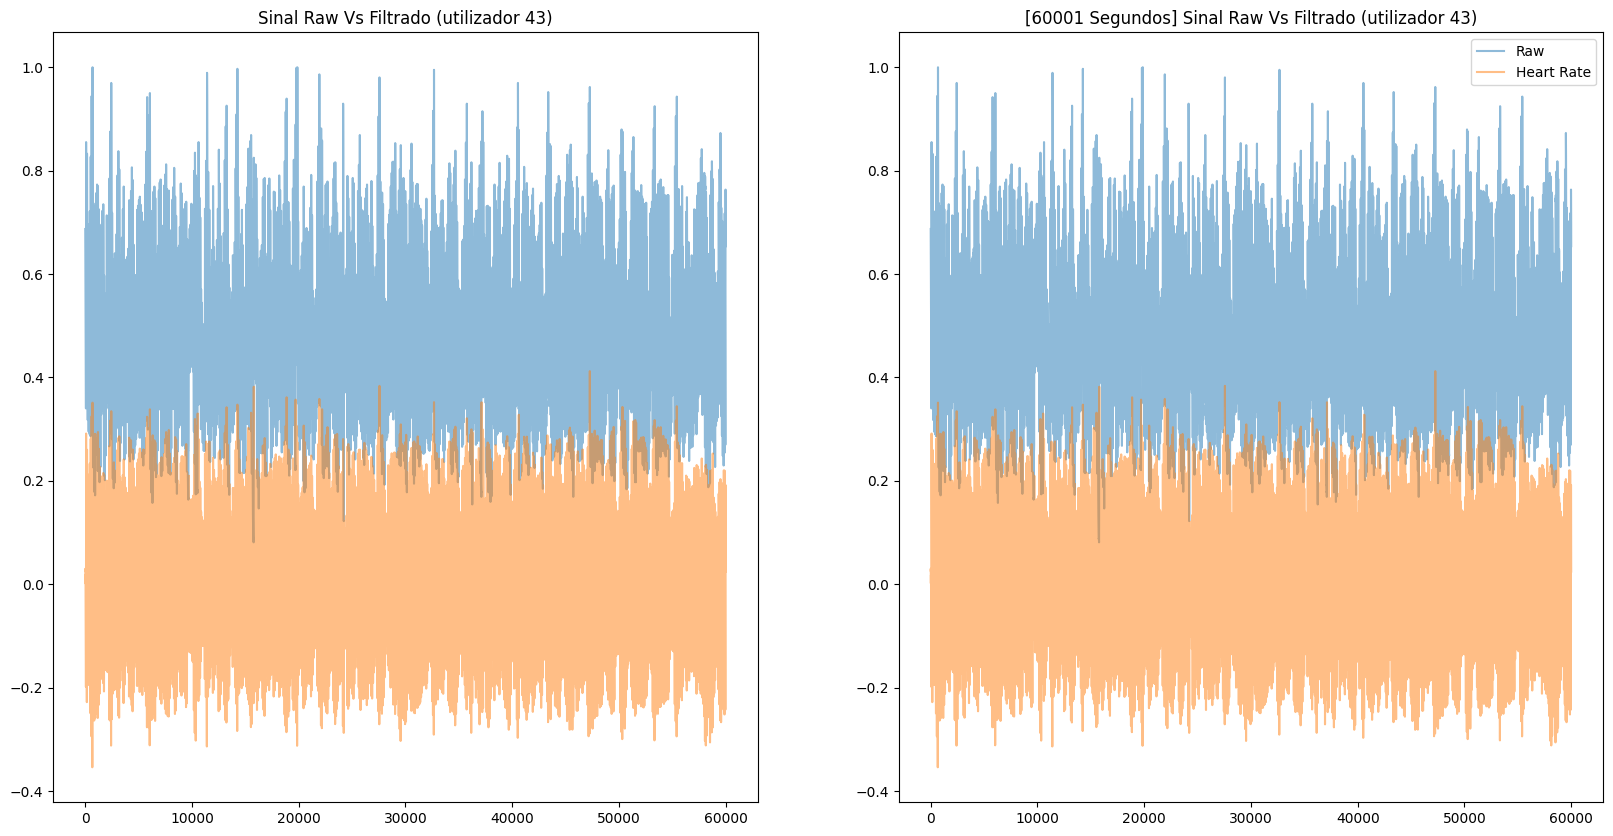

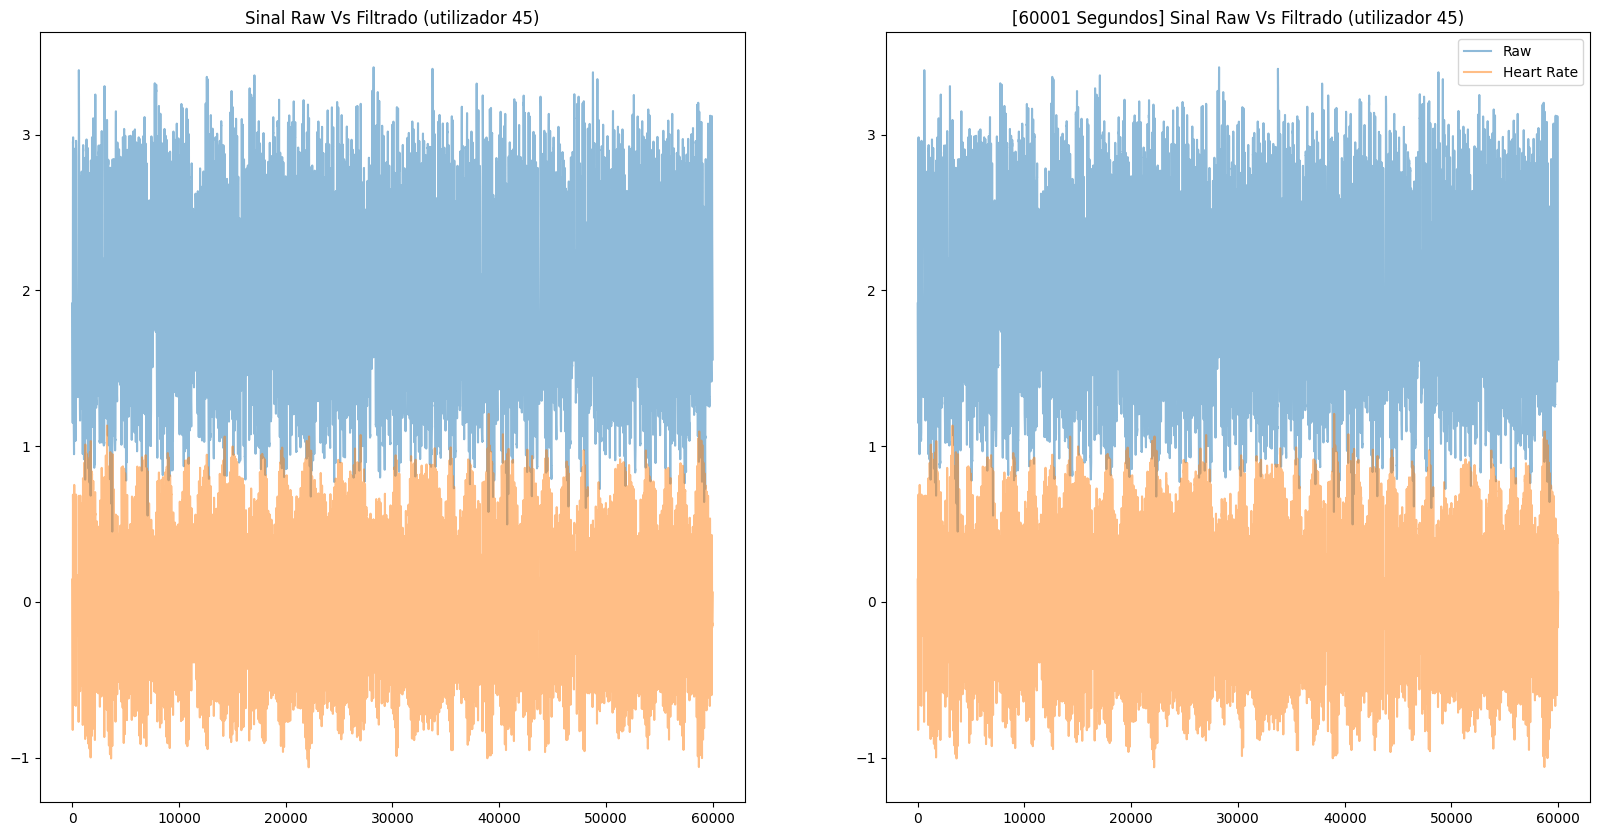

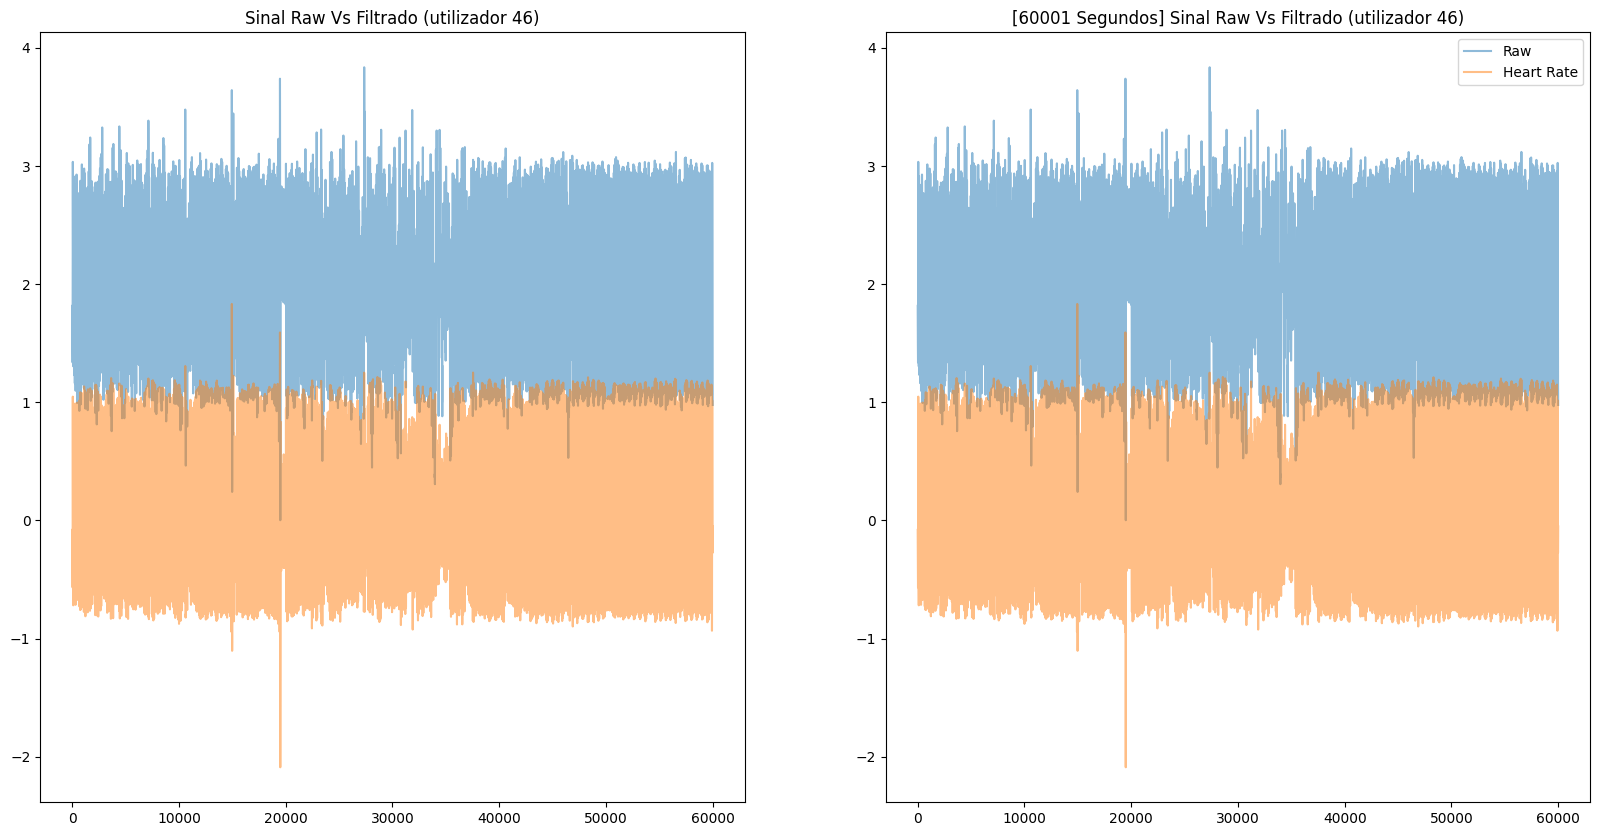

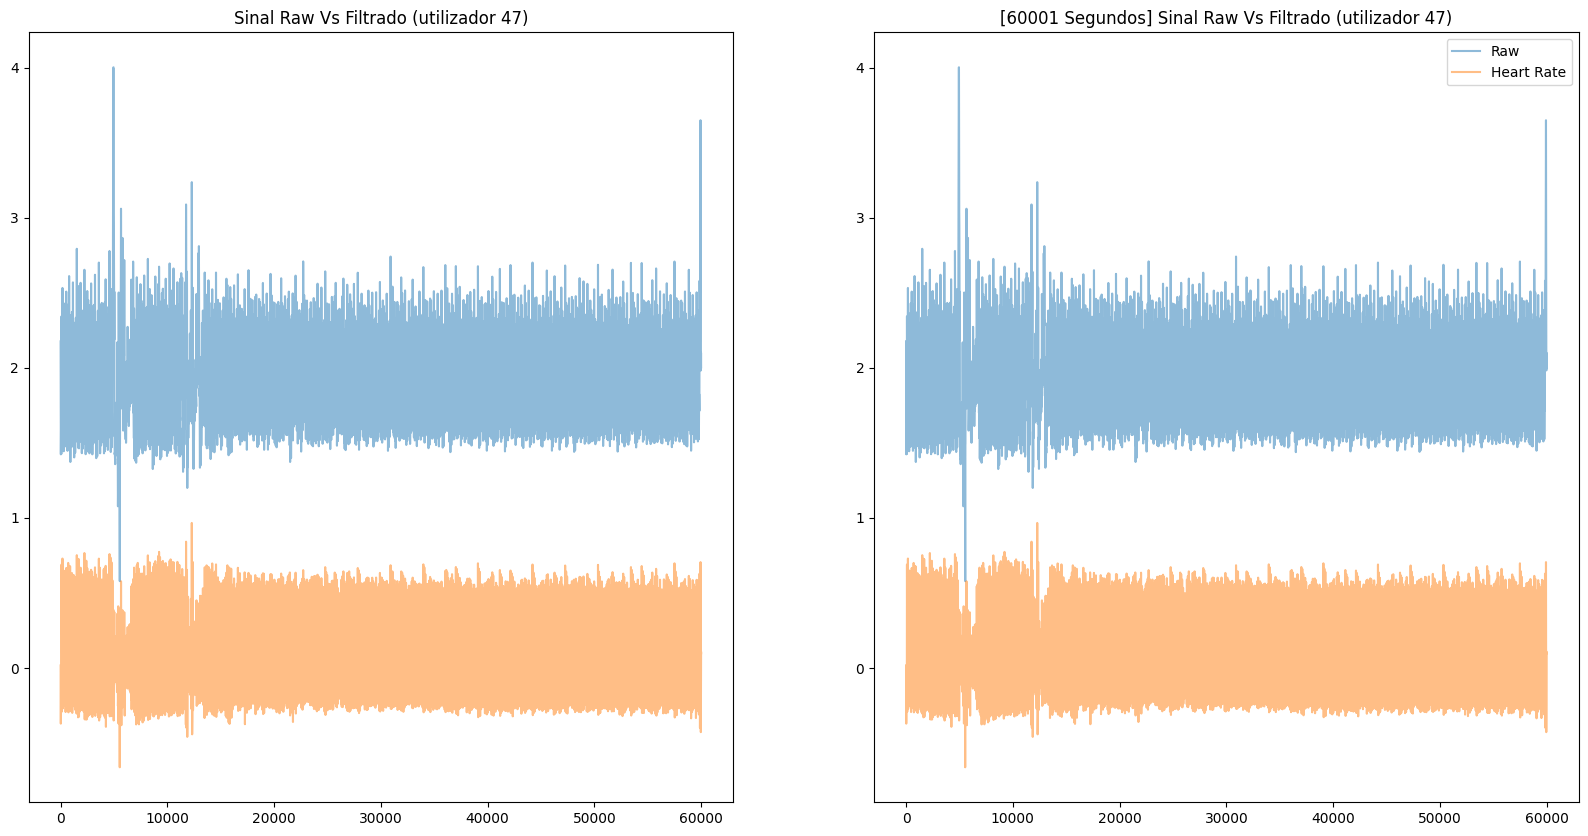

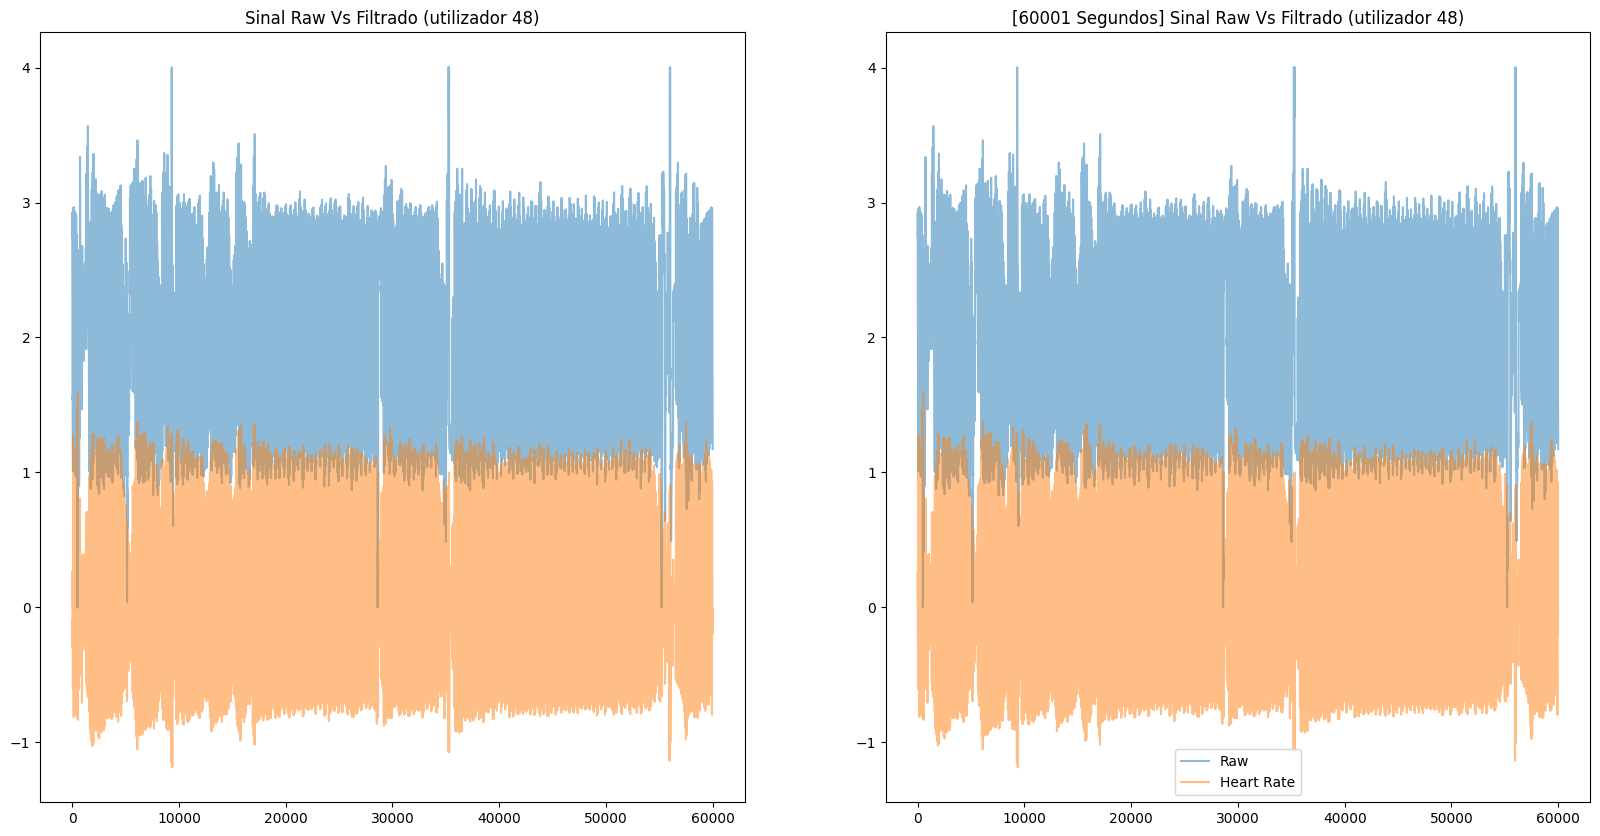

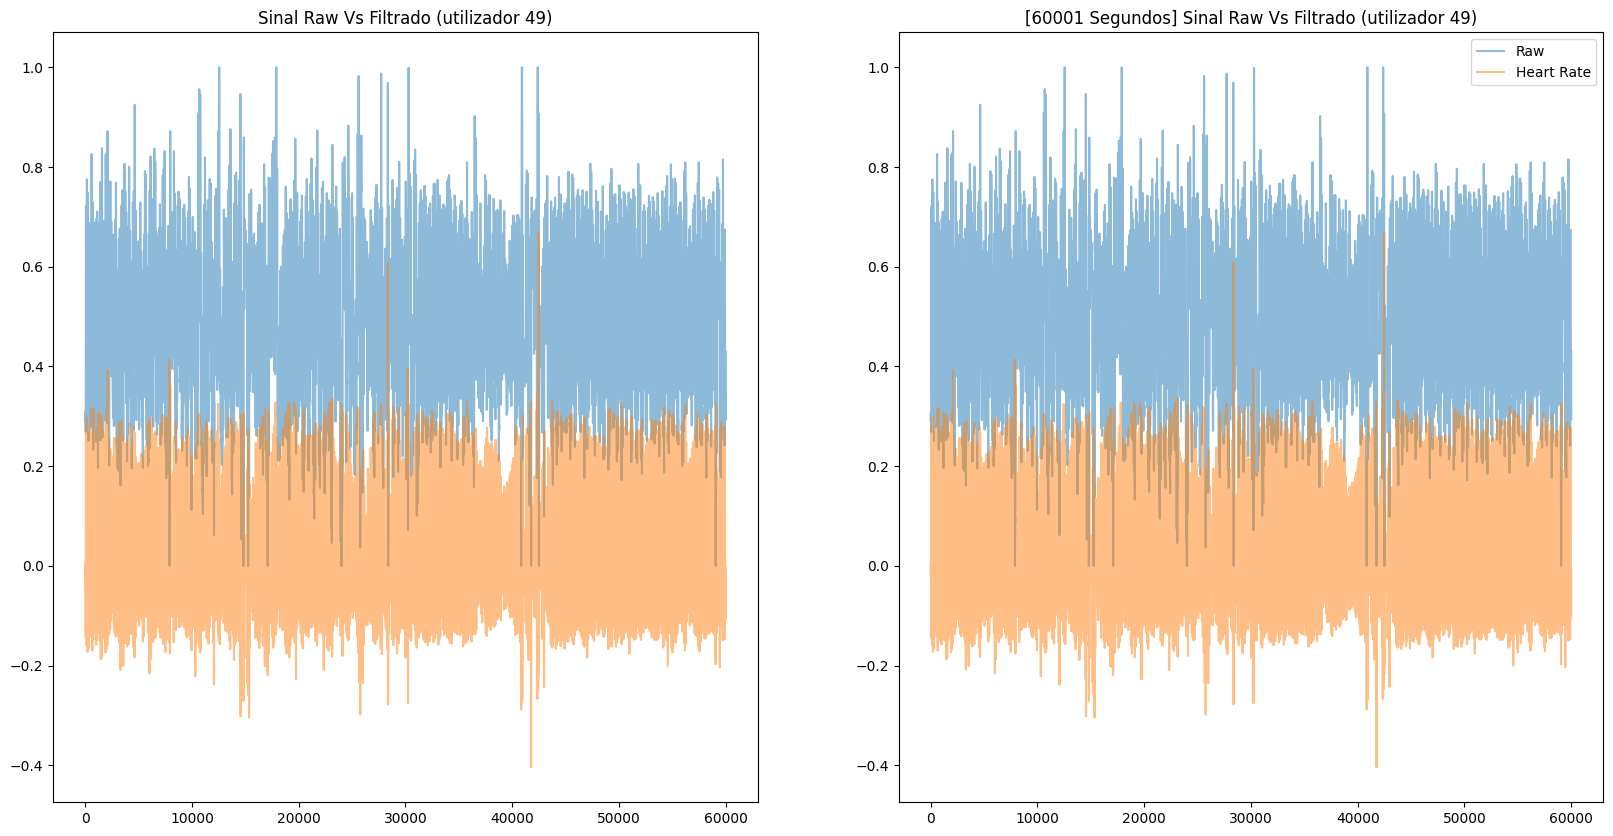

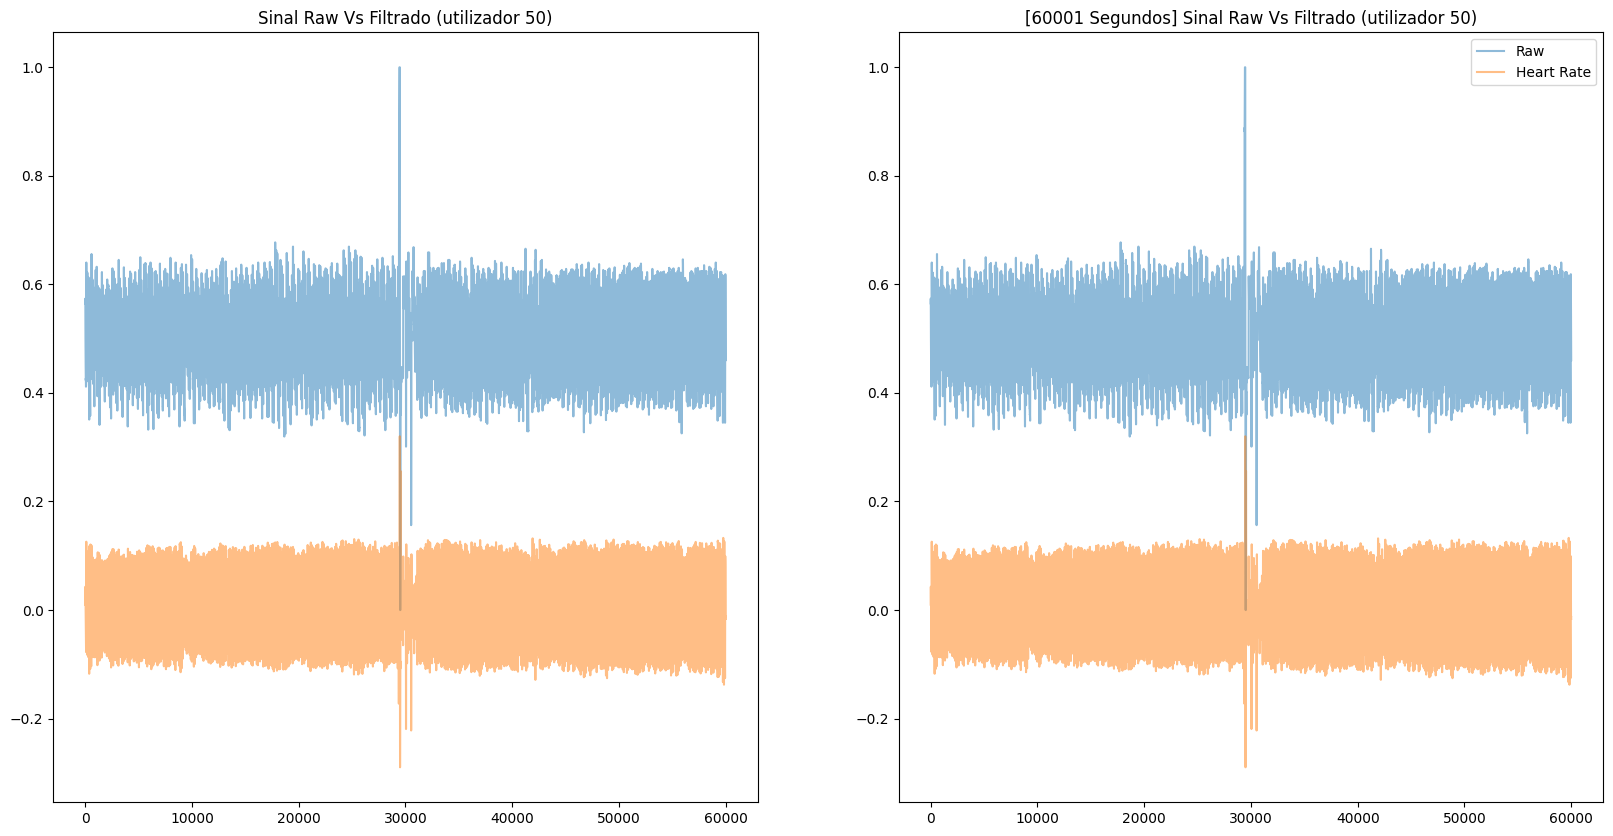

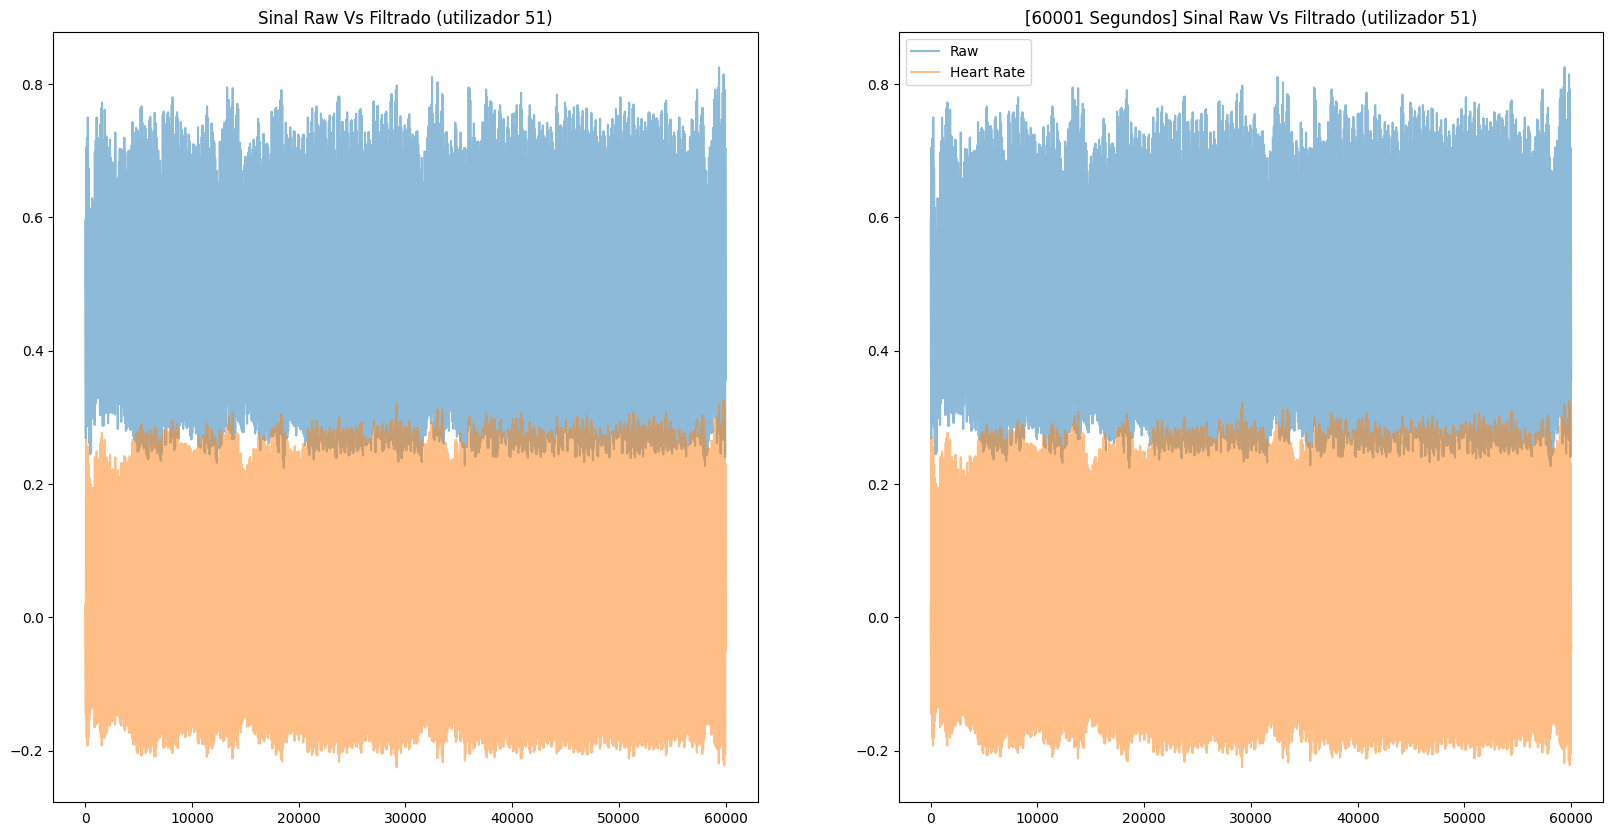

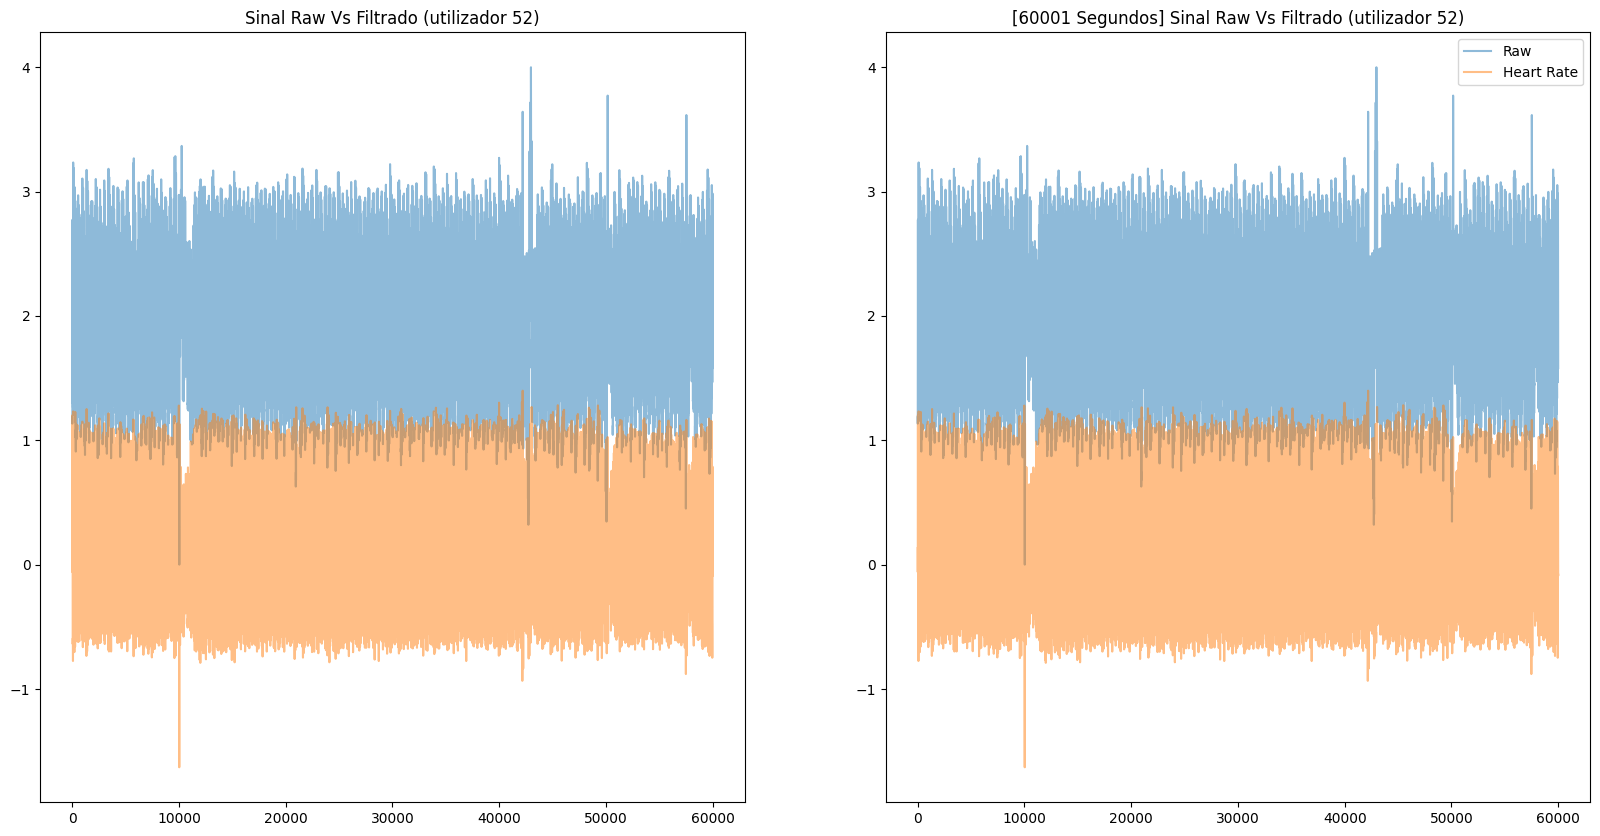

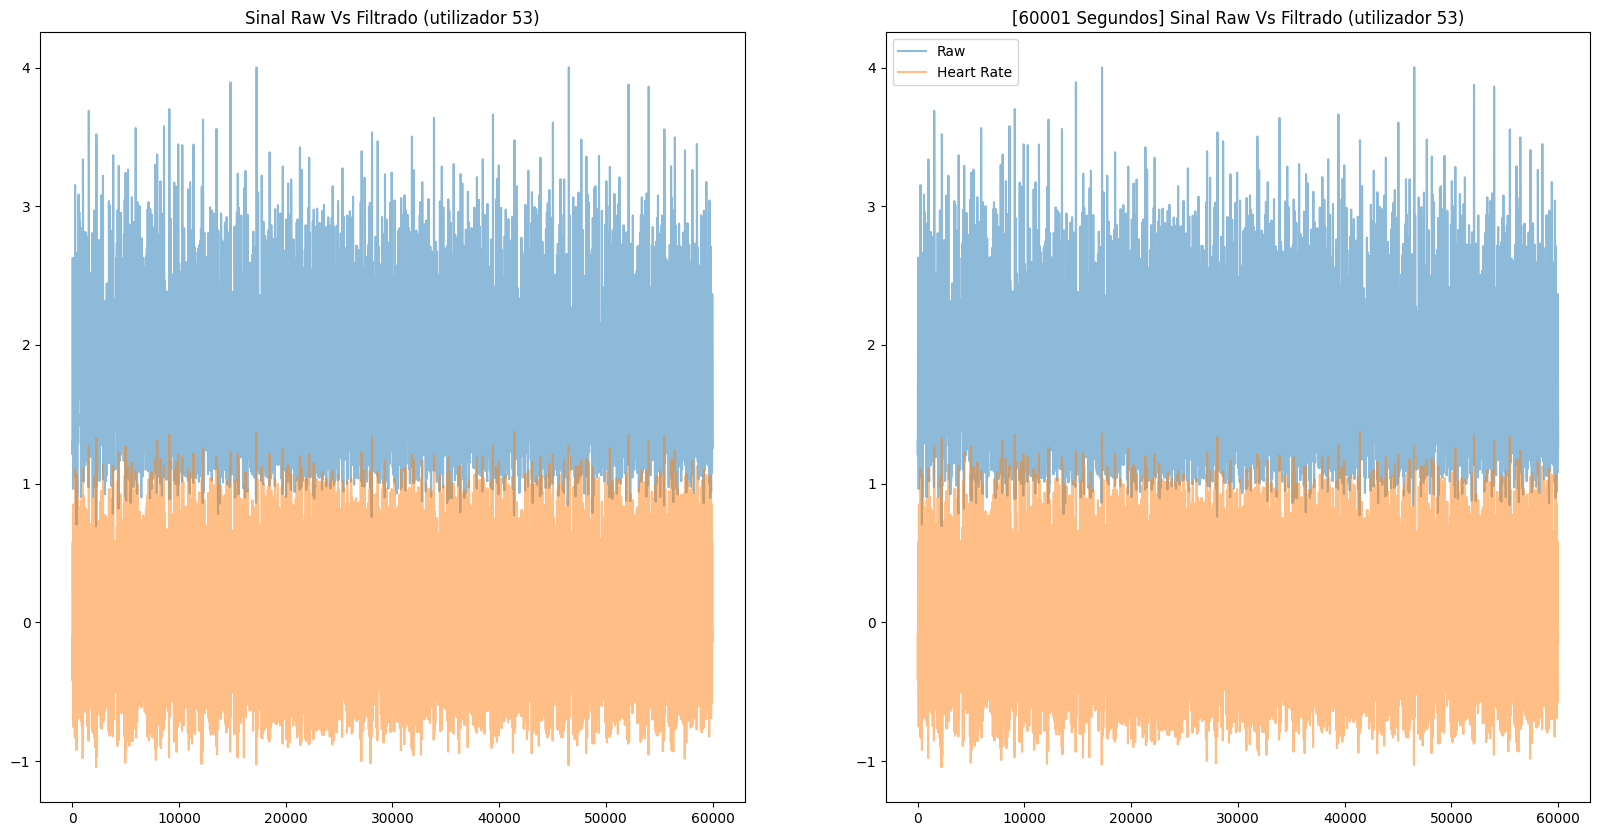

IndexError: list index out of range

In [7]:
for nAmostra in range(amostras): 

    utilizador = data[nAmostra]['subject']
    sinalOriginal = data[nAmostra]['signal']
    sinalFiltrado = data[nAmostra]['f_signal']

    fs = data[nAmostra]['fs']
    
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.title(f"Sinal Raw Vs Filtrado (utilizador {utilizador})")
    plt.plot(sinalOriginal, alpha=.5)
    plt.plot(sinalFiltrado, alpha=.5)

    plt.subplot(122)
    plt.title(f"[{amostras} Segundos] Sinal Raw Vs Filtrado (utilizador {utilizador})")
    plt.plot(sinalOriginal[0: amostras*fs], alpha=.5) 
    plt.plot(sinalFiltrado[0: amostras*fs], alpha=.5)
    
    plt.legend(['Raw', 'Heart Rate', 'Filtered'])
    plt.show()


In [89]:
X = []
Y = []
userid = 0
for user in data: 
    for template in user['templates']:
        X.append(template)
        Y.append(userid)
    userid += 1

In [92]:
from tensorflow.keras.utils import to_categorical

print(len(data))
print(np.max(Y))

y = to_categorical(Y, num_classes=len(data))


51
50
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [50]:
print(len(X), len(Y))

10661 10661


In [28]:
X = [user['f_signal'] for user in data]
Y = [user['subject'] for user in data]

## Split em dados de Treino, Validação e Teste

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Dados de treino: ")
print("X_train:", len(X_train))
print("y_train:", len(y_train))

print("Dados de teste: ")
print("X_test:", len(X_test))
print("y_test:", len(y_test))

Dados de treino: 
X_train: 8528
y_train: 8528
Dados de teste: 
X_test: 2133
y_test: 2133


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40. 41. 42. 43. 45. 46. 47. 48. 49. 50. 51. 52. 53.]


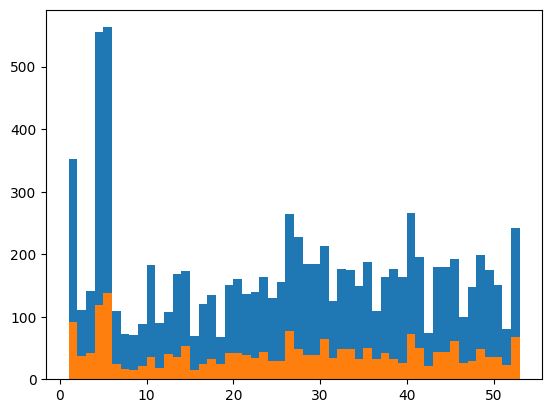

In [64]:
print(np.unique(y_train))
hist = np.histogram(y_train, bins=np.unique(y_train))

plt.hist(y_train, bins=np.unique(y_train));
plt.hist(y_test, bins=np.unique(y_test));

In [93]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform length
X_train = pad_sequences(X_train, padding='post', dtype='float32')
X_test = pad_sequences(X_test, padding='post', dtype='float32')

# Ensure labels are in numpy array format
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

# Reshape the input data to have a third dimension for the model
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

## Feature Extraction (CNN)

## Autenticação

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense, Concatenate

# Define parameters
N = 32        # Number of filters per Conv1D layer
L1, L2, L3 = 5, 10, 15  # Filter lengths
M = 128       # Number of units in the dense layer

# Input layer for raw PPG signals
input_signal = Input(shape=(None, 1), name='raw_ppg_input')

# Parallel convolutional layers with different filter lengths
conv1 = Conv1D(filters=N, kernel_size=L1, activation='relu')(input_signal)
conv2 = Conv1D(filters=N, kernel_size=L2, activation='relu')(input_signal)
conv3 = Conv1D(filters=N, kernel_size=L3, activation='relu')(input_signal)

# Global max pooling for each convolutional output
pool1 = GlobalMaxPooling1D()(conv1)
pool2 = GlobalMaxPooling1D()(conv2)
pool3 = GlobalMaxPooling1D()(conv3)

# Concatenate the pooled features into a single feature vector
concatenated_features = Concatenate()([pool1, pool2, pool3])

# Dense layer for classification
dense_layer = Dense(3 * N * M, activation='relu')(concatenated_features)

# Output layer with a single neuron for binary classification
#output = Dense(1, activation='sigmoid')(dense_layer)

# Output layer with a 53 neurons for multiclasse classification
output = Dense(53, activation='softmax')(dense_layer)

# Build the model
model = Model(inputs=input_signal, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary for inspection
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ raw_ppg_input       │ (None, None, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, None, 32)  │        192 │ raw_ppg_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, None, 32)  │        352 │ raw_ppg_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, None, 32)  │        512 │ raw_ppg_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ conv1d_12[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ conv1d_13[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 32)        │          0 │ conv1d_14[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 96)        │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 12288)     │  1,191,936 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 53)        │    651,317 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,844,309 (7.04 MB)

 Trainable params: 1,844,309 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Train the model
# Prepare labels to be one hot encoded
y_train = to_categorical(y_train, num_classes=len(data))
y_test = to_categorical(y_test, num_classes=len(data))

print(y_train.shape)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Predicting on test data
y_pred = model.predict(X_test)

## Avaliação

In [58]:
# Convert predictions to binary (0 or 1) with threshold 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Displaying some predictions
print("Predicted verification scores:", y_pred[:5].flatten())
print("Predicted binary labels:", y_pred_binary[:5].flatten())
print("True labels:", y_test[:5].flatten())

[]
Predicted verification scores: [0.9336138 0.9336138 0.9336138 0.9336138 0.9336138]
Predicted binary labels: [1 1 1 1 1]
True labels: [33. 41. 19. 13.  2.]


In [57]:
print(y_pred)

[[0.9336138]
 [0.9336138]
 [0.9336138]
 ...
 [0.9336138]
 [0.9336138]
 [0.9336138]]
